In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\Anja Tetzner\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/02_earlystopping_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\Anja Tetzner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
BATCH_SIZE = 64
NUM_EPOCHS = 30
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

## MLP with one hidden layer, 600 neurons

In [8]:
wv_layer = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#First Dense Layer
x = Dense(600, activation='relu')(embedded_sequences)

x = Flatten()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)

## Train the model within the parameter space

Instructions for updating:
Use tf.cast instead.
Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6784 - acc: 0.5715 - precision: 0.5602 - recall: 0.6527 - f1_score: 0.6029 - val_loss: 0.6516 - val_acc: 0.6156 - val_precision: 0.5991 - val_recall: 0.6927 - val_f1_score: 0.6425
Epoch 2/30
3449/3449 [==============================] - 3s 991us/step - loss: 0.4725 - acc: 0.8136 - precision: 0.8053 - recall: 0.8255 - f1_score: 0.8153 - val_loss: 0.6507 - val_acc: 0.6260 - val_precision: 0.6500 - val_recall: 0.5417 - val_f1_score: 0.5909
Epoch 3/30
3449/3449 [==============================] - 3s 986us/step - loss: 0.1658 - acc: 0.9553 - precision: 0.9563 - recall: 0.9540 - f1_score: 0.9552 - val_loss: 0.7736 - val_acc: 0.6052 - val_precision: 0.6163 - val_recall: 0.5521 - val_f1_score: 0.5824

-----Fold 1--------


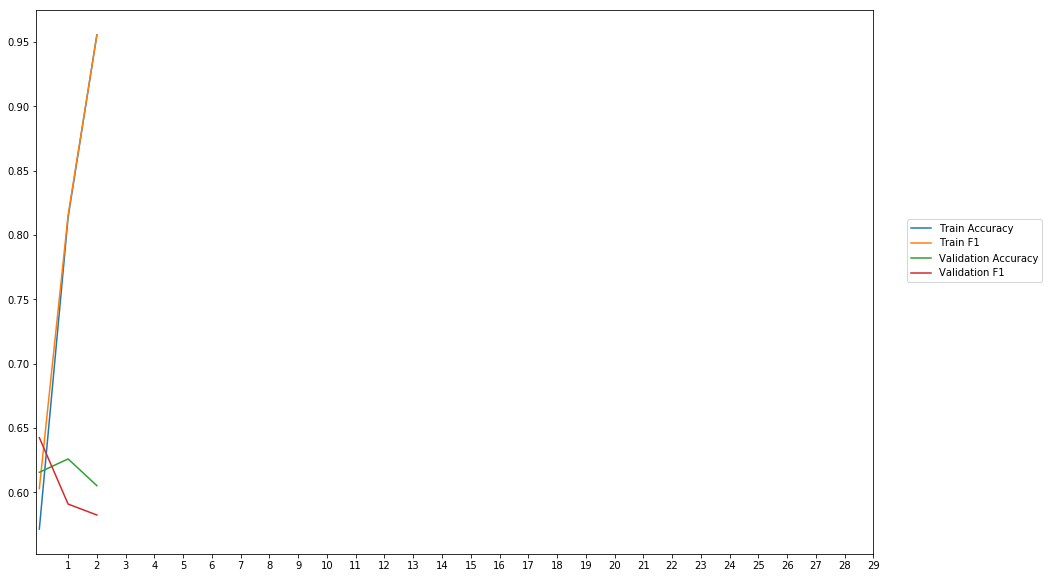

Average Accuracy: 61.56%
Average Precision: 62.18%
Average Recall: 59.55%
Average F1: 60.53%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6820 - acc: 0.5586 - precision: 0.5530 - recall: 0.5971 - f1_score: 0.5742 - val_loss: 0.6360 - val_acc: 0.6458 - val_precision: 0.6708 - val_recall: 0.5654 - val_f1_score: 0.6136
Epoch 2/30
3450/3450 [==============================] - 3s 990us/step - loss: 0.4790 - acc: 0.8151 - precision: 0.8077 - recall: 0.8256 - f1_score: 0.8166 - val_loss: 0.6456 - val_acc: 0.6432 - val_precision: 0.7077 - val_recall: 0.4817 - val_f1_score: 0.5732

-----Fold 2--------


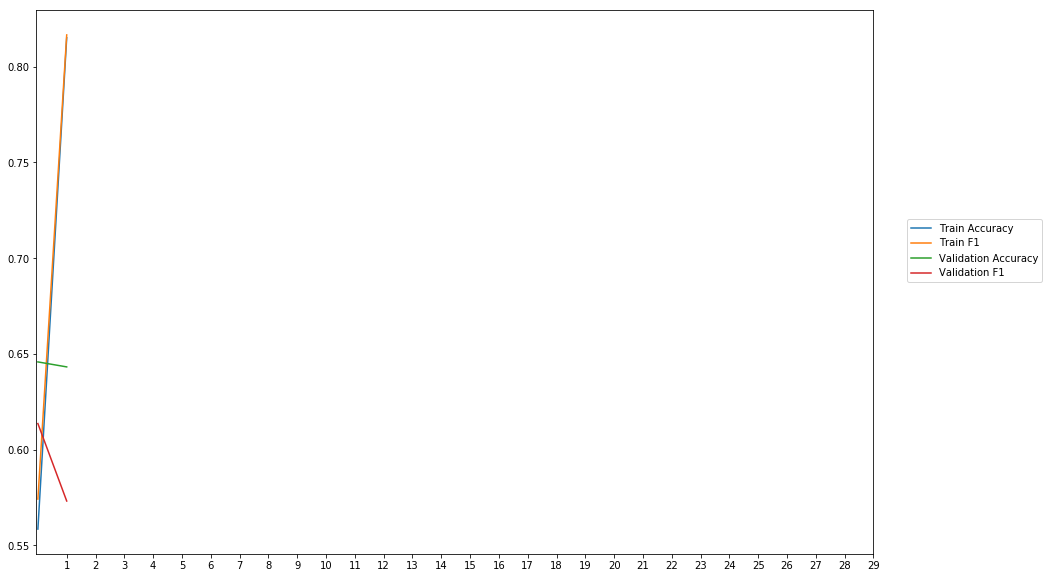

Average Accuracy: 64.45%
Average Precision: 68.92%
Average Recall: 52.36%
Average F1: 59.34%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6822 - acc: 0.5704 - precision: 0.5594 - recall: 0.6517 - f1_score: 0.6020 - val_loss: 0.6465 - val_acc: 0.6484 - val_precision: 0.6667 - val_recall: 0.5864 - val_f1_score: 0.6240
Epoch 2/30
3450/3450 [==============================] - 3s 999us/step - loss: 0.4808 - acc: 0.8159 - precision: 0.8109 - recall: 0.8227 - f1_score: 0.8167 - val_loss: 0.6218 - val_acc: 0.6823 - val_precision: 0.7018 - val_recall: 0.6283 - val_f1_score: 0.6630
Epoch 3/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.1772 - acc: 0.9510 - precision: 0.9506 - recall: 0.9512 - f1_score: 0.9509 - val_loss: 0.7057 - val_acc: 0.6667 - val_precision: 0.6780 - val_recall: 0.6283 - val_f1_score: 0.6522

-----Fold 3--------


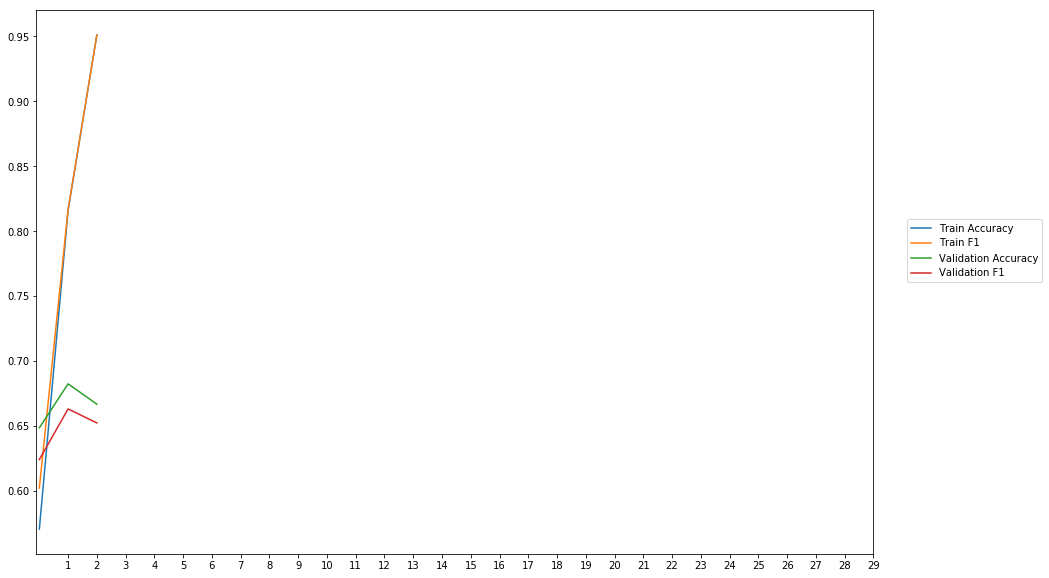

Average Accuracy: 66.58%
Average Precision: 68.21%
Average Recall: 61.43%
Average F1: 64.64%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6801 - acc: 0.5761 - precision: 0.5618 - recall: 0.6791 - f1_score: 0.6149 - val_loss: 0.6444 - val_acc: 0.6397 - val_precision: 0.6157 - val_recall: 0.7382 - val_f1_score: 0.6714
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4868 - acc: 0.8076 - precision: 0.7986 - recall: 0.8209 - f1_score: 0.8096 - val_loss: 0.6320 - val_acc: 0.6475 - val_precision: 0.6728 - val_recall: 0.5707 - val_f1_score: 0.6176
Epoch 3/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.1742 - acc: 0.9533 - precision: 0.9529 - recall: 0.9535 - f1_score: 0.9532 - val_loss: 0.7595 - val_acc: 0.6319 - val_precision: 0.6359 - val_recall: 0.6126 - val_f1_score: 0.6240

-----Fold 4--------


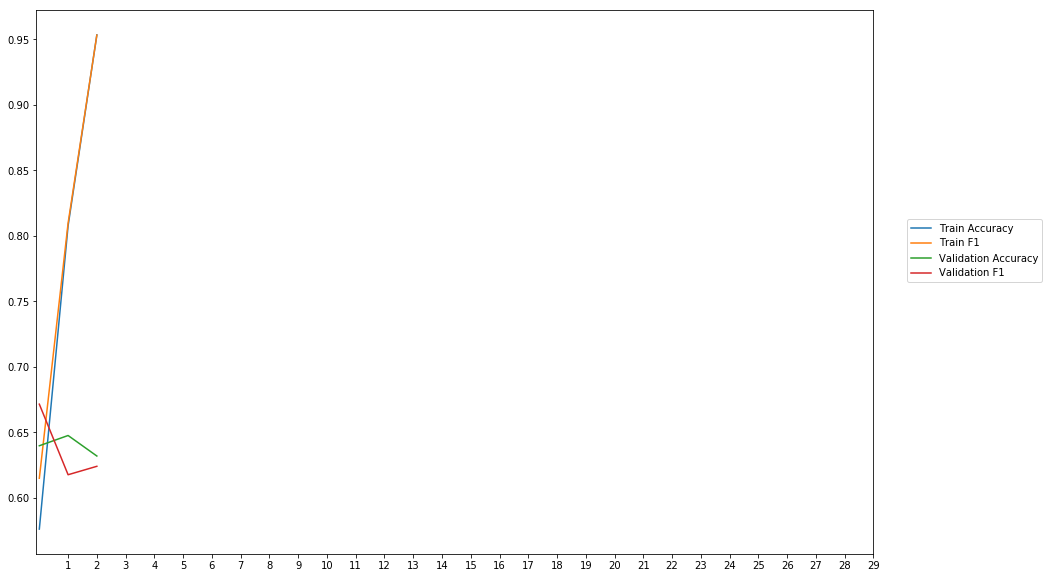

Average Accuracy: 63.97%
Average Precision: 64.15%
Average Recall: 64.05%
Average F1: 63.77%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6838 - acc: 0.5622 - precision: 0.5506 - recall: 0.6616 - f1_score: 0.6010 - val_loss: 0.6473 - val_acc: 0.6345 - val_precision: 0.6335 - val_recall: 0.6335 - val_f1_score: 0.6335
Epoch 2/30
3451/3451 [==============================] - 3s 990us/step - loss: 0.4808 - acc: 0.8134 - precision: 0.8067 - recall: 0.8227 - f1_score: 0.8146 - val_loss: 0.6656 - val_acc: 0.6423 - val_precision: 0.6875 - val_recall: 0.5183 - val_f1_score: 0.5910

-----Fold 5--------


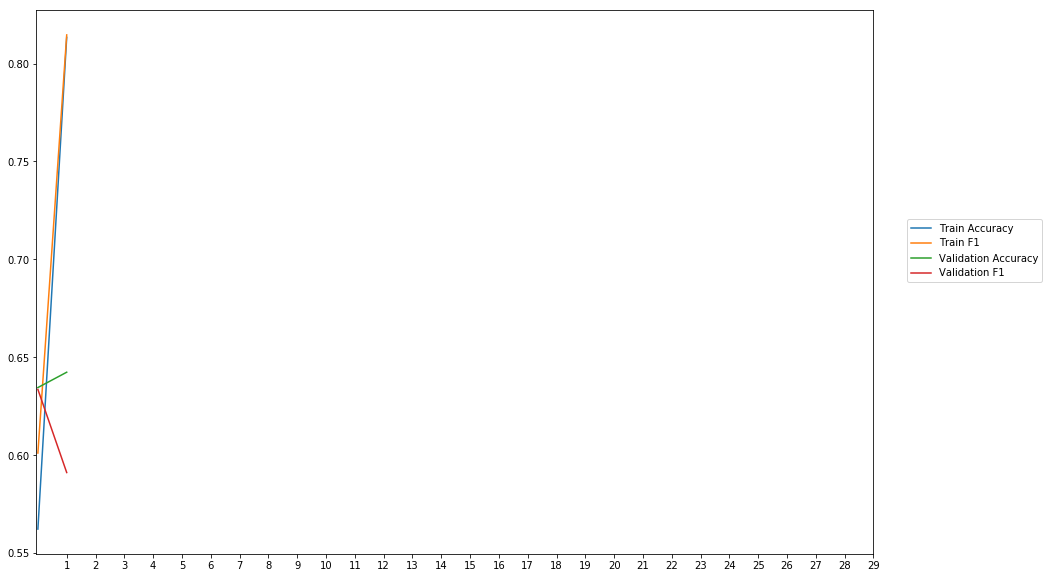

Average Accuracy: 63.84%
Average Precision: 66.05%
Average Recall: 57.59%
Average F1: 61.23%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6764 - acc: 0.5784 - precision: 0.5608 - recall: 0.7110 - f1_score: 0.6270 - val_loss: 0.6664 - val_acc: 0.6110 - val_precision: 0.6029 - val_recall: 0.6440 - val_f1_score: 0.6228
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4745 - acc: 0.8111 - precision: 0.7990 - recall: 0.8297 - f1_score: 0.8140 - val_loss: 0.6838 - val_acc: 0.6214 - val_precision: 0.6575 - val_recall: 0.5026 - val_f1_score: 0.5697

-----Fold 6--------


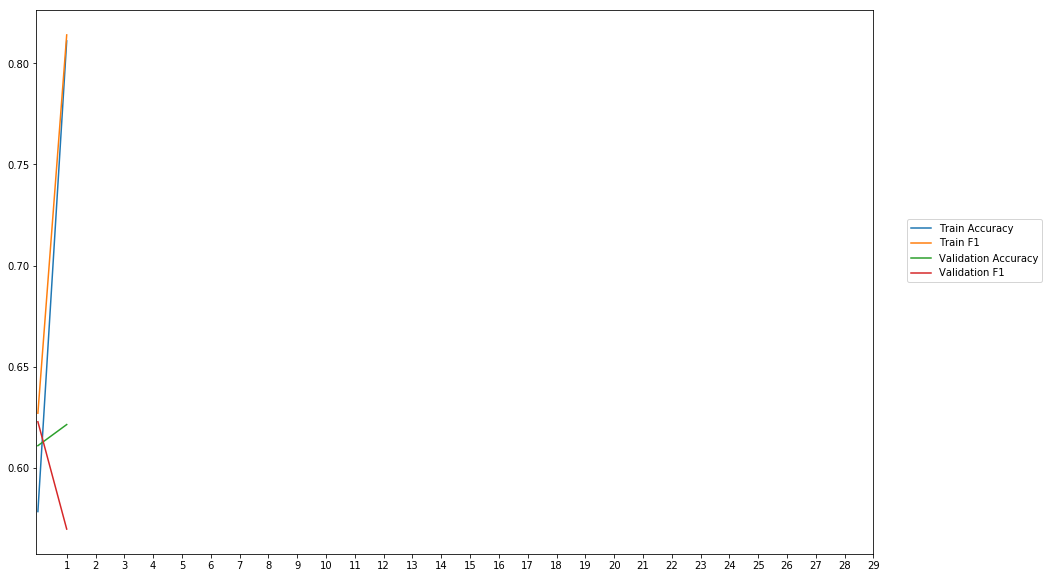

Average Accuracy: 61.62%
Average Precision: 63.02%
Average Recall: 57.33%
Average F1: 59.63%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6743 - acc: 0.5850 - precision: 0.5662 - recall: 0.7163 - f1_score: 0.6324 - val_loss: 0.6823 - val_acc: 0.5770 - val_precision: 0.5633 - val_recall: 0.6754 - val_f1_score: 0.6143
Epoch 2/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.4644 - acc: 0.8218 - precision: 0.8116 - recall: 0.8366 - f1_score: 0.8239 - val_loss: 0.7298 - val_acc: 0.5953 - val_precision: 0.6154 - val_recall: 0.5026 - val_f1_score: 0.5533

-----Fold 7--------


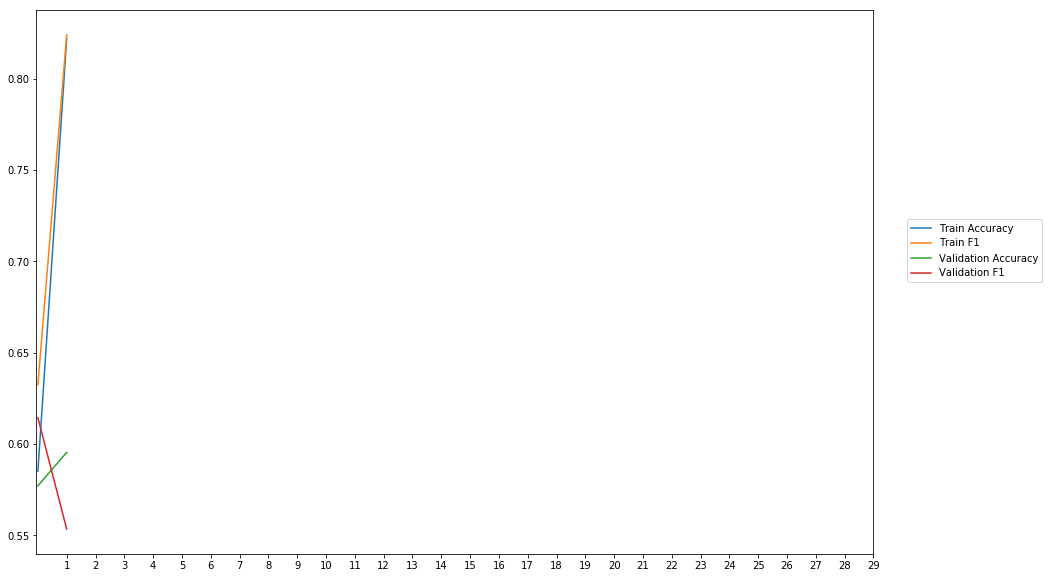

Average Accuracy: 58.62%
Average Precision: 58.94%
Average Recall: 58.90%
Average F1: 58.38%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6777 - acc: 0.5743 - precision: 0.5596 - recall: 0.6855 - f1_score: 0.6161 - val_loss: 0.6798 - val_acc: 0.5979 - val_precision: 0.6011 - val_recall: 0.5759 - val_f1_score: 0.5882
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4812 - acc: 0.8096 - precision: 0.7978 - recall: 0.8279 - f1_score: 0.8126 - val_loss: 0.7017 - val_acc: 0.5927 - val_precision: 0.6400 - val_recall: 0.4188 - val_f1_score: 0.5063

-----Fold 8--------


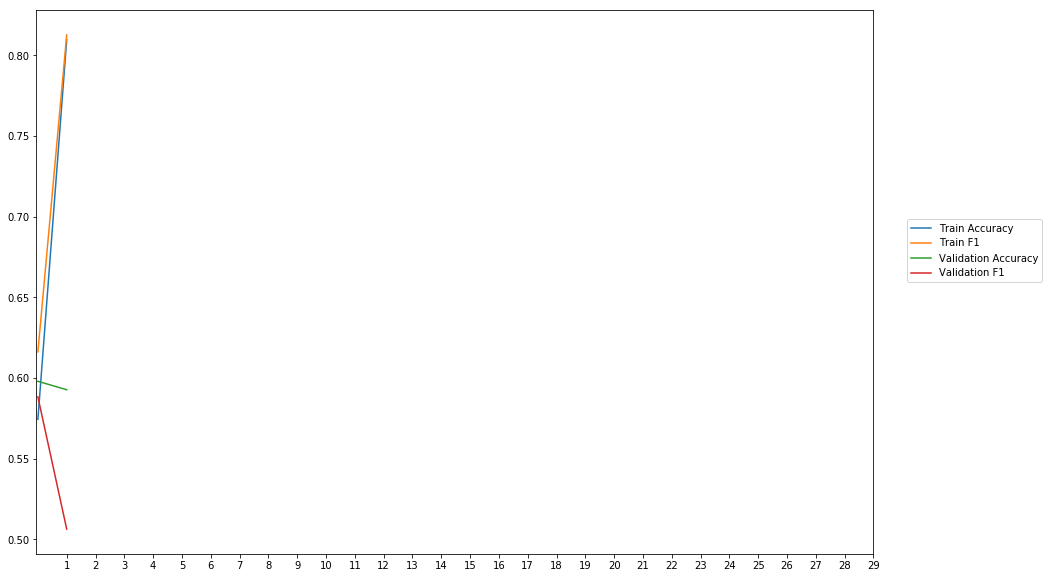

Average Accuracy: 59.53%
Average Precision: 62.05%
Average Recall: 49.74%
Average F1: 54.73%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6778 - acc: 0.5708 - precision: 0.5606 - recall: 0.6424 - f1_score: 0.5988 - val_loss: 0.6491 - val_acc: 0.6580 - val_precision: 0.6389 - val_recall: 0.7225 - val_f1_score: 0.6781
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4798 - acc: 0.8102 - precision: 0.8038 - recall: 0.8192 - f1_score: 0.8114 - val_loss: 0.6368 - val_acc: 0.6162 - val_precision: 0.6222 - val_recall: 0.5864 - val_f1_score: 0.6038
Epoch 3/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.1767 - acc: 0.9539 - precision: 0.9519 - recall: 0.9558 - f1_score: 0.9539 - val_loss: 0.7404 - val_acc: 0.6214 - val_precision: 0.6278 - val_recall: 0.5916 - val_f1_score: 0.6092

-----Fold 9--------


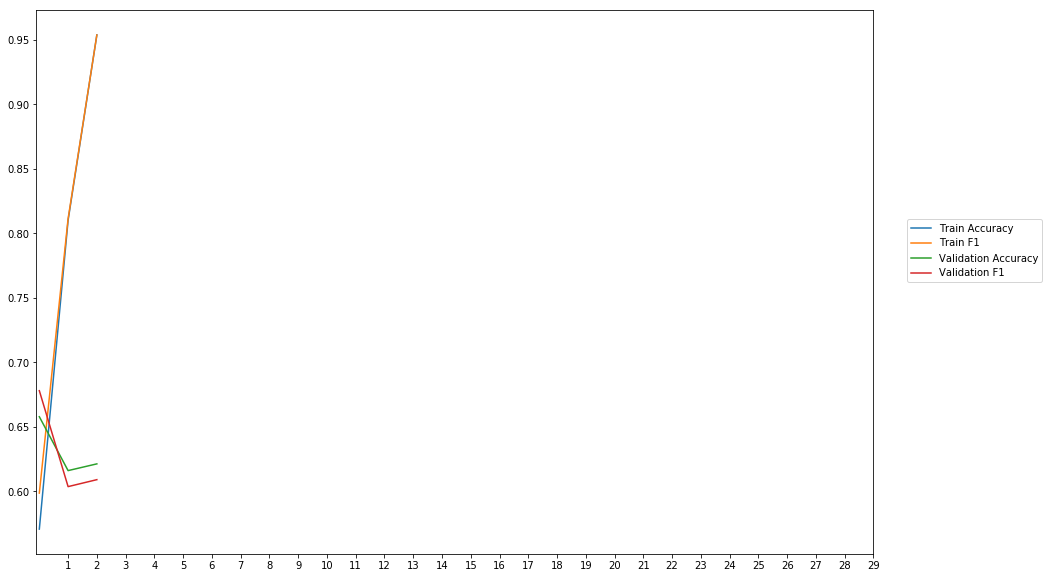

Average Accuracy: 63.19%
Average Precision: 62.96%
Average Recall: 63.35%
Average F1: 63.04%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6760 - acc: 0.5720 - precision: 0.5581 - recall: 0.6785 - f1_score: 0.6124 - val_loss: 0.6607 - val_acc: 0.5901 - val_precision: 0.5988 - val_recall: 0.5393 - val_f1_score: 0.5675
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4702 - acc: 0.8125 - precision: 0.8050 - recall: 0.8233 - f1_score: 0.8140 - val_loss: 0.6866 - val_acc: 0.5953 - val_precision: 0.6286 - val_recall: 0.4607 - val_f1_score: 0.5317

-----Fold 10--------


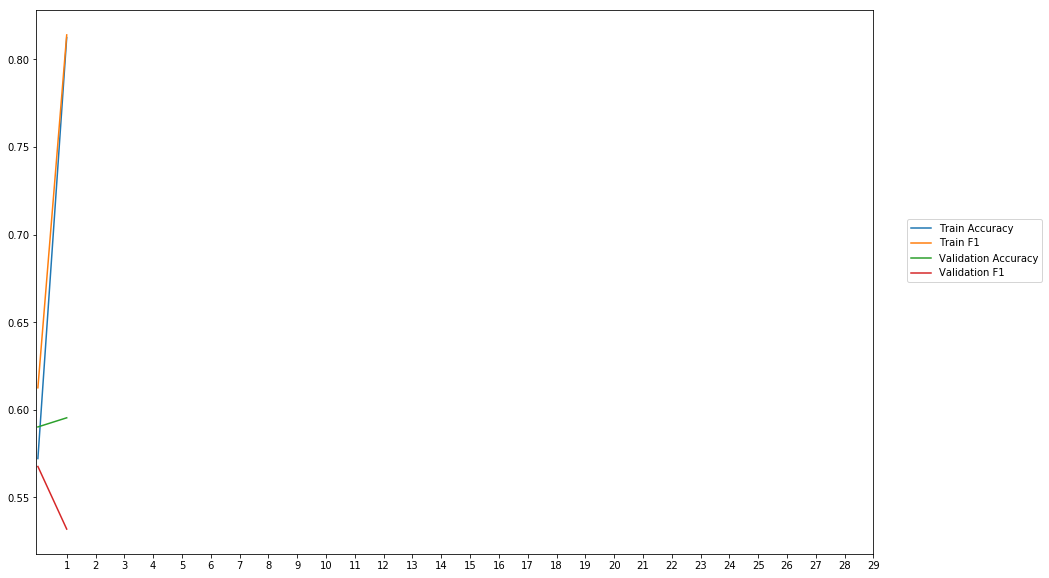

Average Accuracy: 59.27%
Average Precision: 61.37%
Average Recall: 50.00%
Average F1: 54.96%

-------Overallresults-------


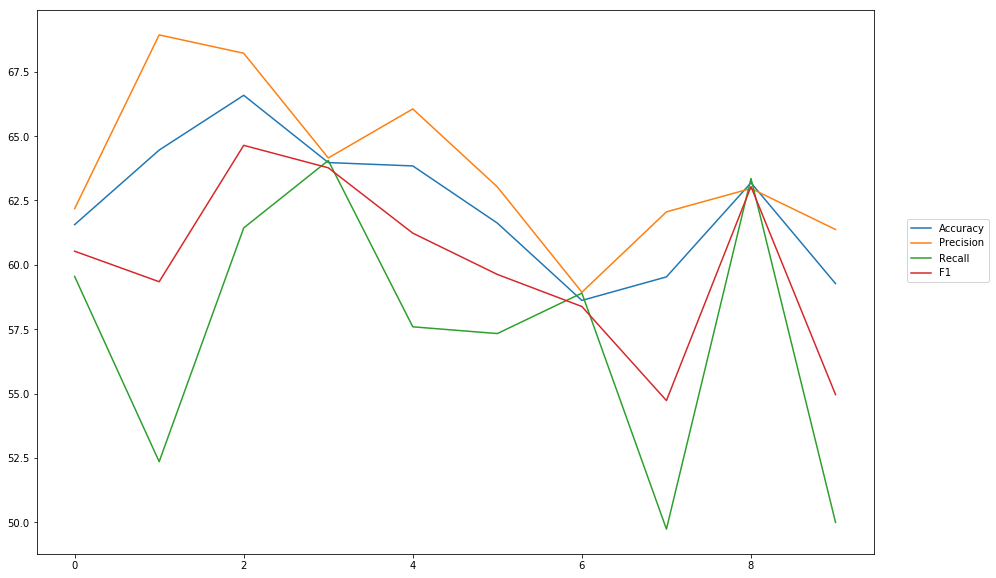

Accuracy: Mean = 62.26% (+/- 2.46%), Max = 66.58%, Min =  58.62%
Precision: Mean = 63.79% (+/- 2.96%), Max = 68.92%, Min =  58.94%
Recall: Mean = 57.43% (+/- 4.92%), Max = 64.05%, Min =  49.74%
F1: Mean = 60.02% (+/- 3.21%), Max = 64.64%, Min =  54.73%


In [9]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_loss_0', 'val_loss', 0)

Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6780 - acc: 0.5747 - precision: 0.5632 - recall: 0.6533 - f1_score: 0.6049 - val_loss: 0.6501 - val_acc: 0.6104 - val_precision: 0.6000 - val_recall: 0.6562 - val_f1_score: 0.6269
Epoch 2/30
3449/3449 [==============================] - 3s 991us/step - loss: 0.4695 - acc: 0.8144 - precision: 0.8064 - recall: 0.8261 - f1_score: 0.8161 - val_loss: 0.6502 - val_acc: 0.6338 - val_precision: 0.6604 - val_recall: 0.5469 - val_f1_score: 0.5983

-----Fold 1--------


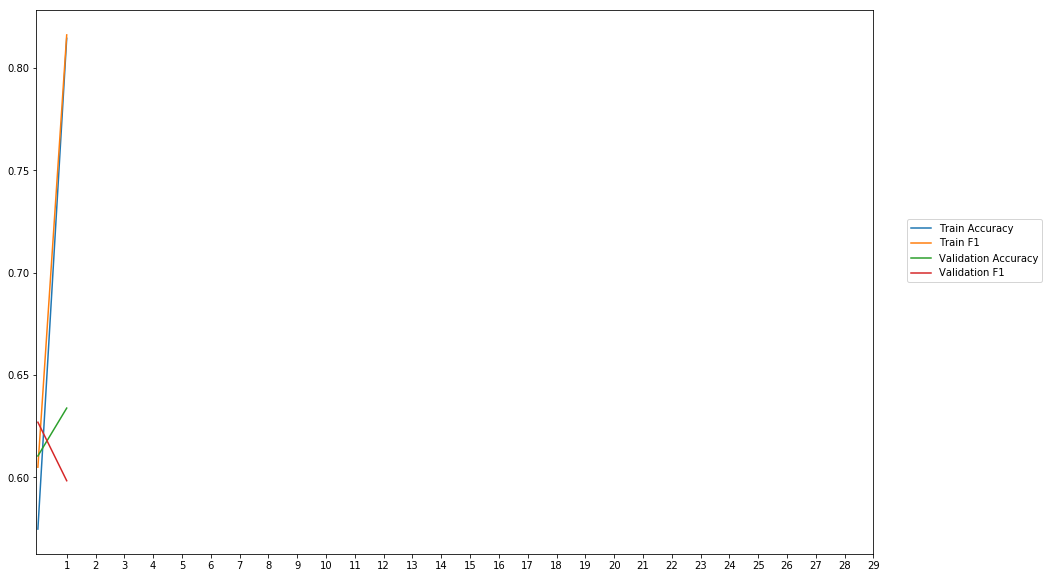

Average Accuracy: 62.21%
Average Precision: 63.02%
Average Recall: 60.16%
Average F1: 61.26%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6820 - acc: 0.5652 - precision: 0.5594 - recall: 0.6023 - f1_score: 0.5801 - val_loss: 0.6355 - val_acc: 0.6458 - val_precision: 0.6667 - val_recall: 0.5759 - val_f1_score: 0.6180
Epoch 2/30
3450/3450 [==============================] - 3s 986us/step - loss: 0.4806 - acc: 0.8148 - precision: 0.8073 - recall: 0.8256 - f1_score: 0.8163 - val_loss: 0.6488 - val_acc: 0.6432 - val_precision: 0.7109 - val_recall: 0.4764 - val_f1_score: 0.5705

-----Fold 2--------


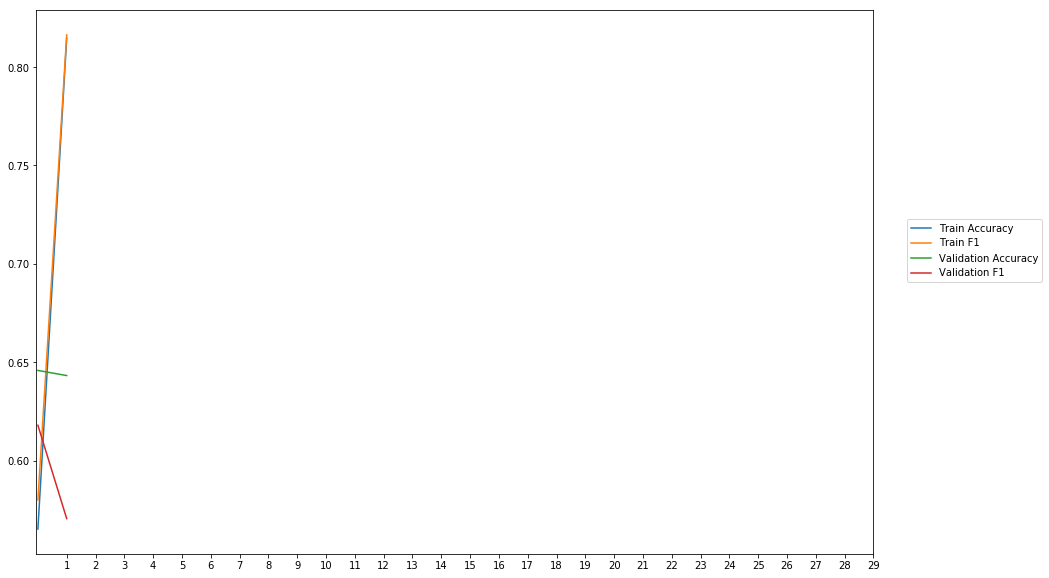

Average Accuracy: 64.45%
Average Precision: 68.88%
Average Recall: 52.62%
Average F1: 59.43%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6792 - acc: 0.5739 - precision: 0.5603 - recall: 0.6756 - f1_score: 0.6125 - val_loss: 0.6433 - val_acc: 0.6536 - val_precision: 0.6593 - val_recall: 0.6283 - val_f1_score: 0.6434
Epoch 2/30
3450/3450 [==============================] - 3s 999us/step - loss: 0.4749 - acc: 0.8186 - precision: 0.8140 - recall: 0.8244 - f1_score: 0.8192 - val_loss: 0.6209 - val_acc: 0.6901 - val_precision: 0.7143 - val_recall: 0.6283 - val_f1_score: 0.6685
Epoch 3/30
3450/3450 [==============================] - 3s 995us/step - loss: 0.1745 - acc: 0.9533 - precision: 0.9514 - recall: 0.9552 - f1_score: 0.9533 - val_loss: 0.7067 - val_acc: 0.6719 - val_precision: 0.6923 - val_recall: 0.6126 - val_f1_score: 0.6500

-----Fold 3--------


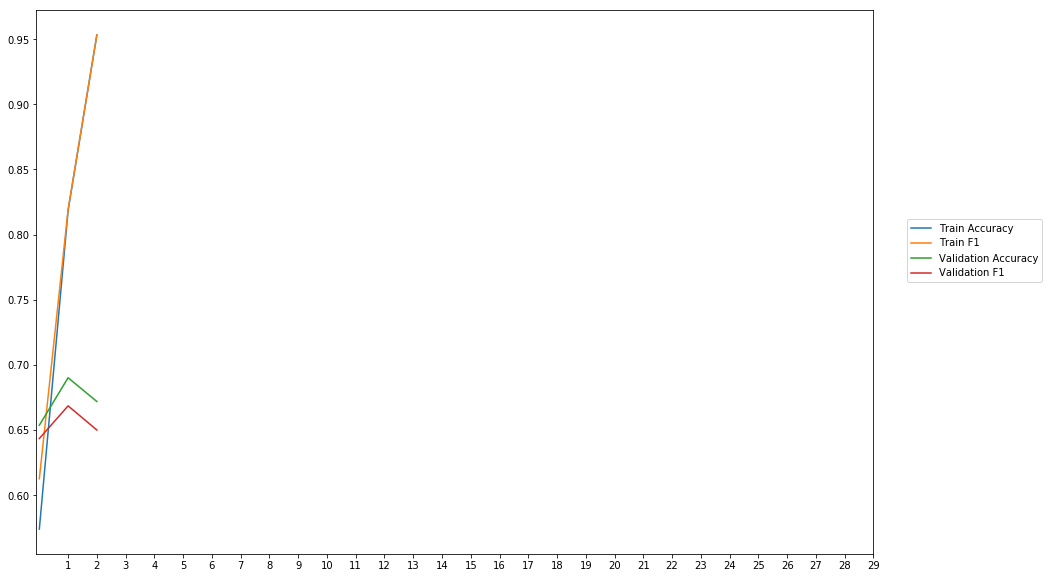

Average Accuracy: 67.19%
Average Precision: 68.86%
Average Recall: 62.30%
Average F1: 65.40%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6799 - acc: 0.5784 - precision: 0.5636 - recall: 0.6826 - f1_score: 0.6174 - val_loss: 0.6444 - val_acc: 0.6423 - val_precision: 0.6164 - val_recall: 0.7487 - val_f1_score: 0.6761
Epoch 2/30
3451/3451 [==============================] - ETA: 0s - loss: 0.4864 - acc: 0.8087 - precision: 0.8008 - recall: 0.8220 - f1_score: 0.811 - 3s 999us/step - loss: 0.4864 - acc: 0.8079 - precision: 0.7984 - recall: 0.8221 - f1_score: 0.8101 - val_loss: 0.6320 - val_acc: 0.6449 - val_precision: 0.6647 - val_recall: 0.5812 - val_f1_score: 0.6201
Epoch 3/30
3451/3451 [==============================] - 3s 990us/step - loss: 0.1729 - acc: 0.9542 - precision: 0.9557 - recall: 0.9523 - f1_score: 0.9540 - val_loss: 0.7623 - val_acc: 0.6345 - val_precision: 0.6378 - val_recall: 0.6178 - val_f1_sc

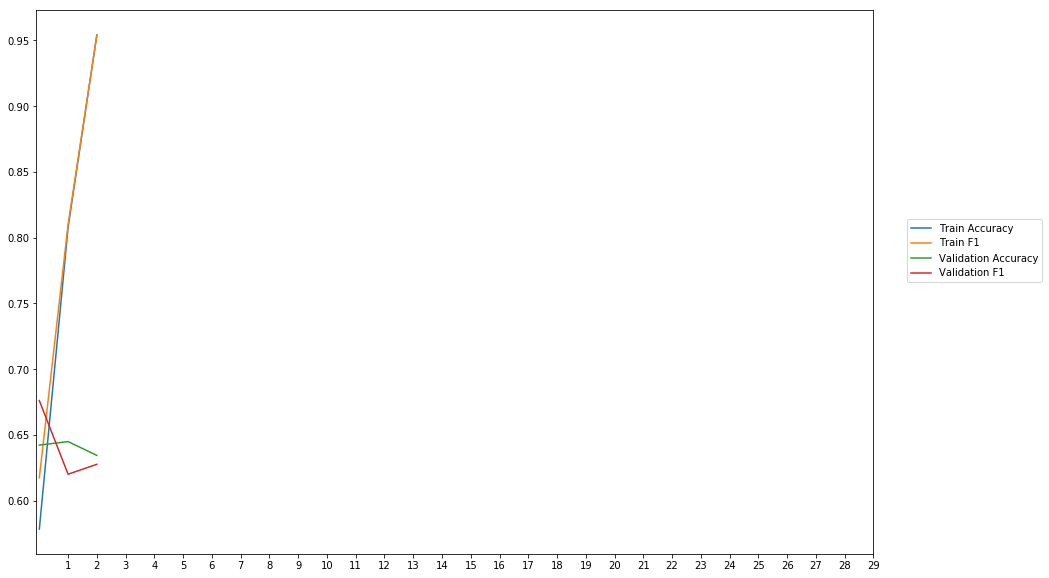

Average Accuracy: 64.06%
Average Precision: 63.96%
Average Recall: 64.92%
Average F1: 64.13%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6838 - acc: 0.5616 - precision: 0.5497 - recall: 0.6651 - f1_score: 0.6019 - val_loss: 0.6474 - val_acc: 0.6371 - val_precision: 0.6354 - val_recall: 0.6387 - val_f1_score: 0.6371
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4804 - acc: 0.8128 - precision: 0.8051 - recall: 0.8238 - f1_score: 0.8144 - val_loss: 0.6651 - val_acc: 0.6423 - val_precision: 0.6875 - val_recall: 0.5183 - val_f1_score: 0.5910

-----Fold 5--------


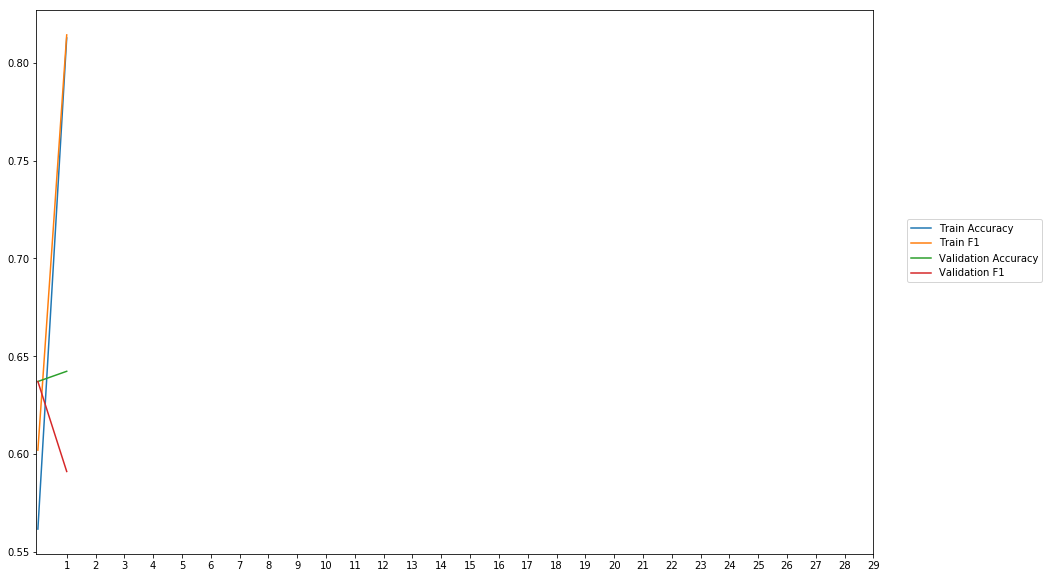

Average Accuracy: 63.97%
Average Precision: 66.15%
Average Recall: 57.85%
Average F1: 61.41%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6767 - acc: 0.5787 - precision: 0.5619 - recall: 0.7023 - f1_score: 0.6243 - val_loss: 0.6661 - val_acc: 0.6188 - val_precision: 0.6142 - val_recall: 0.6335 - val_f1_score: 0.6237
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4726 - acc: 0.8122 - precision: 0.8025 - recall: 0.8267 - f1_score: 0.8144 - val_loss: 0.6886 - val_acc: 0.6162 - val_precision: 0.6528 - val_recall: 0.4921 - val_f1_score: 0.5612

-----Fold 6--------


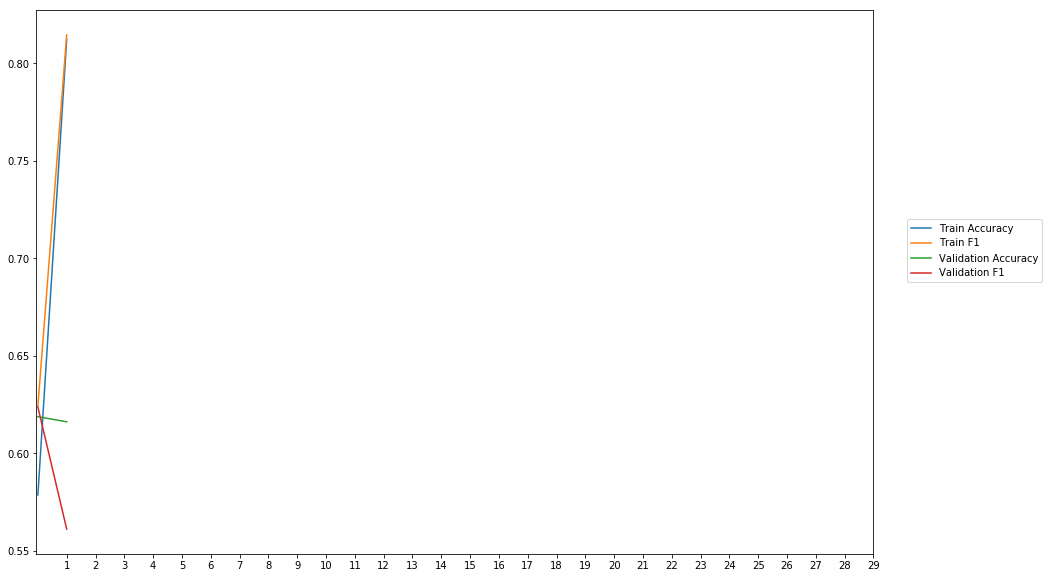

Average Accuracy: 61.75%
Average Precision: 63.35%
Average Recall: 56.28%
Average F1: 59.25%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6745 - acc: 0.5836 - precision: 0.5648 - recall: 0.7169 - f1_score: 0.6318 - val_loss: 0.6827 - val_acc: 0.5718 - val_precision: 0.5595 - val_recall: 0.6649 - val_f1_score: 0.6077
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4645 - acc: 0.8177 - precision: 0.8084 - recall: 0.8314 - f1_score: 0.8197 - val_loss: 0.7440 - val_acc: 0.5953 - val_precision: 0.6324 - val_recall: 0.4503 - val_f1_score: 0.5260

-----Fold 7--------


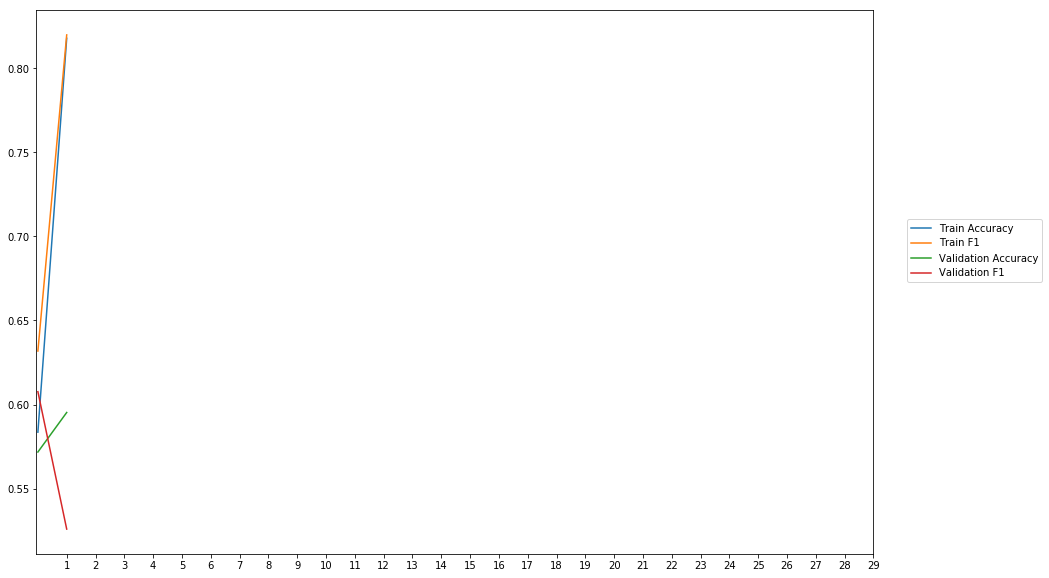

Average Accuracy: 58.36%
Average Precision: 59.59%
Average Recall: 55.76%
Average F1: 56.68%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6779 - acc: 0.5723 - precision: 0.5582 - recall: 0.6802 - f1_score: 0.6132 - val_loss: 0.6801 - val_acc: 0.6188 - val_precision: 0.6331 - val_recall: 0.5602 - val_f1_score: 0.5944
Epoch 2/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.4804 - acc: 0.8111 - precision: 0.7993 - recall: 0.8291 - f1_score: 0.8139 - val_loss: 0.7016 - val_acc: 0.6031 - val_precision: 0.6512 - val_recall: 0.4398 - val_f1_score: 0.5250

-----Fold 8--------


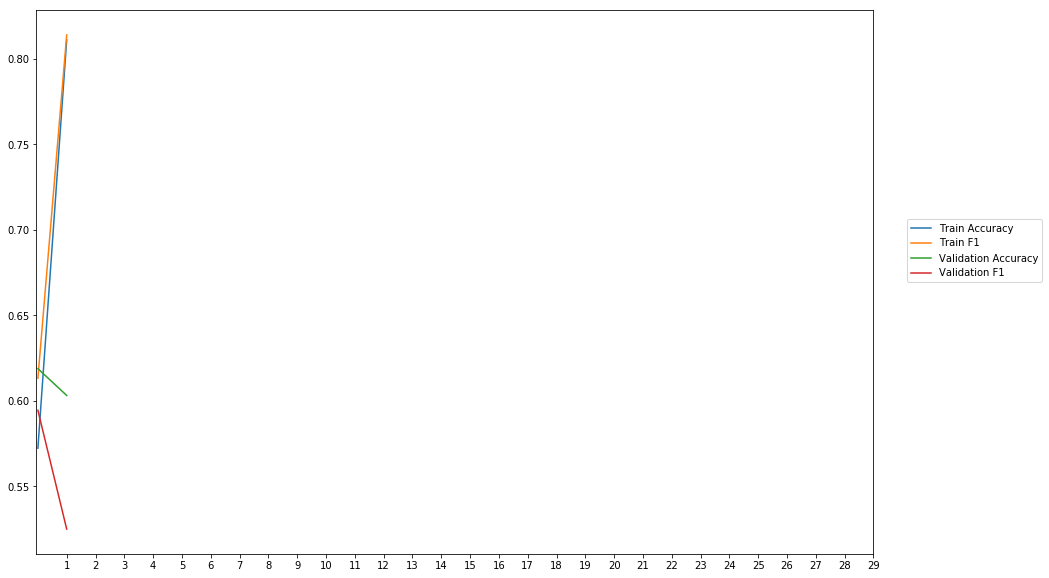

Average Accuracy: 61.10%
Average Precision: 64.21%
Average Recall: 50.00%
Average F1: 55.97%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6773 - acc: 0.5746 - precision: 0.5629 - recall: 0.6558 - f1_score: 0.6058 - val_loss: 0.6489 - val_acc: 0.6606 - val_precision: 0.6356 - val_recall: 0.7487 - val_f1_score: 0.6875
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4807 - acc: 0.8064 - precision: 0.7982 - recall: 0.8186 - f1_score: 0.8083 - val_loss: 0.6382 - val_acc: 0.6266 - val_precision: 0.6395 - val_recall: 0.5759 - val_f1_score: 0.6061
Epoch 3/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.1773 - acc: 0.9531 - precision: 0.9513 - recall: 0.9547 - f1_score: 0.9530 - val_loss: 0.7412 - val_acc: 0.6162 - val_precision: 0.6222 - val_recall: 0.5864 - val_f1_score: 0.6038

-----Fold 9--------


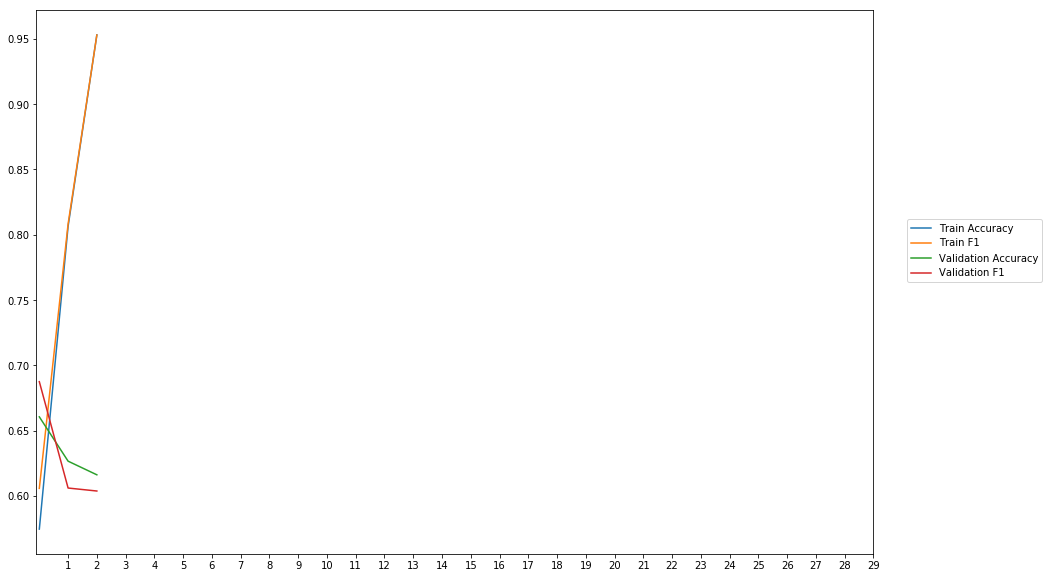

Average Accuracy: 63.45%
Average Precision: 63.24%
Average Recall: 63.70%
Average F1: 63.24%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6770 - acc: 0.5674 - precision: 0.5545 - recall: 0.6715 - f1_score: 0.6074 - val_loss: 0.6616 - val_acc: 0.5927 - val_precision: 0.6087 - val_recall: 0.5131 - val_f1_score: 0.5568
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4682 - acc: 0.8134 - precision: 0.8067 - recall: 0.8227 - f1_score: 0.8146 - val_loss: 0.6861 - val_acc: 0.5822 - val_precision: 0.6084 - val_recall: 0.4555 - val_f1_score: 0.5210

-----Fold 10--------


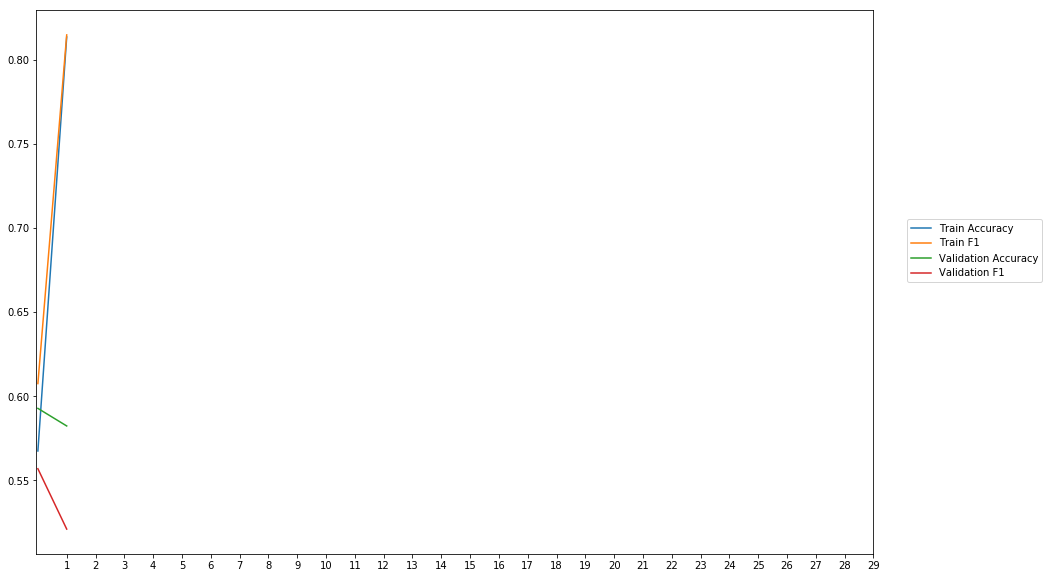

Average Accuracy: 58.75%
Average Precision: 60.85%
Average Recall: 48.43%
Average F1: 53.89%

-------Overallresults-------


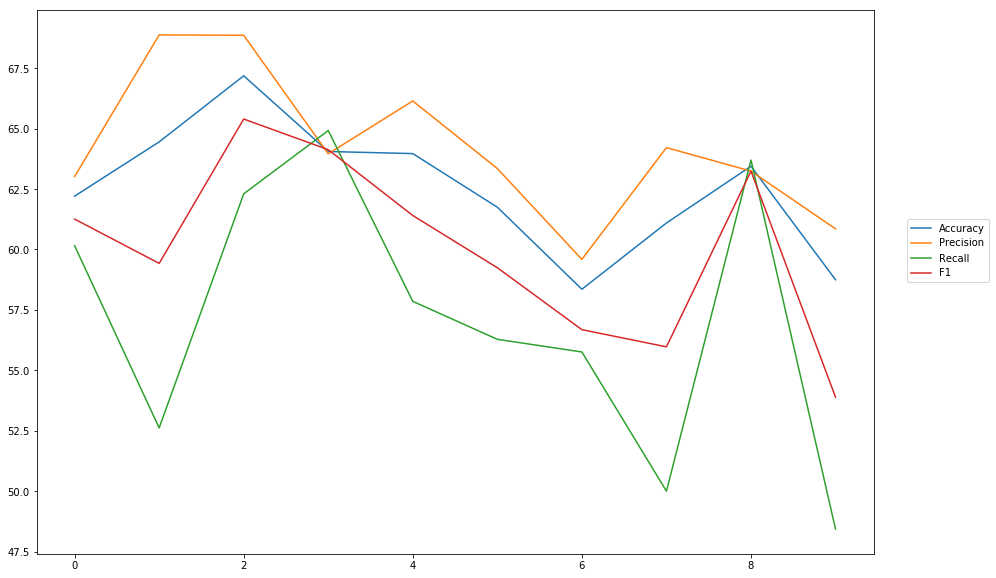

Accuracy: Mean = 62.53% (+/- 2.55%), Max = 67.19%, Min =  58.36%
Precision: Mean = 64.21% (+/- 2.88%), Max = 68.88%, Min =  59.59%
Recall: Mean = 57.20% (+/- 5.38%), Max = 64.92%, Min =  48.43%
F1: Mean = 60.07% (+/- 3.55%), Max = 65.40%, Min =  53.89%


In [10]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_loss_1', 'val_loss', 1)

Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6779 - acc: 0.5764 - precision: 0.5644 - recall: 0.6579 - f1_score: 0.6076 - val_loss: 0.6504 - val_acc: 0.6130 - val_precision: 0.6009 - val_recall: 0.6667 - val_f1_score: 0.6321
Epoch 2/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.4691 - acc: 0.8159 - precision: 0.8090 - recall: 0.8255 - f1_score: 0.8172 - val_loss: 0.6514 - val_acc: 0.6286 - val_precision: 0.6541 - val_recall: 0.5417 - val_f1_score: 0.5926
Epoch 3/30
3449/3449 [==============================] - 3s 1000us/step - loss: 0.1641 - acc: 0.9571 - precision: 0.9575 - recall: 0.9564 - f1_score: 0.9569 - val_loss: 0.7721 - val_acc: 0.5974 - val_precision: 0.6108 - val_recall: 0.5312 - val_f1_score: 0.5682

-----Fold 1--------


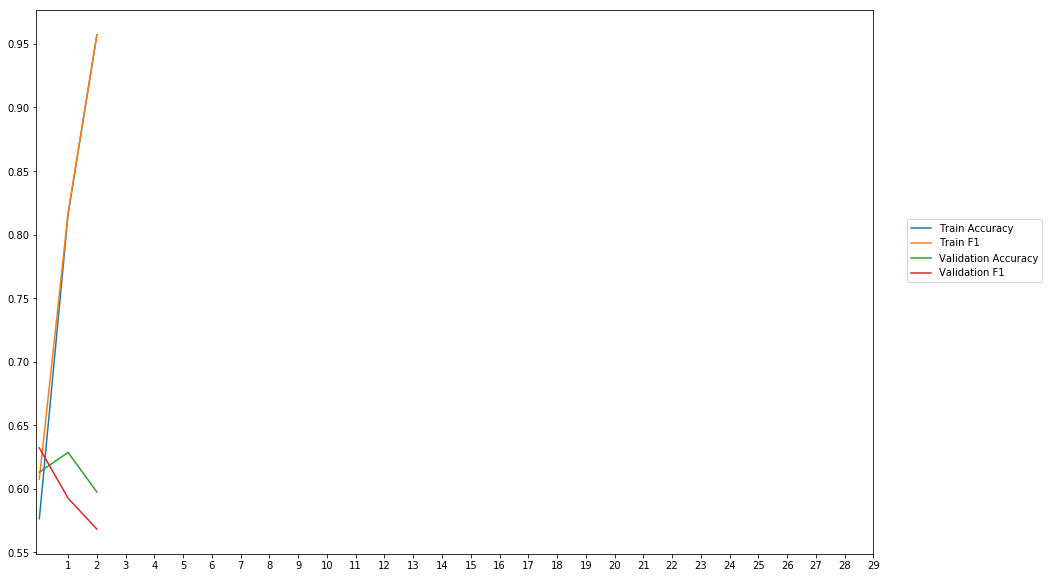

Average Accuracy: 61.30%
Average Precision: 62.19%
Average Recall: 57.99%
Average F1: 59.76%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6819 - acc: 0.5626 - precision: 0.5575 - recall: 0.5948 - f1_score: 0.5755 - val_loss: 0.6355 - val_acc: 0.6406 - val_precision: 0.6667 - val_recall: 0.5550 - val_f1_score: 0.6057
Epoch 2/30
3450/3450 [==============================] - 3s 995us/step - loss: 0.4779 - acc: 0.8168 - precision: 0.8098 - recall: 0.8267 - f1_score: 0.8182 - val_loss: 0.6437 - val_acc: 0.6458 - val_precision: 0.7099 - val_recall: 0.4869 - val_f1_score: 0.5776
Epoch 3/30
3450/3450 [==============================] - 3s 995us/step - loss: 0.1750 - acc: 0.9533 - precision: 0.9508 - recall: 0.9558 - f1_score: 0.9533 - val_loss: 0.8185 - val_acc: 0.6276 - val_precision: 0.6967 - val_recall: 0.4450 - val_f1_score: 0.5431

-----Fold 2--------


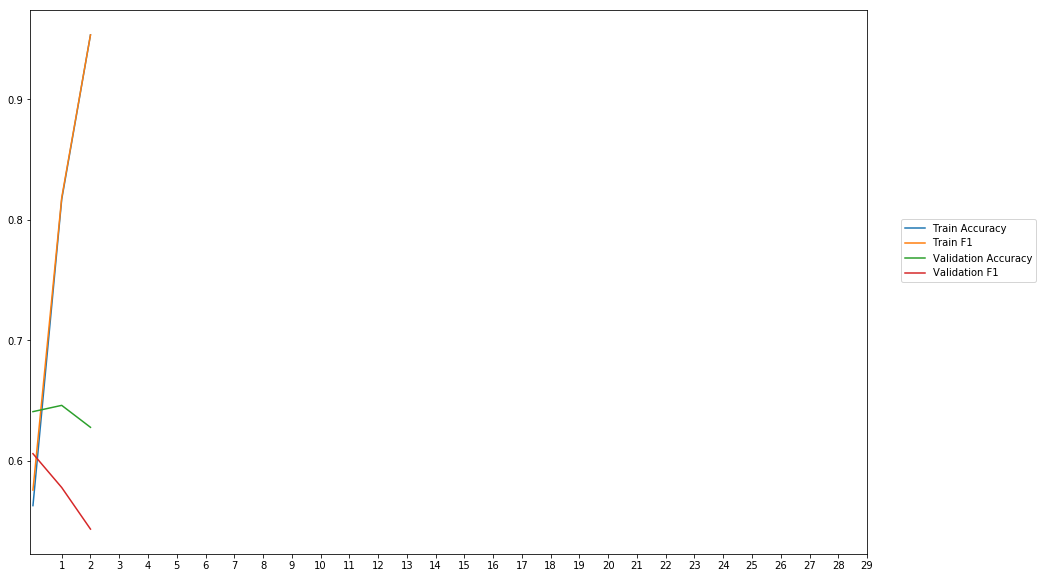

Average Accuracy: 63.80%
Average Precision: 69.11%
Average Recall: 49.56%
Average F1: 57.55%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6793 - acc: 0.5730 - precision: 0.5596 - recall: 0.6744 - f1_score: 0.6117 - val_loss: 0.6435 - val_acc: 0.6589 - val_precision: 0.6667 - val_recall: 0.6283 - val_f1_score: 0.6469
Epoch 2/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.4753 - acc: 0.8183 - precision: 0.8125 - recall: 0.8262 - f1_score: 0.8193 - val_loss: 0.6171 - val_acc: 0.6823 - val_precision: 0.6971 - val_recall: 0.6387 - val_f1_score: 0.6667
Epoch 3/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.1744 - acc: 0.9528 - precision: 0.9513 - recall: 0.9541 - f1_score: 0.9527 - val_loss: 0.7063 - val_acc: 0.6719 - val_precision: 0.6923 - val_recall: 0.6126 - val_f1_score: 0.6500
Epoch 4/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.0447 - a

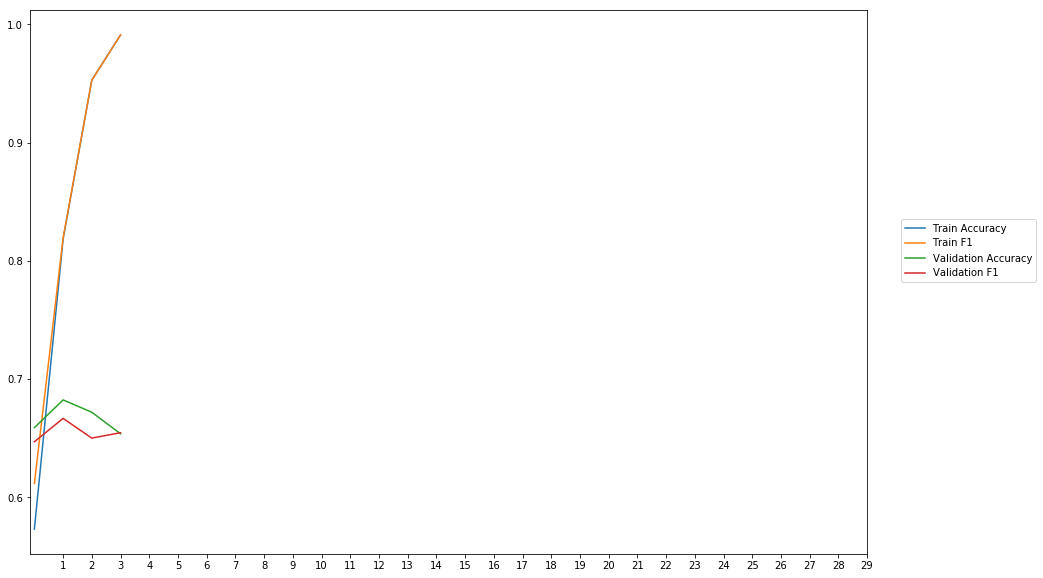

Average Accuracy: 66.67%
Average Precision: 67.64%
Average Recall: 63.48%
Average F1: 65.45%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6800 - acc: 0.5790 - precision: 0.5641 - recall: 0.6831 - f1_score: 0.6179 - val_loss: 0.6442 - val_acc: 0.6397 - val_precision: 0.6157 - val_recall: 0.7382 - val_f1_score: 0.6714
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4861 - acc: 0.8099 - precision: 0.7995 - recall: 0.8256 - f1_score: 0.8124 - val_loss: 0.6358 - val_acc: 0.6423 - val_precision: 0.6709 - val_recall: 0.5550 - val_f1_score: 0.6074
Epoch 3/30
3451/3451 [==============================] - 3s 985us/step - loss: 0.1728 - acc: 0.9545 - precision: 0.9557 - recall: 0.9529 - f1_score: 0.9543 - val_loss: 0.7641 - val_acc: 0.6345 - val_precision: 0.6378 - val_recall: 0.6178 - val_f1_score: 0.6277
Epoch 4/30
3451/3451 [==============================] - 3s 990us/step - loss: 0.04

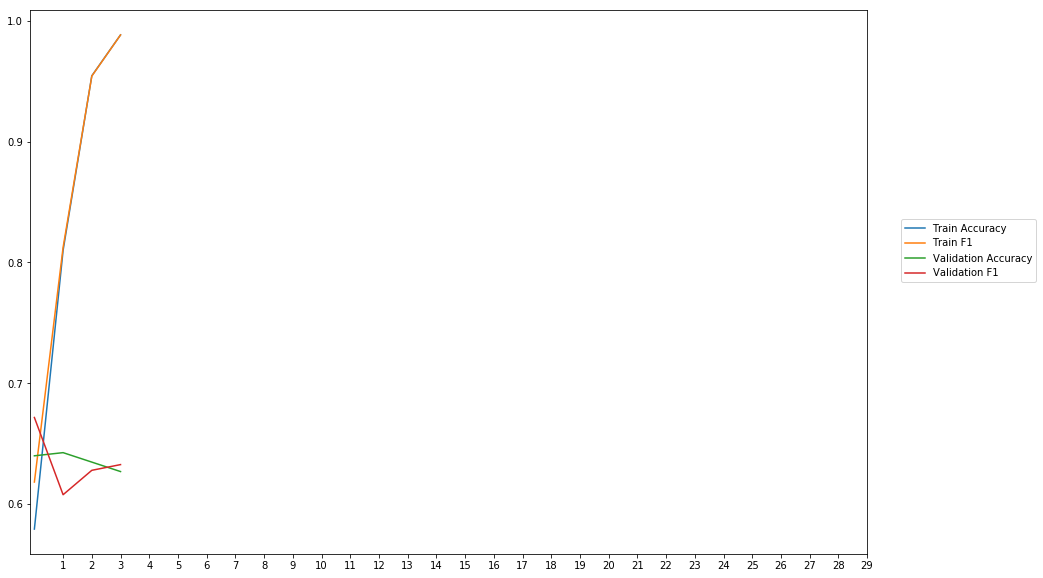

Average Accuracy: 63.58%
Average Precision: 63.64%
Average Recall: 63.87%
Average F1: 63.47%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6837 - acc: 0.5622 - precision: 0.5504 - recall: 0.6640 - f1_score: 0.6018 - val_loss: 0.6475 - val_acc: 0.6423 - val_precision: 0.6436 - val_recall: 0.6335 - val_f1_score: 0.6385
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4817 - acc: 0.8099 - precision: 0.8026 - recall: 0.8203 - f1_score: 0.8114 - val_loss: 0.6652 - val_acc: 0.6475 - val_precision: 0.6944 - val_recall: 0.5236 - val_f1_score: 0.5970
Epoch 3/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.1736 - acc: 0.9531 - precision: 0.9556 - recall: 0.9500 - f1_score: 0.9528 - val_loss: 0.8483 - val_acc: 0.6371 - val_precision: 0.6806 - val_recall: 0.5131 - val_f1_score: 0.5851

-----Fold 5--------


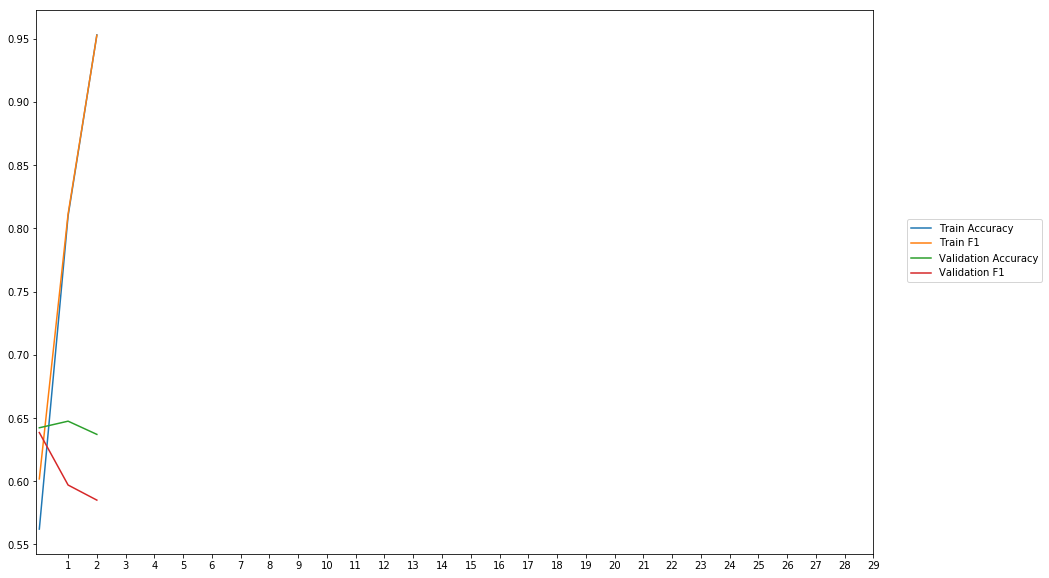

Average Accuracy: 64.23%
Average Precision: 67.29%
Average Recall: 55.67%
Average F1: 60.69%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6764 - acc: 0.5766 - precision: 0.5597 - recall: 0.7058 - f1_score: 0.6243 - val_loss: 0.6664 - val_acc: 0.6084 - val_precision: 0.5990 - val_recall: 0.6492 - val_f1_score: 0.6231
Epoch 2/30
3451/3451 [==============================] - 3s 994us/step - loss: 0.4748 - acc: 0.8119 - precision: 0.8003 - recall: 0.8297 - f1_score: 0.8147 - val_loss: 0.6851 - val_acc: 0.6214 - val_precision: 0.6575 - val_recall: 0.5026 - val_f1_score: 0.5697
Epoch 3/30
3451/3451 [==============================] - 3s 985us/step - loss: 0.1741 - acc: 0.9528 - precision: 0.9508 - recall: 0.9547 - f1_score: 0.9527 - val_loss: 0.8063 - val_acc: 0.6136 - val_precision: 0.6503 - val_recall: 0.4869 - val_f1_score: 0.5569

-----Fold 6--------


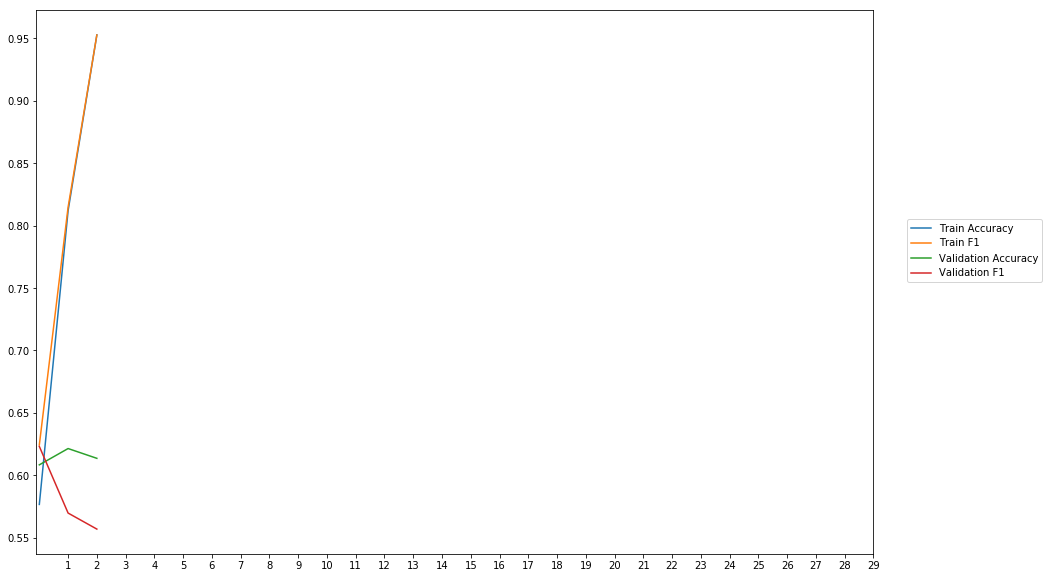

Average Accuracy: 61.44%
Average Precision: 63.56%
Average Recall: 54.62%
Average F1: 58.32%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6744 - acc: 0.5836 - precision: 0.5648 - recall: 0.7174 - f1_score: 0.6320 - val_loss: 0.6825 - val_acc: 0.5718 - val_precision: 0.5595 - val_recall: 0.6649 - val_f1_score: 0.6077
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4659 - acc: 0.8195 - precision: 0.8090 - recall: 0.8349 - f1_score: 0.8217 - val_loss: 0.7286 - val_acc: 0.5953 - val_precision: 0.6154 - val_recall: 0.5026 - val_f1_score: 0.5533
Epoch 3/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.1704 - acc: 0.9516 - precision: 0.9544 - recall: 0.9483 - f1_score: 0.9513 - val_loss: 0.9005 - val_acc: 0.5979 - val_precision: 0.6276 - val_recall: 0.4764 - val_f1_score: 0.5417

-----Fold 7--------


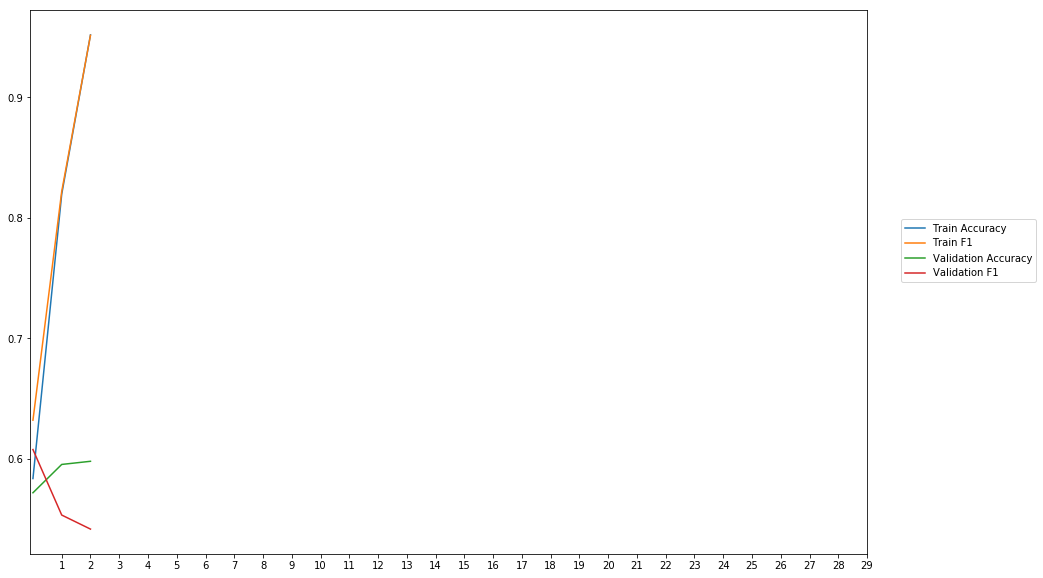

Average Accuracy: 58.83%
Average Precision: 60.08%
Average Recall: 54.80%
Average F1: 56.75%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6776 - acc: 0.5743 - precision: 0.5595 - recall: 0.6860 - f1_score: 0.6163 - val_loss: 0.6796 - val_acc: 0.5979 - val_precision: 0.5989 - val_recall: 0.5864 - val_f1_score: 0.5926
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4818 - acc: 0.8085 - precision: 0.7947 - recall: 0.8302 - f1_score: 0.8121 - val_loss: 0.7076 - val_acc: 0.5953 - val_precision: 0.6500 - val_recall: 0.4084 - val_f1_score: 0.5016
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1750 - acc: 0.9522 - precision: 0.9544 - recall: 0.9494 - f1_score: 0.9519 - val_loss: 0.7763 - val_acc: 0.6240 - val_precision: 0.6343 - val_recall: 0.5812 - val_f1_score: 0.6066

-----Fold 8--------


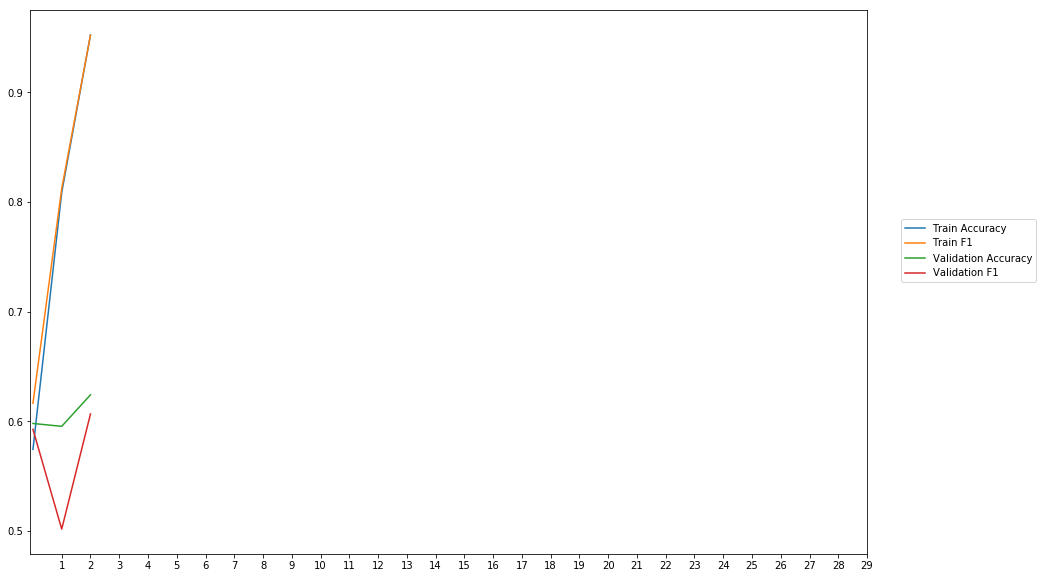

Average Accuracy: 60.57%
Average Precision: 62.77%
Average Recall: 52.53%
Average F1: 56.69%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6817 - acc: 0.5706 - precision: 0.5611 - recall: 0.6355 - f1_score: 0.5960 - val_loss: 0.6509 - val_acc: 0.6658 - val_precision: 0.6425 - val_recall: 0.7435 - val_f1_score: 0.6893
Epoch 2/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.4890 - acc: 0.8021 - precision: 0.7931 - recall: 0.8157 - f1_score: 0.8042 - val_loss: 0.6376 - val_acc: 0.6136 - val_precision: 0.6188 - val_recall: 0.5864 - val_f1_score: 0.6022
Epoch 3/30
3451/3451 [==============================] - ETA: 0s - loss: 0.1813 - acc: 0.9514 - precision: 0.9490 - recall: 0.9540 - f1_score: 0.951 - 3s 999us/step - loss: 0.1806 - acc: 0.9516 - precision: 0.9491 - recall: 0.9541 - f1_score: 0.9516 - val_loss: 0.7387 - val_acc: 0.6214 - val_precision: 0.6307 - val_recall: 0.5812 - val_f1_sc

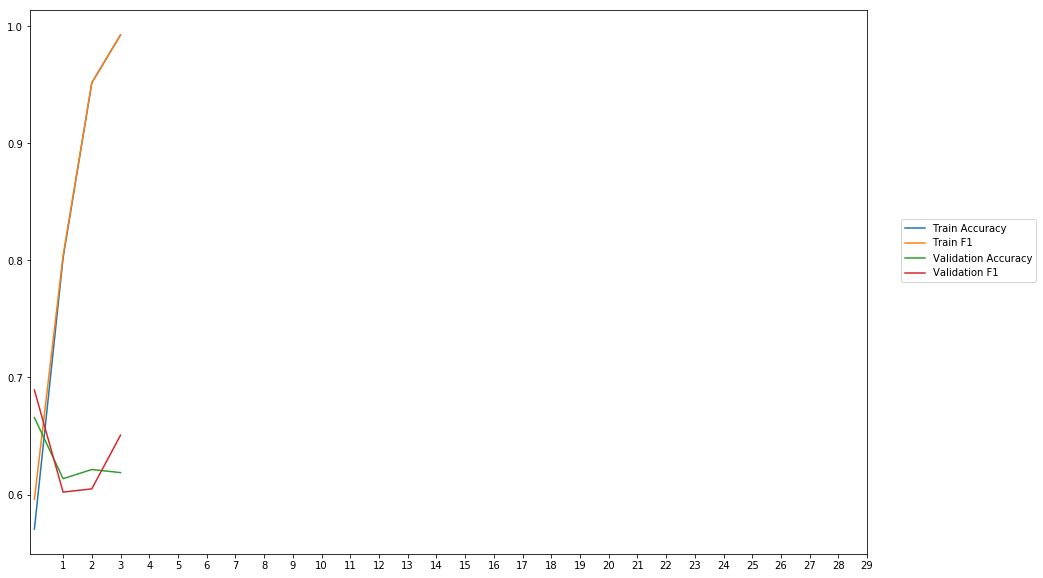

Average Accuracy: 62.99%
Average Precision: 62.28%
Average Recall: 65.58%
Average F1: 63.68%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6760 - acc: 0.5703 - precision: 0.5565 - recall: 0.6785 - f1_score: 0.6115 - val_loss: 0.6604 - val_acc: 0.5822 - val_precision: 0.5906 - val_recall: 0.5288 - val_f1_score: 0.5580
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4694 - acc: 0.8122 - precision: 0.8052 - recall: 0.8221 - f1_score: 0.8136 - val_loss: 0.6874 - val_acc: 0.5901 - val_precision: 0.6197 - val_recall: 0.4607 - val_f1_score: 0.5285
Epoch 3/30
3451/3451 [==============================] - ETA: 0s - loss: 0.1707 - acc: 0.9546 - precision: 0.9563 - recall: 0.9529 - f1_score: 0.954 - 3s 1ms/step - loss: 0.1699 - acc: 0.9548 - precision: 0.9562 - recall: 0.9529 - f1_score: 0.9546 - val_loss: 0.8192 - val_acc: 0.5822 - val_precision: 0.6000 - val_recall: 0.4869 - val_f1_score:

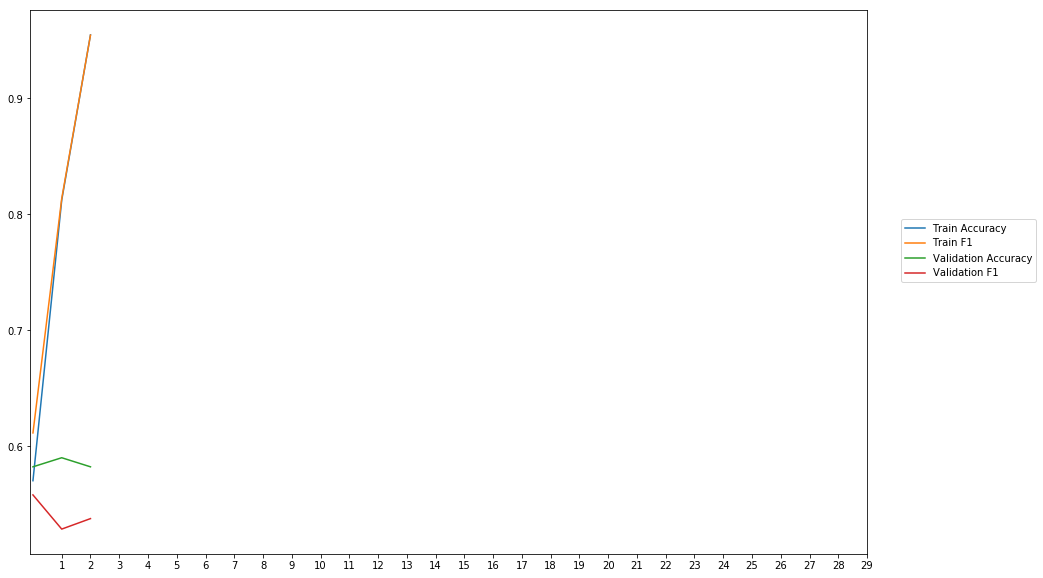

Average Accuracy: 58.49%
Average Precision: 60.35%
Average Recall: 49.21%
Average F1: 54.14%

-------Overallresults-------


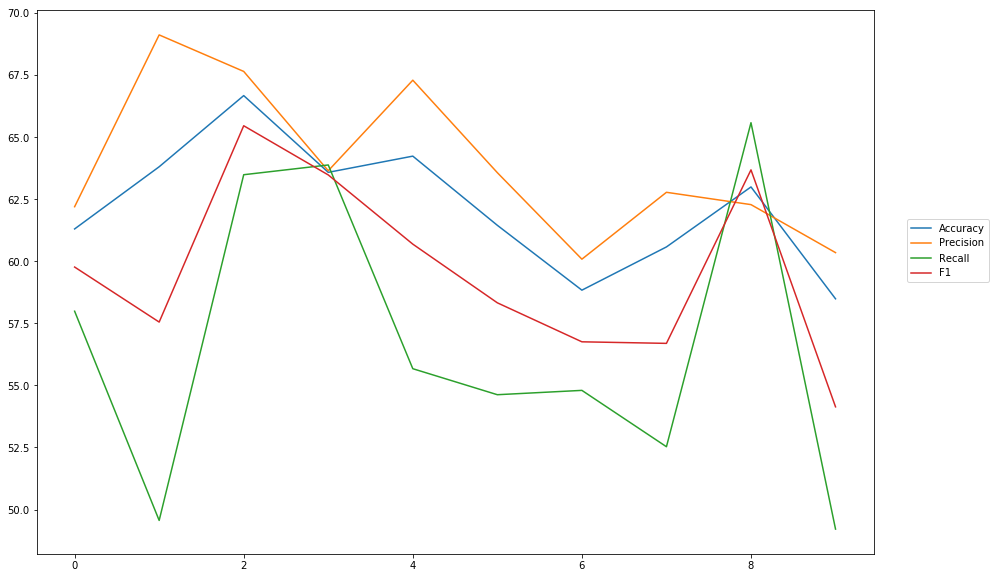

Accuracy: Mean = 62.19% (+/- 2.41%), Max = 66.67%, Min =  58.49%
Precision: Mean = 63.89% (+/- 2.95%), Max = 69.11%, Min =  60.08%
Recall: Mean = 56.73% (+/- 5.58%), Max = 65.58%, Min =  49.21%
F1: Mean = 59.65% (+/- 3.45%), Max = 65.45%, Min =  54.14%


In [11]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_loss_2', 'val_loss', 2)

Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6782 - acc: 0.5732 - precision: 0.5638 - recall: 0.6353 - f1_score: 0.5974 - val_loss: 0.6501 - val_acc: 0.6156 - val_precision: 0.6048 - val_recall: 0.6615 - val_f1_score: 0.6318
Epoch 2/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.4674 - acc: 0.8165 - precision: 0.8096 - recall: 0.8261 - f1_score: 0.8177 - val_loss: 0.6537 - val_acc: 0.6286 - val_precision: 0.6541 - val_recall: 0.5417 - val_f1_score: 0.5926
Epoch 3/30
3449/3449 [==============================] - 3s 1000us/step - loss: 0.1636 - acc: 0.9559 - precision: 0.9547 - recall: 0.9570 - f1_score: 0.9558 - val_loss: 0.7761 - val_acc: 0.5974 - val_precision: 0.6082 - val_recall: 0.5417 - val_f1_score: 0.5730
Epoch 4/30
3449/3449 [==============================] - 3s 991us/step - loss: 0.0427 - acc: 0.9901 - precision: 0.9884 - recall: 0.9919 - f1_score: 0.9901 - val_loss: 0.9308 - 

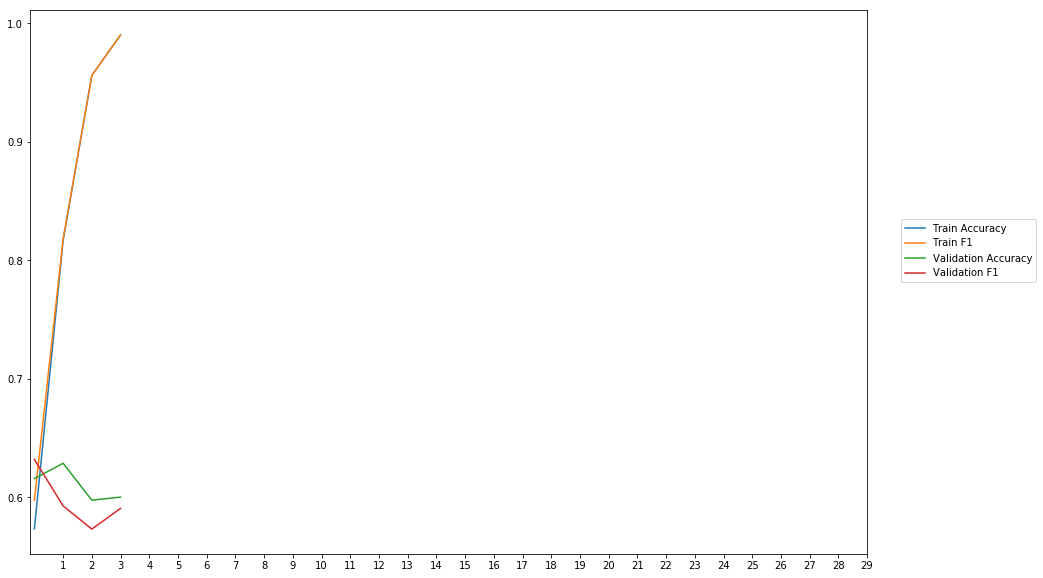

Average Accuracy: 61.04%
Average Precision: 61.76%
Average Recall: 58.07%
Average F1: 59.70%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6820 - acc: 0.5643 - precision: 0.5584 - recall: 0.6029 - f1_score: 0.5798 - val_loss: 0.6353 - val_acc: 0.6484 - val_precision: 0.6687 - val_recall: 0.5812 - val_f1_score: 0.6218
Epoch 2/30
3450/3450 [==============================] - 3s 990us/step - loss: 0.4810 - acc: 0.8133 - precision: 0.8081 - recall: 0.8203 - f1_score: 0.8142 - val_loss: 0.6422 - val_acc: 0.6484 - val_precision: 0.7121 - val_recall: 0.4921 - val_f1_score: 0.5820
Epoch 3/30
3450/3450 [==============================] - 3s 995us/step - loss: 0.1775 - acc: 0.9516 - precision: 0.9486 - recall: 0.9547 - f1_score: 0.9516 - val_loss: 0.7898 - val_acc: 0.6484 - val_precision: 0.7121 - val_recall: 0.4921 - val_f1_score: 0.5820
Epoch 4/30
3450/3450 [==============================] - 3s 990us/step - loss: 0.04

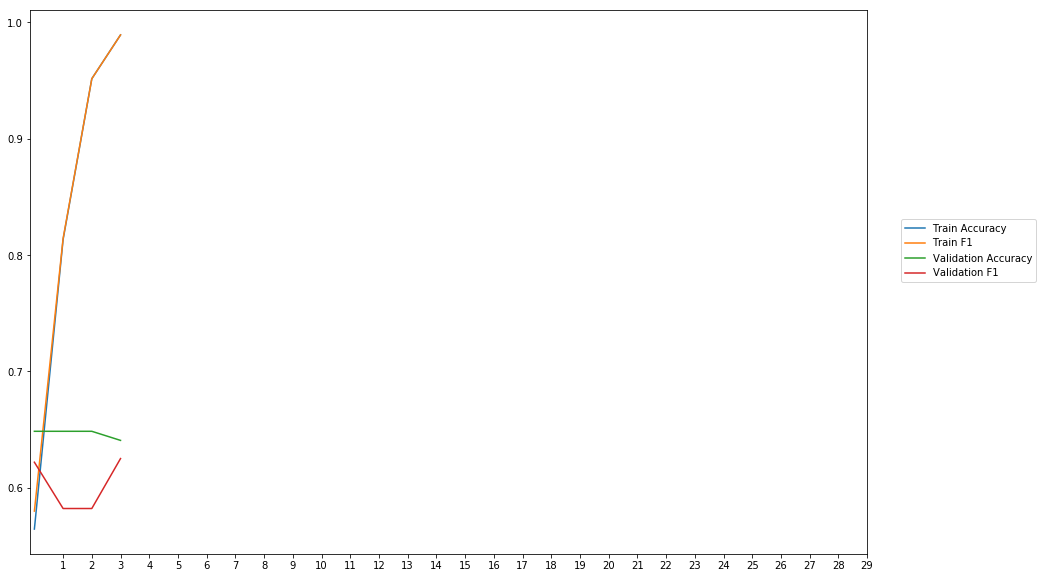

Average Accuracy: 64.65%
Average Precision: 68.57%
Average Recall: 54.19%
Average F1: 60.27%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6790 - acc: 0.5725 - precision: 0.5592 - recall: 0.6727 - f1_score: 0.6107 - val_loss: 0.6437 - val_acc: 0.6536 - val_precision: 0.6593 - val_recall: 0.6283 - val_f1_score: 0.6434
Epoch 2/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.4759 - acc: 0.8159 - precision: 0.8098 - recall: 0.8244 - f1_score: 0.8171 - val_loss: 0.6201 - val_acc: 0.6849 - val_precision: 0.7083 - val_recall: 0.6230 - val_f1_score: 0.6630
Epoch 3/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.1754 - acc: 0.9536 - precision: 0.9524 - recall: 0.9547 - f1_score: 0.9535 - val_loss: 0.7086 - val_acc: 0.6693 - val_precision: 0.6882 - val_recall: 0.6126 - val_f1_score: 0.6482
Epoch 4/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.0451 - a

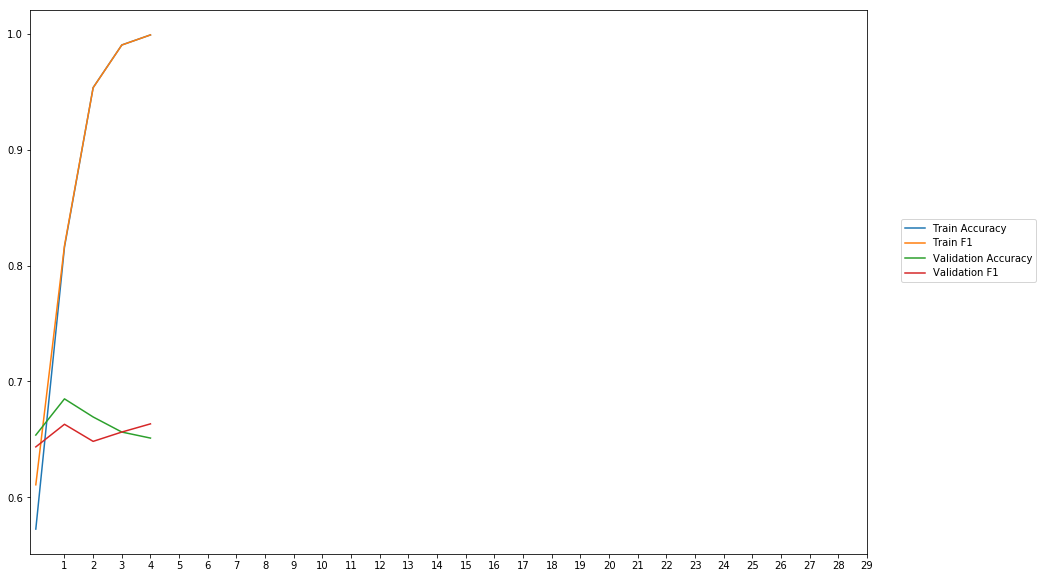

Average Accuracy: 66.30%
Average Precision: 66.93%
Average Recall: 64.29%
Average F1: 65.48%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6801 - acc: 0.5766 - precision: 0.5619 - recall: 0.6837 - f1_score: 0.6168 - val_loss: 0.6446 - val_acc: 0.6397 - val_precision: 0.6147 - val_recall: 0.7435 - val_f1_score: 0.6730
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4872 - acc: 0.8070 - precision: 0.7967 - recall: 0.8227 - f1_score: 0.8095 - val_loss: 0.6319 - val_acc: 0.6475 - val_precision: 0.6687 - val_recall: 0.5812 - val_f1_score: 0.6218
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1735 - acc: 0.9536 - precision: 0.9545 - recall: 0.9523 - f1_score: 0.9534 - val_loss: 0.7620 - val_acc: 0.6292 - val_precision: 0.6324 - val_recall: 0.6126 - val_f1_score: 0.6223
Epoch 4/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.0437 - a

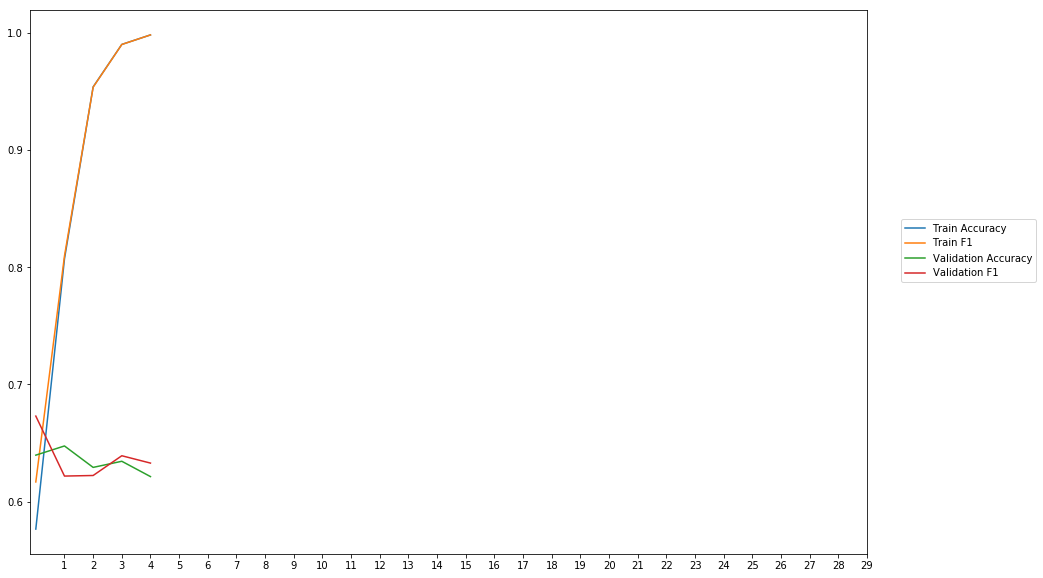

Average Accuracy: 63.45%
Average Precision: 63.16%
Average Recall: 64.82%
Average F1: 63.79%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6839 - acc: 0.5613 - precision: 0.5499 - recall: 0.6599 - f1_score: 0.5999 - val_loss: 0.6475 - val_acc: 0.6371 - val_precision: 0.6429 - val_recall: 0.6126 - val_f1_score: 0.6273
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4796 - acc: 0.8131 - precision: 0.8056 - recall: 0.8238 - f1_score: 0.8146 - val_loss: 0.6667 - val_acc: 0.6423 - val_precision: 0.6901 - val_recall: 0.5131 - val_f1_score: 0.5886
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1717 - acc: 0.9533 - precision: 0.9561 - recall: 0.9500 - f1_score: 0.9530 - val_loss: 0.8530 - val_acc: 0.6240 - val_precision: 0.6715 - val_recall: 0.4817 - val_f1_score: 0.5610
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0449 - a

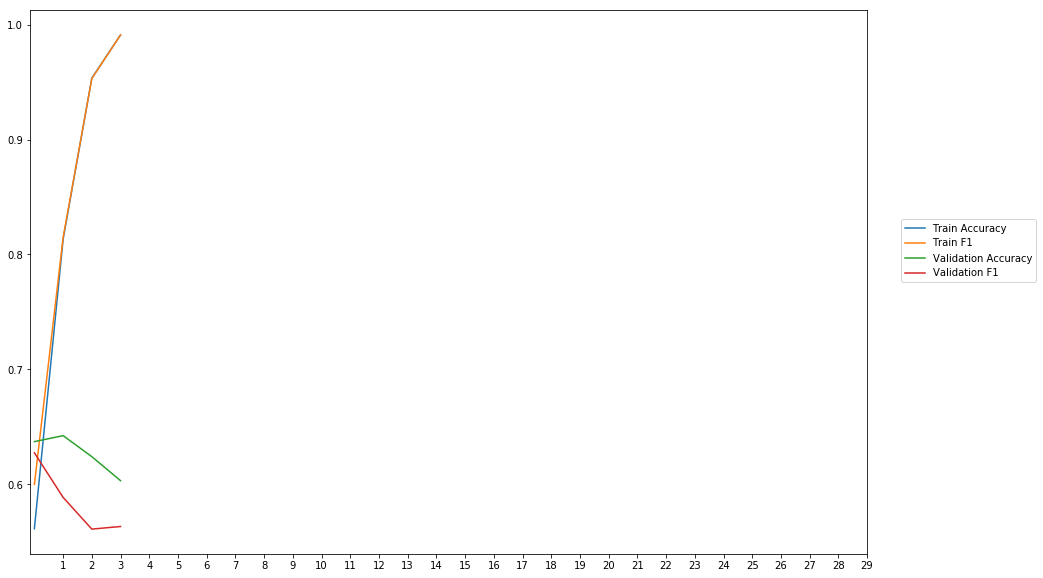

Average Accuracy: 62.66%
Average Precision: 65.72%
Average Recall: 53.01%
Average F1: 58.50%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6763 - acc: 0.5784 - precision: 0.5610 - recall: 0.7081 - f1_score: 0.6261 - val_loss: 0.6660 - val_acc: 0.6057 - val_precision: 0.5952 - val_recall: 0.6545 - val_f1_score: 0.6234
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4741 - acc: 0.8122 - precision: 0.8004 - recall: 0.8302 - f1_score: 0.8151 - val_loss: 0.6929 - val_acc: 0.6266 - val_precision: 0.6765 - val_recall: 0.4817 - val_f1_score: 0.5627
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1728 - acc: 0.9522 - precision: 0.9507 - recall: 0.9535 - f1_score: 0.9521 - val_loss: 0.8118 - val_acc: 0.6110 - val_precision: 0.6479 - val_recall: 0.4817 - val_f1_score: 0.5526
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0457 - a

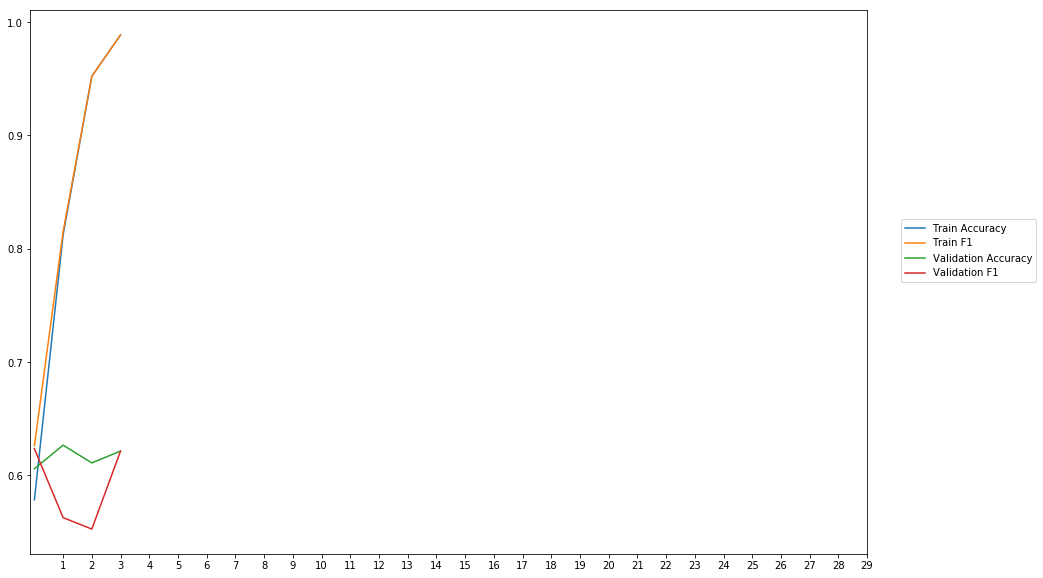

Average Accuracy: 61.62%
Average Precision: 63.48%
Average Recall: 56.02%
Average F1: 59.00%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6745 - acc: 0.5871 - precision: 0.5684 - recall: 0.7128 - f1_score: 0.6324 - val_loss: 0.6832 - val_acc: 0.5744 - val_precision: 0.5625 - val_recall: 0.6597 - val_f1_score: 0.6072
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4634 - acc: 0.8218 - precision: 0.8141 - recall: 0.8326 - f1_score: 0.8232 - val_loss: 0.7347 - val_acc: 0.6005 - val_precision: 0.6218 - val_recall: 0.5079 - val_f1_score: 0.5591
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1691 - acc: 0.9519 - precision: 0.9544 - recall: 0.9488 - f1_score: 0.9516 - val_loss: 0.9015 - val_acc: 0.6005 - val_precision: 0.6319 - val_recall: 0.4764 - val_f1_score: 0.5433
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0449 - a

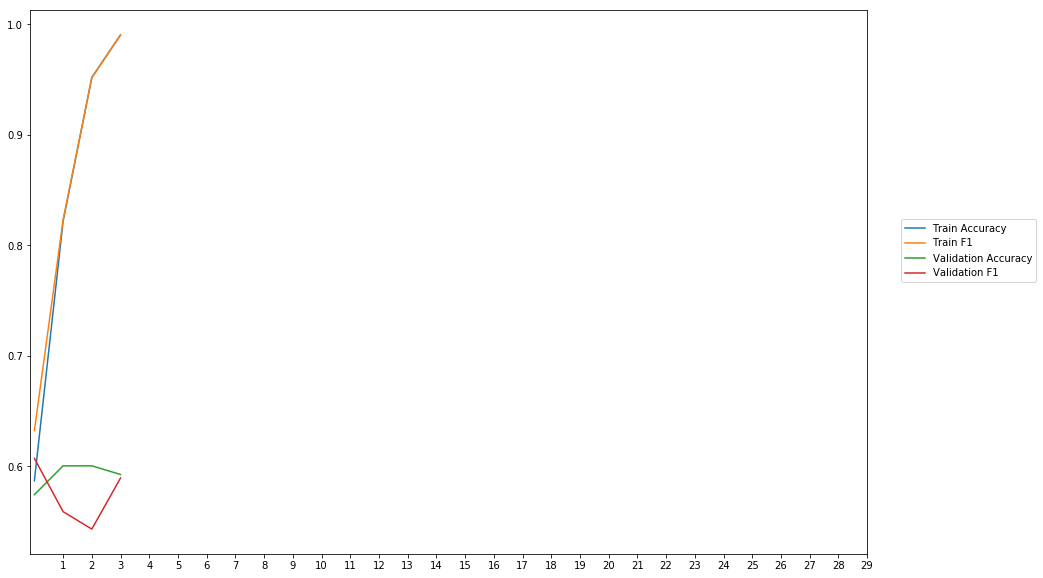

Average Accuracy: 59.20%
Average Precision: 60.22%
Average Recall: 55.76%
Average F1: 57.48%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6776 - acc: 0.5740 - precision: 0.5594 - recall: 0.6849 - f1_score: 0.6158 - val_loss: 0.6798 - val_acc: 0.6057 - val_precision: 0.6087 - val_recall: 0.5864 - val_f1_score: 0.5973
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4817 - acc: 0.8079 - precision: 0.7941 - recall: 0.8297 - f1_score: 0.8115 - val_loss: 0.7031 - val_acc: 0.5979 - val_precision: 0.6480 - val_recall: 0.4241 - val_f1_score: 0.5127
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1753 - acc: 0.9531 - precision: 0.9540 - recall: 0.9517 - f1_score: 0.9529 - val_loss: 0.7804 - val_acc: 0.6136 - val_precision: 0.6229 - val_recall: 0.5707 - val_f1_score: 0.5956
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0404 - a

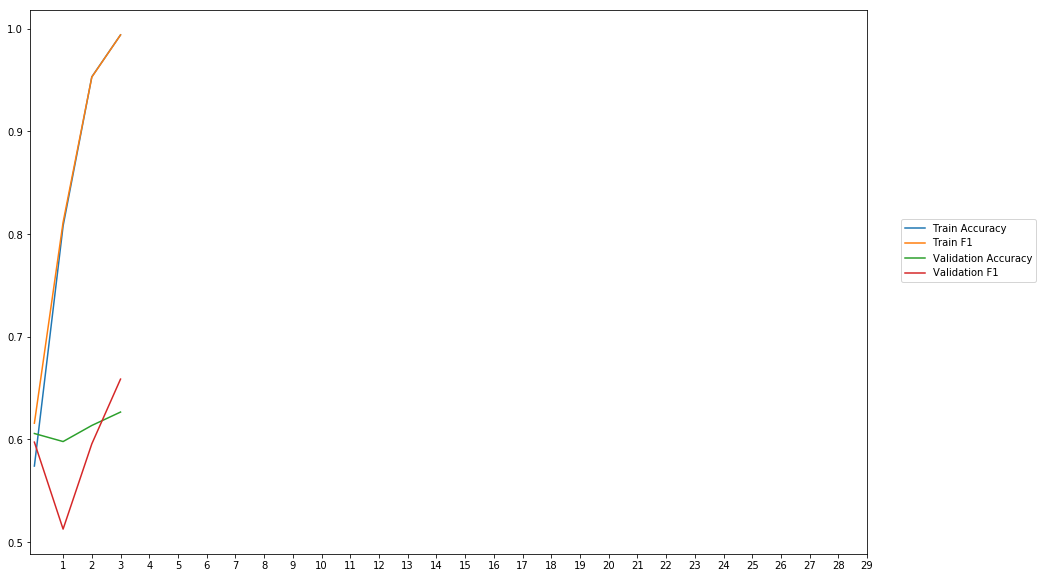

Average Accuracy: 61.10%
Average Precision: 62.12%
Average Recall: 57.59%
Average F1: 59.11%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6779 - acc: 0.5717 - precision: 0.5615 - recall: 0.6424 - f1_score: 0.5992 - val_loss: 0.6492 - val_acc: 0.6606 - val_precision: 0.6356 - val_recall: 0.7487 - val_f1_score: 0.6875
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4798 - acc: 0.8099 - precision: 0.8023 - recall: 0.8209 - f1_score: 0.8115 - val_loss: 0.6389 - val_acc: 0.6136 - val_precision: 0.6215 - val_recall: 0.5759 - val_f1_score: 0.5978
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1757 - acc: 0.9531 - precision: 0.9513 - recall: 0.9547 - f1_score: 0.9530 - val_loss: 0.7451 - val_acc: 0.6188 - val_precision: 0.6257 - val_recall: 0.5864 - val_f1_score: 0.6054
Epoch 4/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.0435 - a

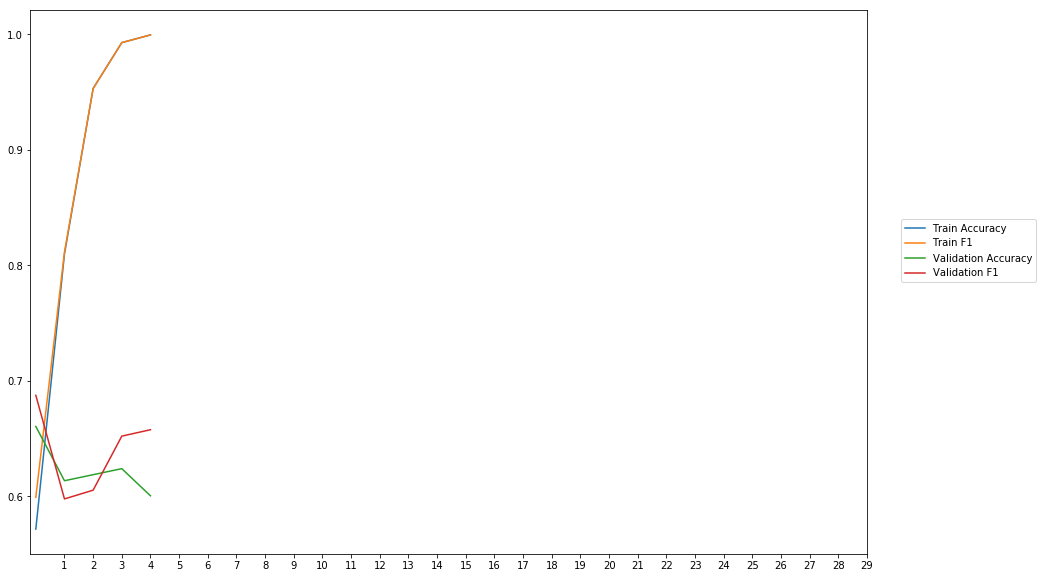

Average Accuracy: 62.35%
Average Precision: 61.25%
Average Recall: 67.75%
Average F1: 64.01%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6759 - acc: 0.5729 - precision: 0.5585 - recall: 0.6826 - f1_score: 0.6143 - val_loss: 0.6613 - val_acc: 0.5927 - val_precision: 0.6061 - val_recall: 0.5236 - val_f1_score: 0.5618
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4703 - acc: 0.8105 - precision: 0.8028 - recall: 0.8215 - f1_score: 0.8121 - val_loss: 0.6853 - val_acc: 0.5927 - val_precision: 0.6224 - val_recall: 0.4660 - val_f1_score: 0.5329
Epoch 3/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.1699 - acc: 0.9560 - precision: 0.9574 - recall: 0.9541 - f1_score: 0.9557 - val_loss: 0.8178 - val_acc: 0.5744 - val_precision: 0.5897 - val_recall: 0.4817 - val_f1_score: 0.5303
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0426 -

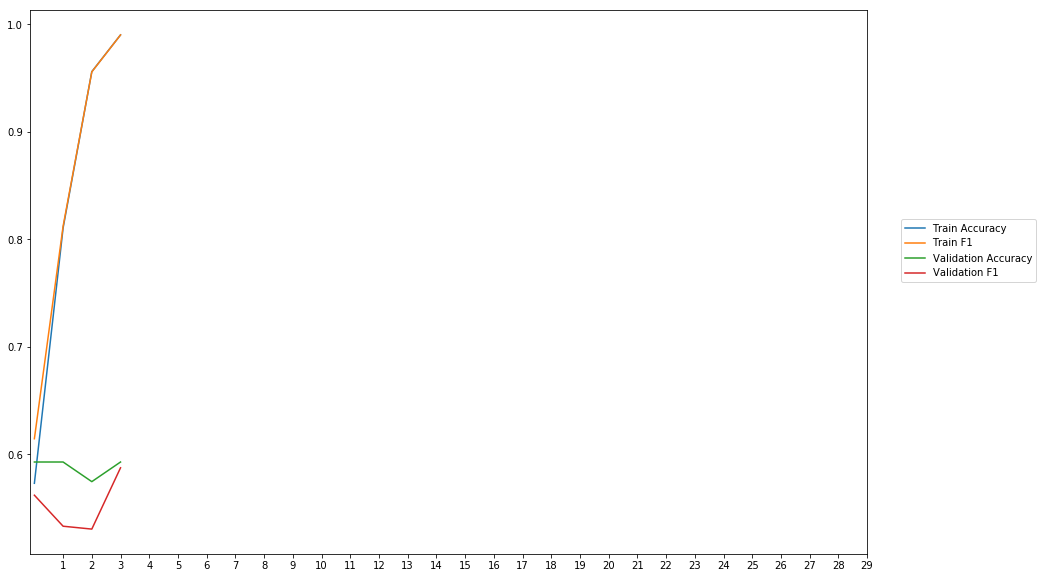

Average Accuracy: 58.81%
Average Precision: 60.29%
Average Recall: 51.31%
Average F1: 55.31%

-------Overallresults-------


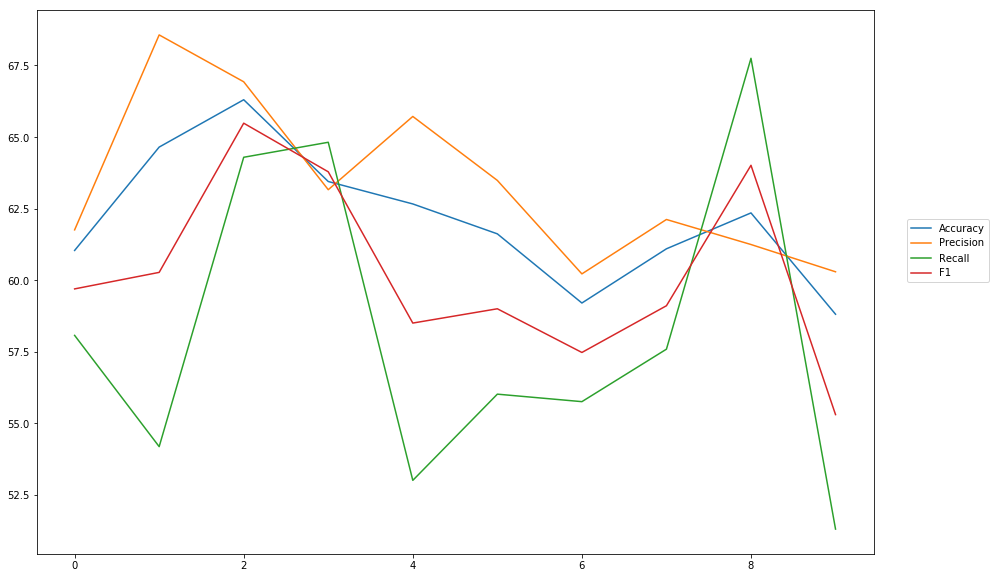

Accuracy: Mean = 62.12% (+/- 2.19%), Max = 66.30%, Min =  58.81%
Precision: Mean = 63.35% (+/- 2.71%), Max = 68.57%, Min =  60.22%
Recall: Mean = 58.28% (+/- 5.23%), Max = 67.75%, Min =  51.31%
F1: Mean = 60.26% (+/- 3.04%), Max = 65.48%, Min =  55.31%


In [12]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_loss_3', 'val_loss', 3)

Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6776 - acc: 0.5807 - precision: 0.5665 - recall: 0.6766 - f1_score: 0.6166 - val_loss: 0.6500 - val_acc: 0.6182 - val_precision: 0.6018 - val_recall: 0.6927 - val_f1_score: 0.6441
Epoch 2/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.4698 - acc: 0.8153 - precision: 0.8088 - recall: 0.8243 - f1_score: 0.8165 - val_loss: 0.6512 - val_acc: 0.6312 - val_precision: 0.6562 - val_recall: 0.5469 - val_f1_score: 0.5966
Epoch 3/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.1652 - acc: 0.9559 - precision: 0.9563 - recall: 0.9552 - f1_score: 0.9558 - val_loss: 0.7729 - val_acc: 0.5974 - val_precision: 0.6082 - val_recall: 0.5417 - val_f1_score: 0.5730

-----Fold 1--------


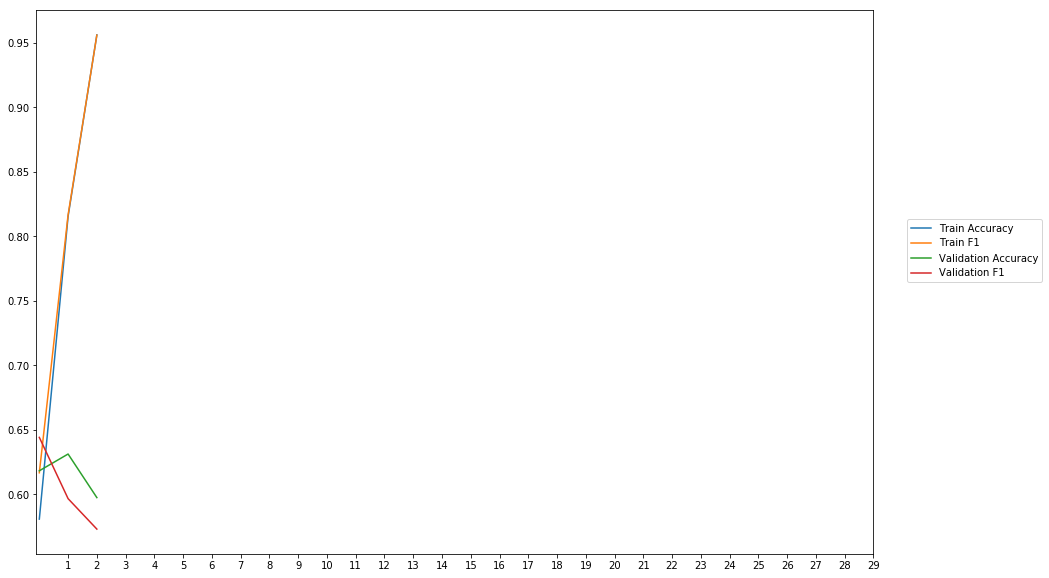

Average Accuracy: 61.56%
Average Precision: 62.21%
Average Recall: 59.37%
Average F1: 60.46%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6818 - acc: 0.5655 - precision: 0.5595 - recall: 0.6041 - f1_score: 0.5809 - val_loss: 0.6357 - val_acc: 0.6432 - val_precision: 0.6646 - val_recall: 0.5707 - val_f1_score: 0.6141
Epoch 2/30
3450/3450 [==============================] - 3s 999us/step - loss: 0.4806 - acc: 0.8154 - precision: 0.8085 - recall: 0.8250 - f1_score: 0.8167 - val_loss: 0.6465 - val_acc: 0.6380 - val_precision: 0.7031 - val_recall: 0.4712 - val_f1_score: 0.5643

-----Fold 2--------


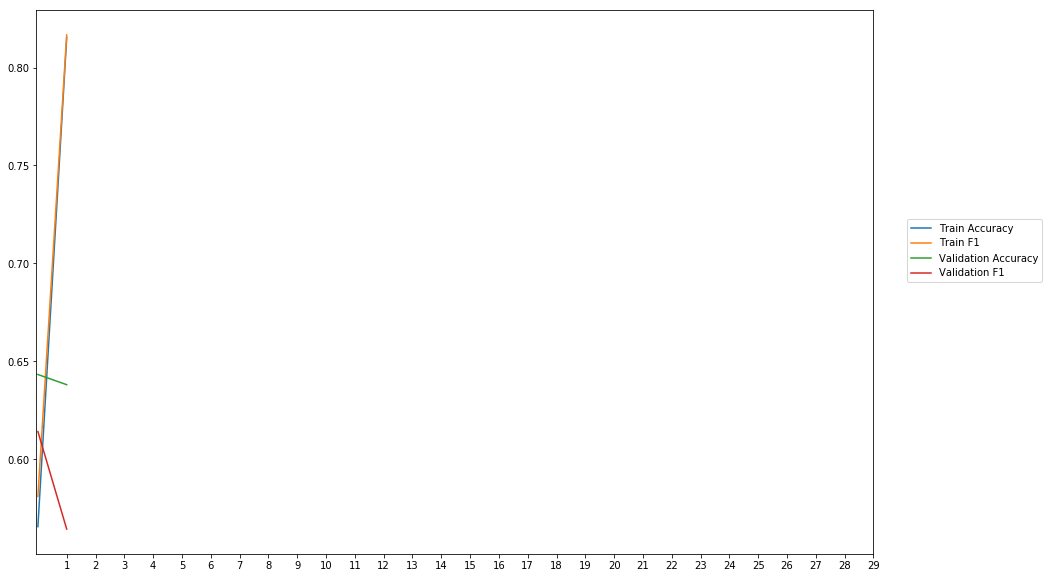

Average Accuracy: 64.06%
Average Precision: 68.39%
Average Recall: 52.09%
Average F1: 58.92%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6793 - acc: 0.5765 - precision: 0.5622 - recall: 0.6802 - f1_score: 0.6156 - val_loss: 0.6437 - val_acc: 0.6589 - val_precision: 0.6630 - val_recall: 0.6387 - val_f1_score: 0.6507
Epoch 2/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.4750 - acc: 0.8186 - precision: 0.8133 - recall: 0.8256 - f1_score: 0.8194 - val_loss: 0.6184 - val_acc: 0.6823 - val_precision: 0.6994 - val_recall: 0.6335 - val_f1_score: 0.6648
Epoch 3/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.1731 - acc: 0.9536 - precision: 0.9530 - recall: 0.9541 - f1_score: 0.9535 - val_loss: 0.7087 - val_acc: 0.6693 - val_precision: 0.6905 - val_recall: 0.6073 - val_f1_score: 0.6462

-----Fold 3--------


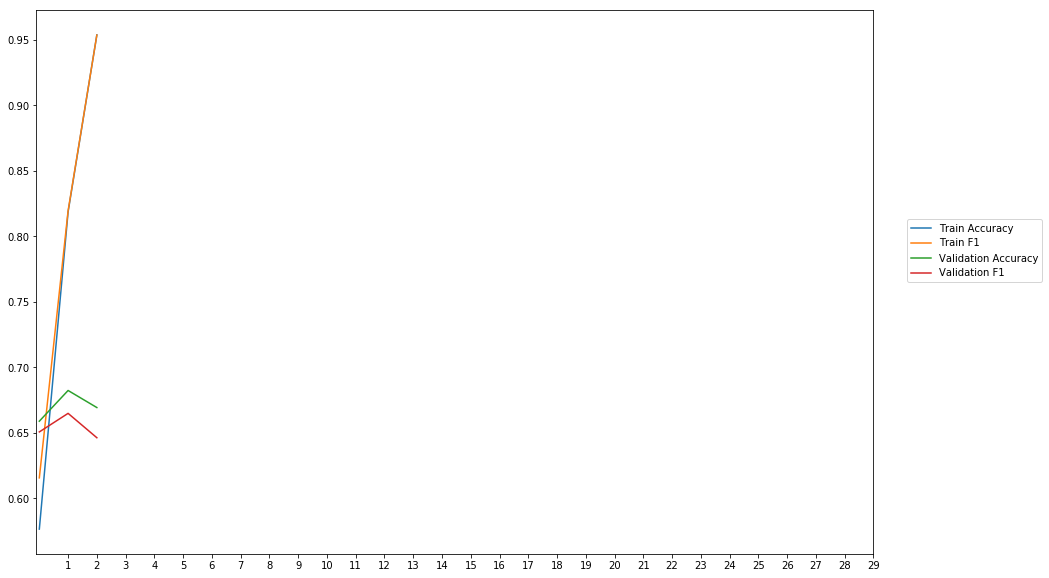

Average Accuracy: 67.01%
Average Precision: 68.43%
Average Recall: 62.65%
Average F1: 65.39%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6799 - acc: 0.5772 - precision: 0.5627 - recall: 0.6808 - f1_score: 0.6162 - val_loss: 0.6442 - val_acc: 0.6371 - val_precision: 0.6130 - val_recall: 0.7382 - val_f1_score: 0.6698
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4865 - acc: 0.8041 - precision: 0.7963 - recall: 0.8157 - f1_score: 0.8059 - val_loss: 0.6331 - val_acc: 0.6423 - val_precision: 0.6687 - val_recall: 0.5602 - val_f1_score: 0.6097
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1741 - acc: 0.9542 - precision: 0.9557 - recall: 0.9523 - f1_score: 0.9540 - val_loss: 0.7594 - val_acc: 0.6345 - val_precision: 0.6364 - val_recall: 0.6230 - val_f1_score: 0.6296

-----Fold 4--------


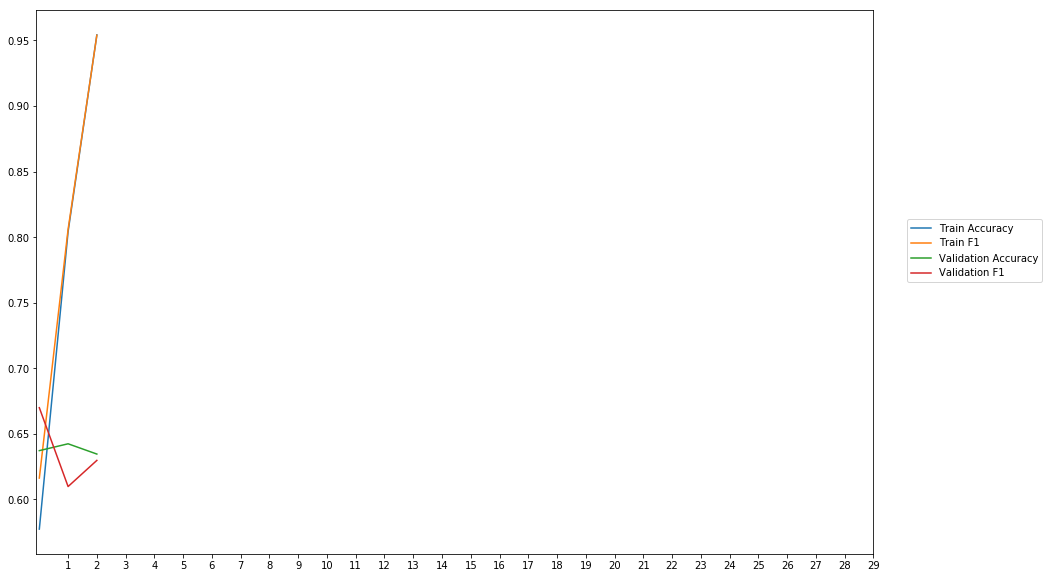

Average Accuracy: 63.79%
Average Precision: 63.94%
Average Recall: 64.05%
Average F1: 63.64%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6838 - acc: 0.5653 - precision: 0.5534 - recall: 0.6622 - f1_score: 0.6030 - val_loss: 0.6471 - val_acc: 0.6423 - val_precision: 0.6421 - val_recall: 0.6387 - val_f1_score: 0.6404
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4796 - acc: 0.8163 - precision: 0.8114 - recall: 0.8227 - f1_score: 0.8170 - val_loss: 0.6639 - val_acc: 0.6475 - val_precision: 0.6972 - val_recall: 0.5183 - val_f1_score: 0.5946
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1716 - acc: 0.9536 - precision: 0.9561 - recall: 0.9506 - f1_score: 0.9534 - val_loss: 0.8576 - val_acc: 0.6240 - val_precision: 0.6715 - val_recall: 0.4817 - val_f1_score: 0.5610

-----Fold 5--------


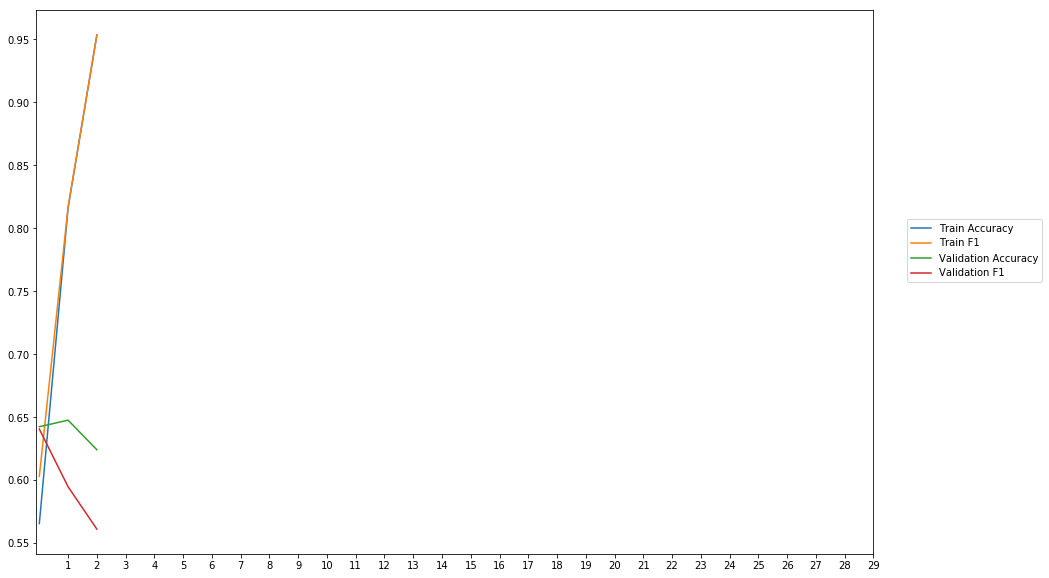

Average Accuracy: 63.79%
Average Precision: 67.03%
Average Recall: 54.62%
Average F1: 59.87%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6762 - acc: 0.5778 - precision: 0.5601 - recall: 0.7122 - f1_score: 0.6271 - val_loss: 0.6659 - val_acc: 0.6084 - val_precision: 0.5972 - val_recall: 0.6597 - val_f1_score: 0.6269
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4757 - acc: 0.8111 - precision: 0.7997 - recall: 0.8285 - f1_score: 0.8138 - val_loss: 0.6820 - val_acc: 0.6214 - val_precision: 0.6575 - val_recall: 0.5026 - val_f1_score: 0.5697
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1741 - acc: 0.9525 - precision: 0.9513 - recall: 0.9535 - f1_score: 0.9524 - val_loss: 0.8133 - val_acc: 0.6136 - val_precision: 0.6503 - val_recall: 0.4869 - val_f1_score: 0.5569

-----Fold 6--------


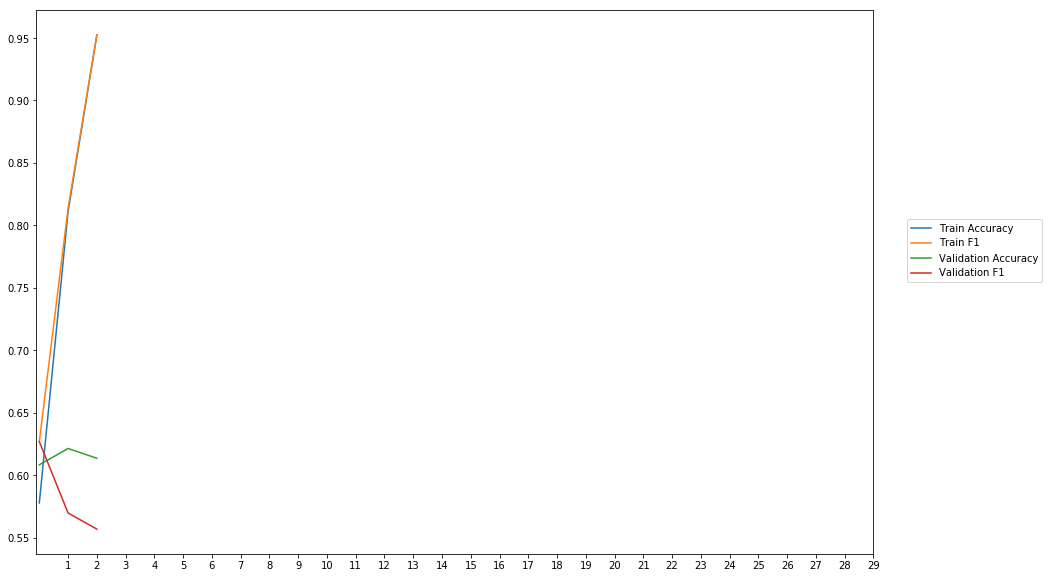

Average Accuracy: 61.44%
Average Precision: 63.50%
Average Recall: 54.97%
Average F1: 58.45%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6743 - acc: 0.5839 - precision: 0.5653 - recall: 0.7151 - f1_score: 0.6314 - val_loss: 0.6826 - val_acc: 0.5718 - val_precision: 0.5605 - val_recall: 0.6545 - val_f1_score: 0.6039
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4651 - acc: 0.8174 - precision: 0.8093 - recall: 0.8291 - f1_score: 0.8191 - val_loss: 0.7299 - val_acc: 0.6005 - val_precision: 0.6187 - val_recall: 0.5183 - val_f1_score: 0.5641
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1704 - acc: 0.9504 - precision: 0.9521 - recall: 0.9483 - f1_score: 0.9502 - val_loss: 0.9040 - val_acc: 0.5953 - val_precision: 0.6286 - val_recall: 0.4607 - val_f1_score: 0.5317

-----Fold 7--------


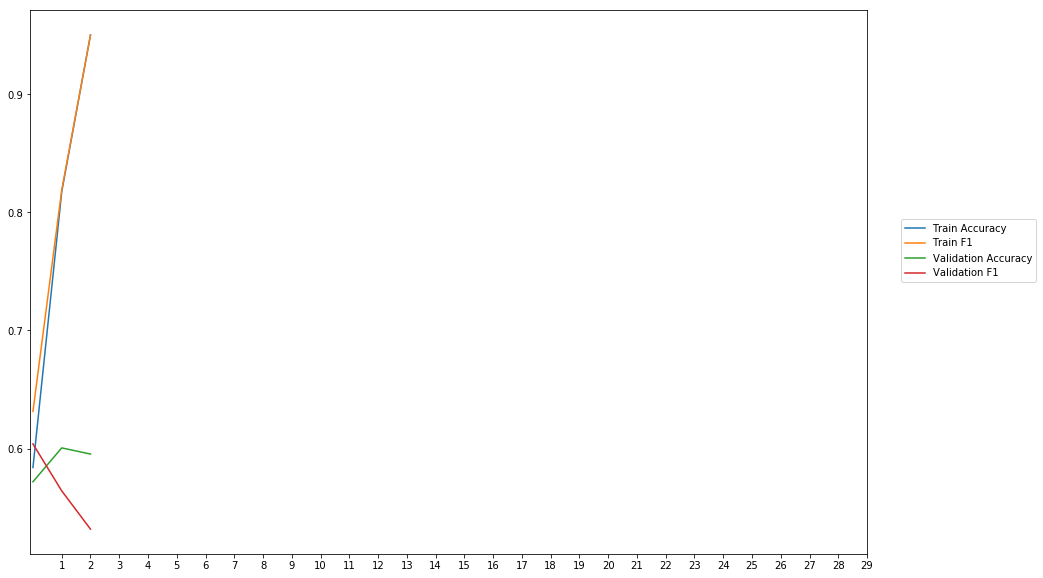

Average Accuracy: 58.92%
Average Precision: 60.26%
Average Recall: 54.45%
Average F1: 56.66%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6782 - acc: 0.5735 - precision: 0.5589 - recall: 0.6843 - f1_score: 0.6153 - val_loss: 0.6805 - val_acc: 0.6162 - val_precision: 0.6310 - val_recall: 0.5550 - val_f1_score: 0.5905
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4815 - acc: 0.8105 - precision: 0.7988 - recall: 0.8285 - f1_score: 0.8134 - val_loss: 0.7027 - val_acc: 0.5979 - val_precision: 0.6457 - val_recall: 0.4293 - val_f1_score: 0.5157

-----Fold 8--------


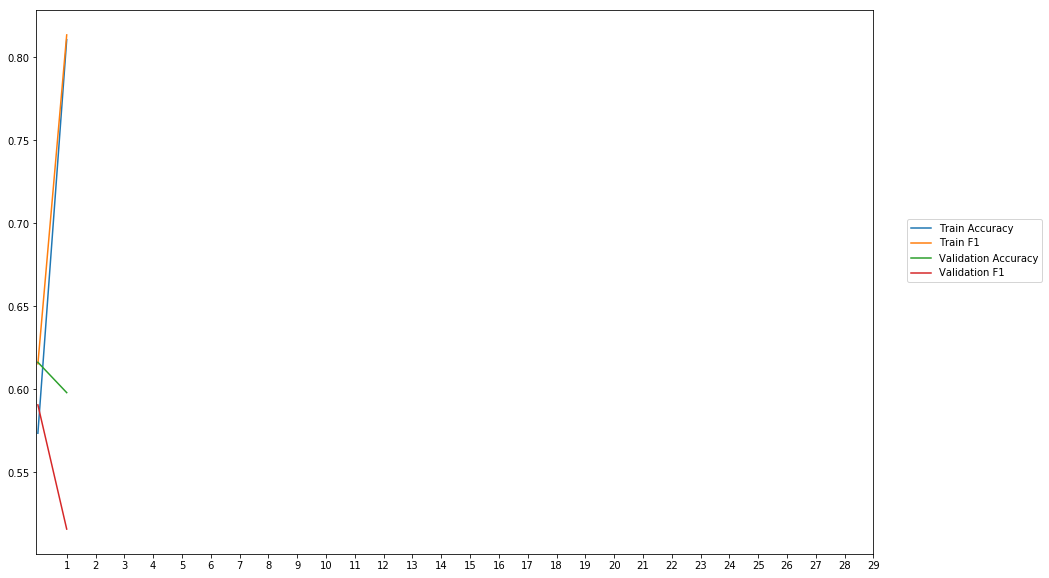

Average Accuracy: 60.70%
Average Precision: 63.83%
Average Recall: 49.21%
Average F1: 55.31%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6781 - acc: 0.5723 - precision: 0.5620 - recall: 0.6430 - f1_score: 0.5998 - val_loss: 0.6494 - val_acc: 0.6580 - val_precision: 0.6389 - val_recall: 0.7225 - val_f1_score: 0.6781
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4781 - acc: 0.8105 - precision: 0.8049 - recall: 0.8180 - f1_score: 0.8114 - val_loss: 0.6394 - val_acc: 0.6084 - val_precision: 0.6145 - val_recall: 0.5759 - val_f1_score: 0.5946

-----Fold 9--------


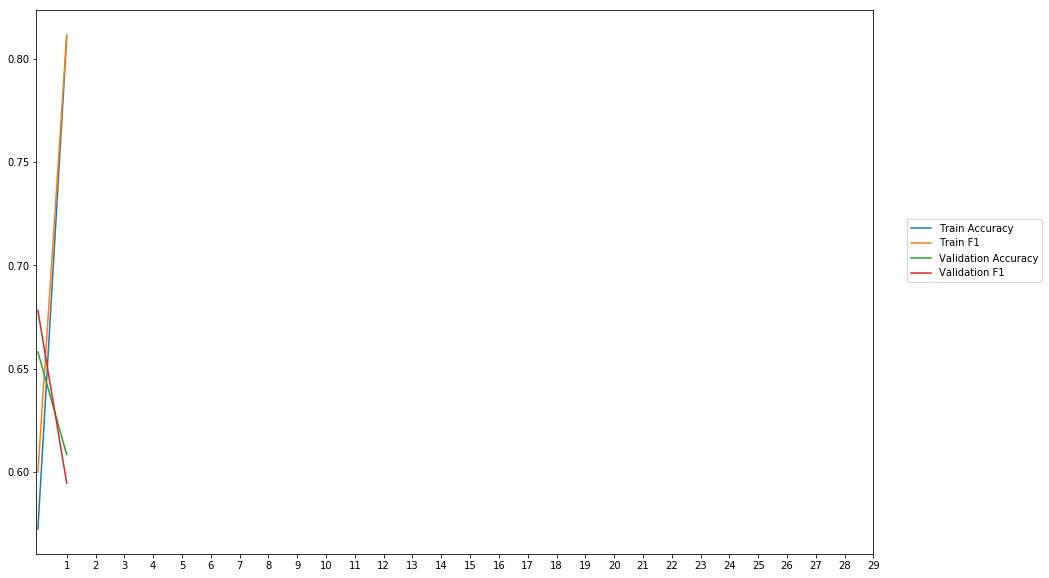

Average Accuracy: 63.32%
Average Precision: 62.67%
Average Recall: 64.92%
Average F1: 63.64%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6770 - acc: 0.5703 - precision: 0.5581 - recall: 0.6616 - f1_score: 0.6055 - val_loss: 0.6618 - val_acc: 0.5796 - val_precision: 0.5926 - val_recall: 0.5026 - val_f1_score: 0.5439
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4687 - acc: 0.8114 - precision: 0.8039 - recall: 0.8221 - f1_score: 0.8129 - val_loss: 0.6876 - val_acc: 0.5822 - val_precision: 0.6099 - val_recall: 0.4503 - val_f1_score: 0.5181
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1672 - acc: 0.9580 - precision: 0.9592 - recall: 0.9564 - f1_score: 0.9578 - val_loss: 0.8264 - val_acc: 0.5849 - val_precision: 0.6053 - val_recall: 0.4817 - val_f1_score: 0.5364
Epoch 4/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.0420 - a

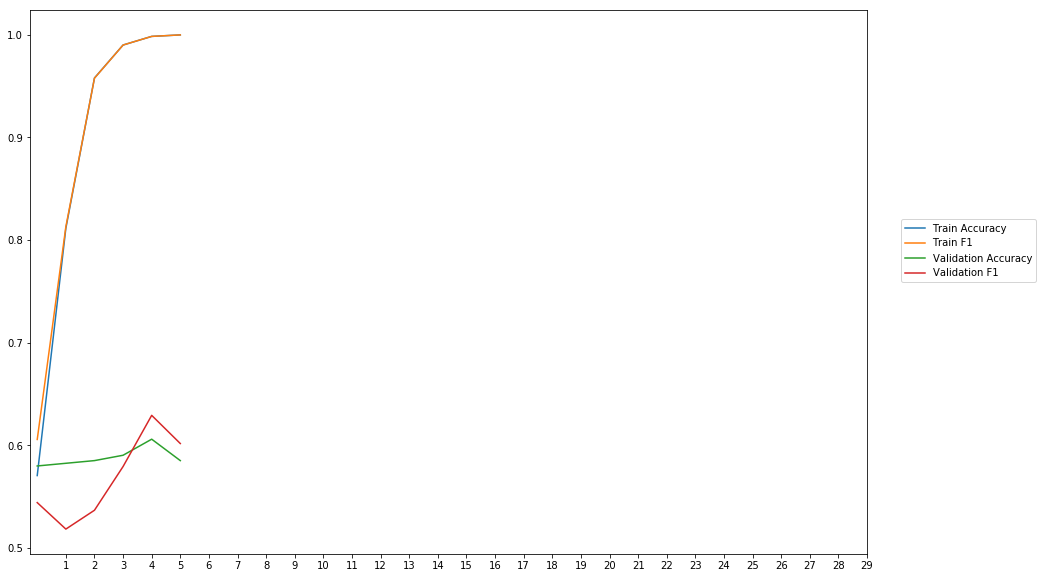

Average Accuracy: 58.79%
Average Precision: 59.51%
Average Recall: 54.97%
Average F1: 56.80%

-------Overallresults-------


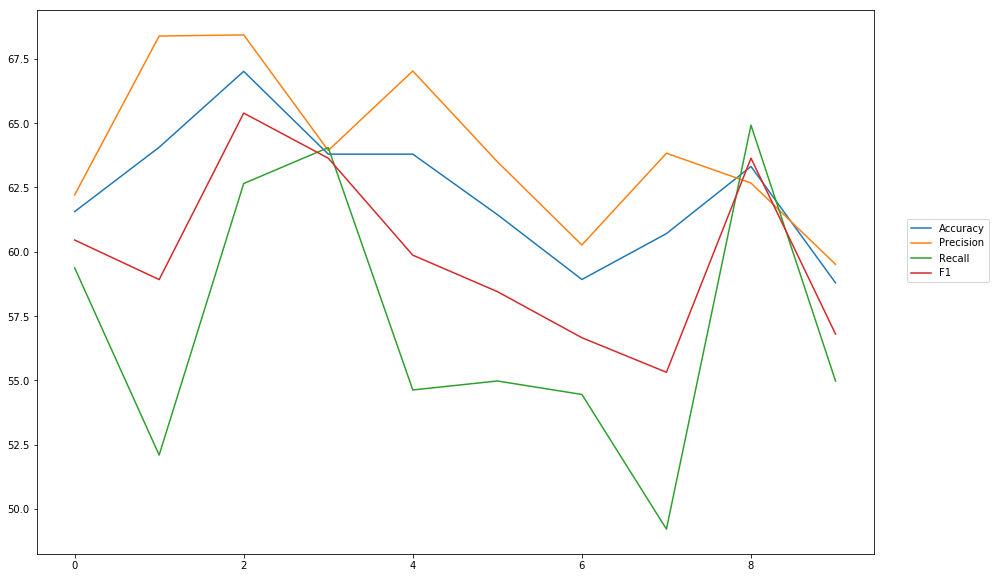

Accuracy: Mean = 62.34% (+/- 2.42%), Max = 67.01%, Min =  58.79%
Precision: Mean = 63.98% (+/- 2.96%), Max = 68.43%, Min =  59.51%
Recall: Mean = 57.13% (+/- 5.05%), Max = 64.92%, Min =  49.21%
F1: Mean = 59.91% (+/- 3.20%), Max = 65.39%, Min =  55.31%


In [13]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_acc_0', 'val_acc', 0)

Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6779 - acc: 0.5735 - precision: 0.5638 - recall: 0.6376 - f1_score: 0.5984 - val_loss: 0.6505 - val_acc: 0.6130 - val_precision: 0.5973 - val_recall: 0.6875 - val_f1_score: 0.6392
Epoch 2/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.4687 - acc: 0.8179 - precision: 0.8098 - recall: 0.8296 - f1_score: 0.8195 - val_loss: 0.6535 - val_acc: 0.6364 - val_precision: 0.6646 - val_recall: 0.5469 - val_f1_score: 0.6000
Epoch 3/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.1642 - acc: 0.9562 - precision: 0.9569 - recall: 0.9552 - f1_score: 0.9560 - val_loss: 0.7753 - val_acc: 0.6000 - val_precision: 0.6118 - val_recall: 0.5417 - val_f1_score: 0.5746

-----Fold 1--------


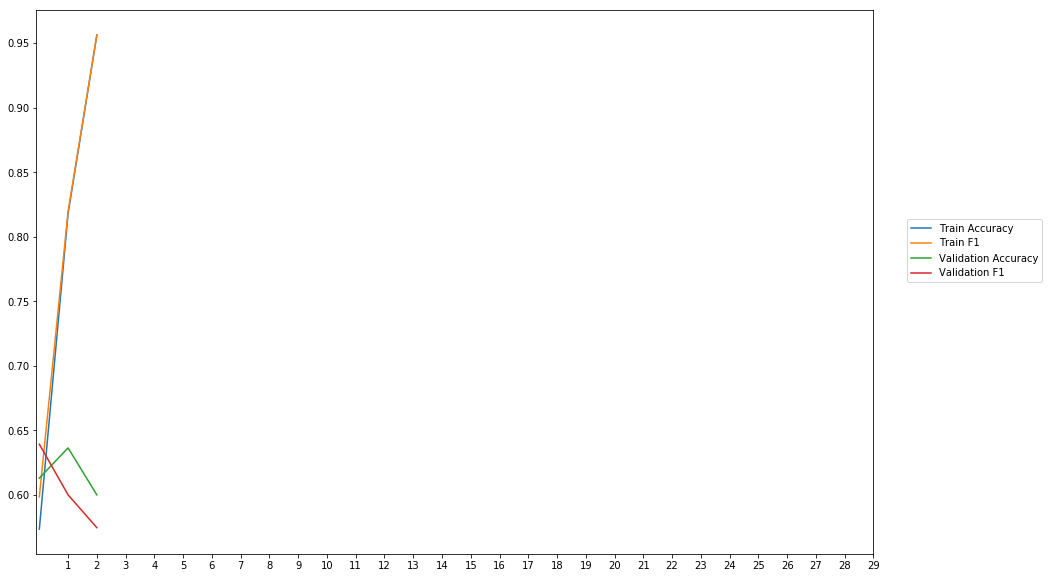

Average Accuracy: 61.65%
Average Precision: 62.45%
Average Recall: 59.20%
Average F1: 60.46%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6820 - acc: 0.5603 - precision: 0.5545 - recall: 0.6000 - f1_score: 0.5764 - val_loss: 0.6356 - val_acc: 0.6458 - val_precision: 0.6730 - val_recall: 0.5602 - val_f1_score: 0.6114
Epoch 2/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.4797 - acc: 0.8148 - precision: 0.8076 - recall: 0.8250 - f1_score: 0.8162 - val_loss: 0.6432 - val_acc: 0.6484 - val_precision: 0.7121 - val_recall: 0.4921 - val_f1_score: 0.5820
Epoch 3/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.1766 - acc: 0.9522 - precision: 0.9492 - recall: 0.9552 - f1_score: 0.9522 - val_loss: 0.8079 - val_acc: 0.6354 - val_precision: 0.7008 - val_recall: 0.4660 - val_f1_score: 0.5597

-----Fold 2--------


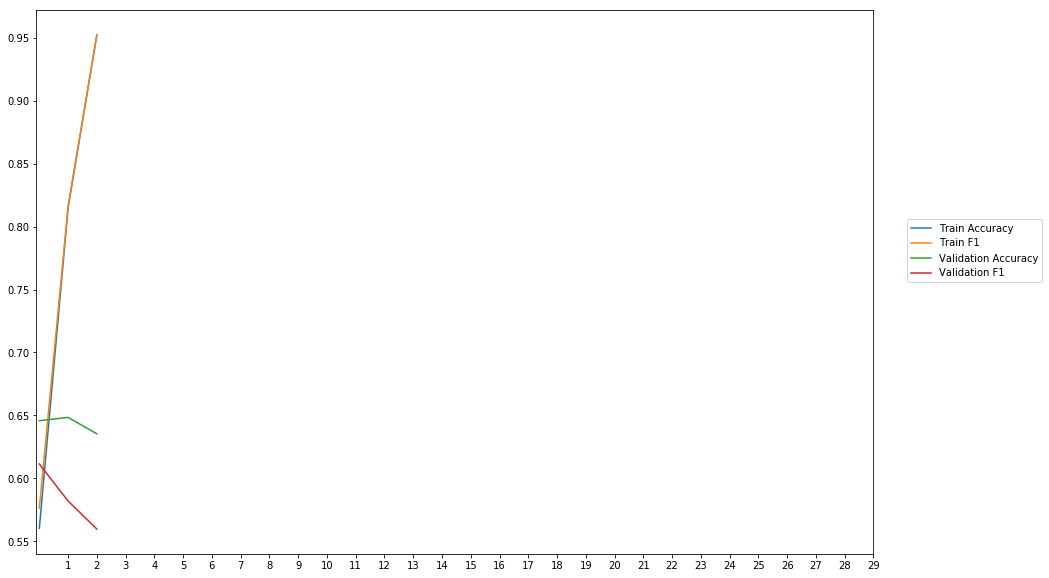

Average Accuracy: 64.32%
Average Precision: 69.53%
Average Recall: 50.61%
Average F1: 58.44%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6794 - acc: 0.5754 - precision: 0.5613 - recall: 0.6785 - f1_score: 0.6144 - val_loss: 0.6437 - val_acc: 0.6510 - val_precision: 0.6686 - val_recall: 0.5916 - val_f1_score: 0.6278
Epoch 2/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.4736 - acc: 0.8171 - precision: 0.8106 - recall: 0.8262 - f1_score: 0.8183 - val_loss: 0.6179 - val_acc: 0.6797 - val_precision: 0.6932 - val_recall: 0.6387 - val_f1_score: 0.6649
Epoch 3/30
3450/3450 [==============================] - 3s 995us/step - loss: 0.1726 - acc: 0.9530 - precision: 0.9513 - recall: 0.9547 - f1_score: 0.9530 - val_loss: 0.7071 - val_acc: 0.6745 - val_precision: 0.6941 - val_recall: 0.6178 - val_f1_score: 0.6537

-----Fold 3--------


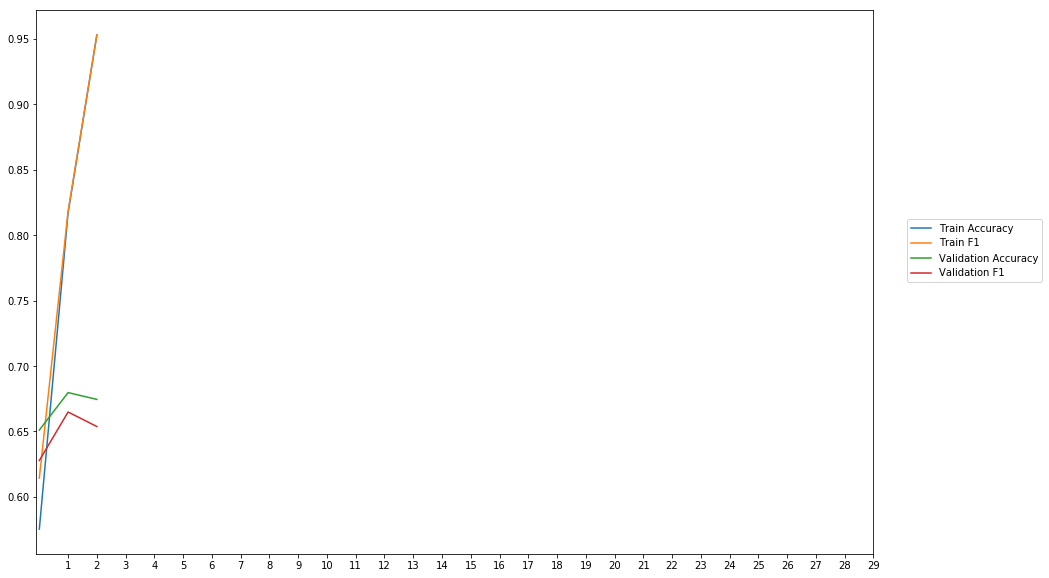

Average Accuracy: 66.84%
Average Precision: 68.53%
Average Recall: 61.61%
Average F1: 64.88%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6799 - acc: 0.5781 - precision: 0.5633 - recall: 0.6831 - f1_score: 0.6174 - val_loss: 0.6444 - val_acc: 0.6371 - val_precision: 0.6140 - val_recall: 0.7330 - val_f1_score: 0.6683
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4860 - acc: 0.8067 - precision: 0.7983 - recall: 0.8192 - f1_score: 0.8086 - val_loss: 0.6333 - val_acc: 0.6475 - val_precision: 0.6707 - val_recall: 0.5759 - val_f1_score: 0.6197
Epoch 3/30
3451/3451 [==============================] - 3s 999us/step - loss: 0.1725 - acc: 0.9551 - precision: 0.9552 - recall: 0.9547 - f1_score: 0.9549 - val_loss: 0.7620 - val_acc: 0.6319 - val_precision: 0.6344 - val_recall: 0.6178 - val_f1_score: 0.6260

-----Fold 4--------


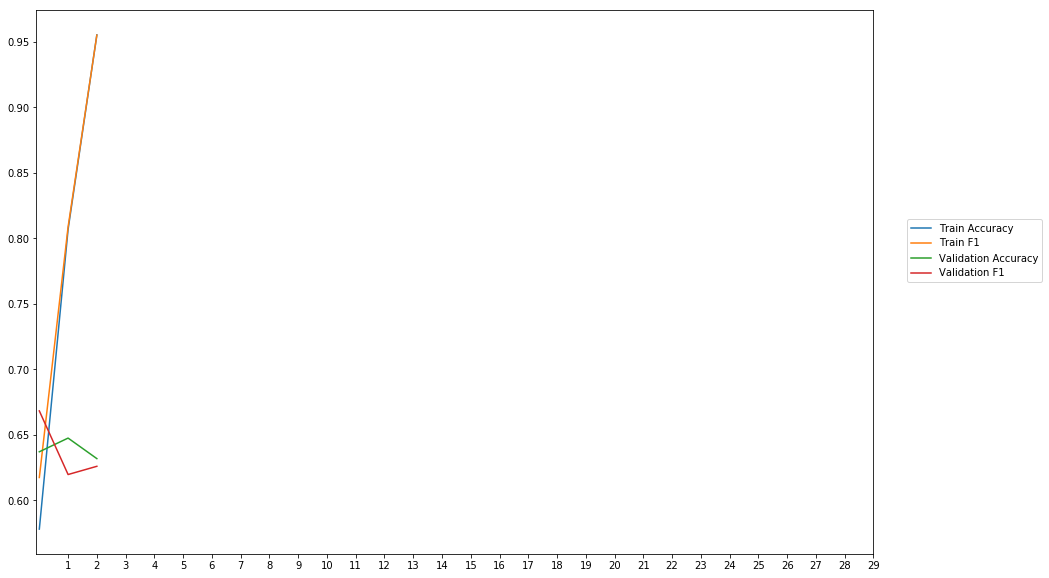

Average Accuracy: 63.88%
Average Precision: 63.97%
Average Recall: 64.22%
Average F1: 63.80%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6838 - acc: 0.5622 - precision: 0.5504 - recall: 0.6640 - f1_score: 0.6018 - val_loss: 0.6485 - val_acc: 0.6371 - val_precision: 0.6625 - val_recall: 0.5550 - val_f1_score: 0.6040
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4806 - acc: 0.8096 - precision: 0.8011 - recall: 0.8221 - f1_score: 0.8115 - val_loss: 0.6649 - val_acc: 0.6423 - val_precision: 0.6875 - val_recall: 0.5183 - val_f1_score: 0.5910
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1729 - acc: 0.9528 - precision: 0.9545 - recall: 0.9506 - f1_score: 0.9525 - val_loss: 0.8514 - val_acc: 0.6266 - val_precision: 0.6739 - val_recall: 0.4869 - val_f1_score: 0.5653

-----Fold 5--------


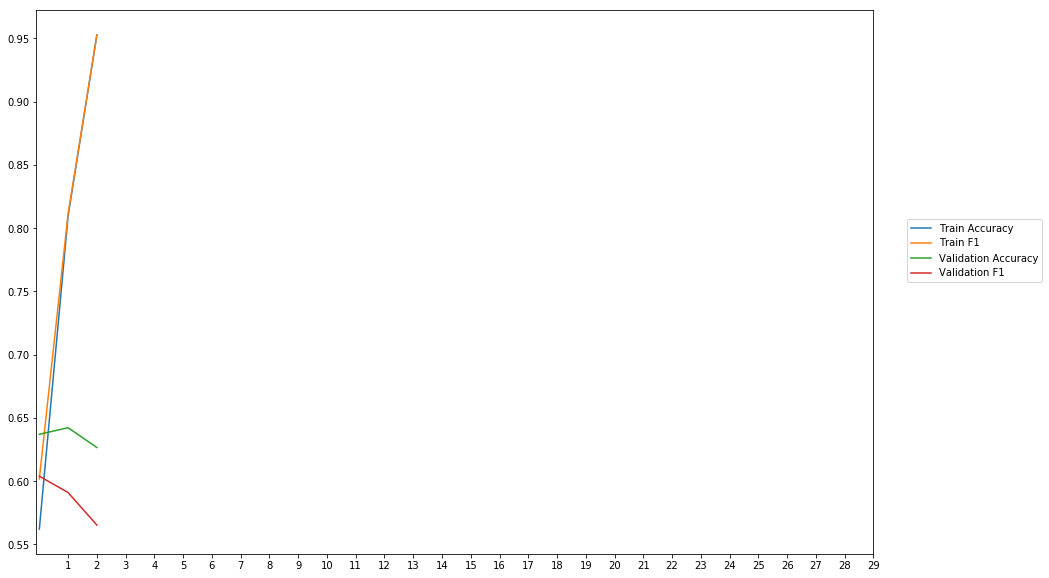

Average Accuracy: 63.53%
Average Precision: 67.46%
Average Recall: 52.01%
Average F1: 58.68%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6769 - acc: 0.5761 - precision: 0.5601 - recall: 0.6965 - f1_score: 0.6209 - val_loss: 0.6657 - val_acc: 0.6162 - val_precision: 0.6089 - val_recall: 0.6440 - val_f1_score: 0.6260
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4724 - acc: 0.8143 - precision: 0.8022 - recall: 0.8326 - f1_score: 0.8171 - val_loss: 0.6887 - val_acc: 0.6188 - val_precision: 0.6552 - val_recall: 0.4974 - val_f1_score: 0.5655
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1717 - acc: 0.9513 - precision: 0.9486 - recall: 0.9541 - f1_score: 0.9513 - val_loss: 0.8163 - val_acc: 0.6084 - val_precision: 0.6434 - val_recall: 0.4817 - val_f1_score: 0.5509

-----Fold 6--------


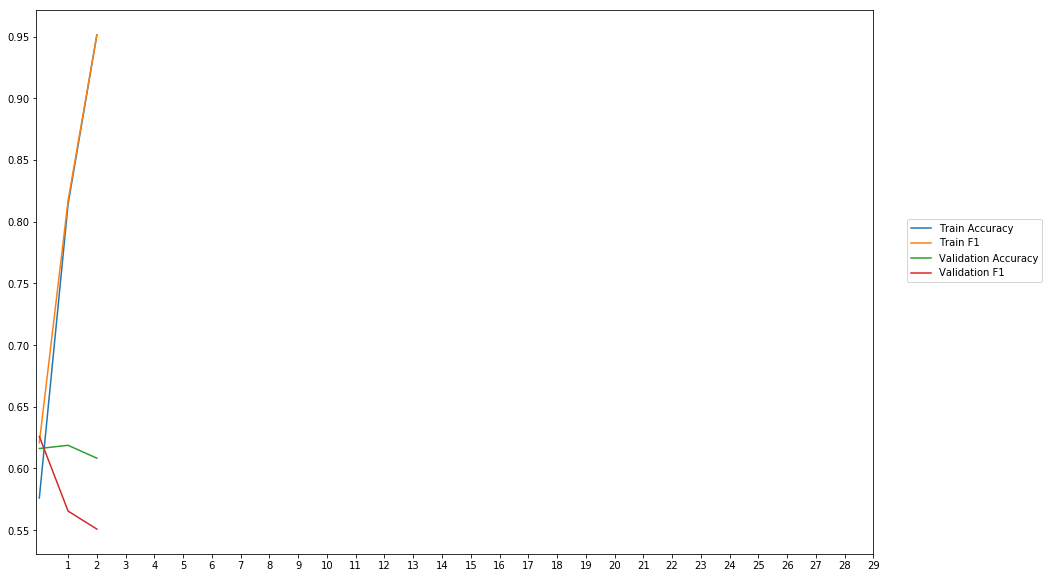

Average Accuracy: 61.44%
Average Precision: 63.58%
Average Recall: 54.10%
Average F1: 58.08%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6743 - acc: 0.5842 - precision: 0.5654 - recall: 0.7163 - f1_score: 0.6320 - val_loss: 0.6822 - val_acc: 0.5744 - val_precision: 0.5598 - val_recall: 0.6859 - val_f1_score: 0.6165
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4647 - acc: 0.8218 - precision: 0.8123 - recall: 0.8355 - f1_score: 0.8237 - val_loss: 0.7279 - val_acc: 0.6005 - val_precision: 0.6187 - val_recall: 0.5183 - val_f1_score: 0.5641
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1694 - acc: 0.9525 - precision: 0.9534 - recall: 0.9512 - f1_score: 0.9523 - val_loss: 0.9076 - val_acc: 0.5953 - val_precision: 0.6268 - val_recall: 0.4660 - val_f1_score: 0.5345

-----Fold 7--------


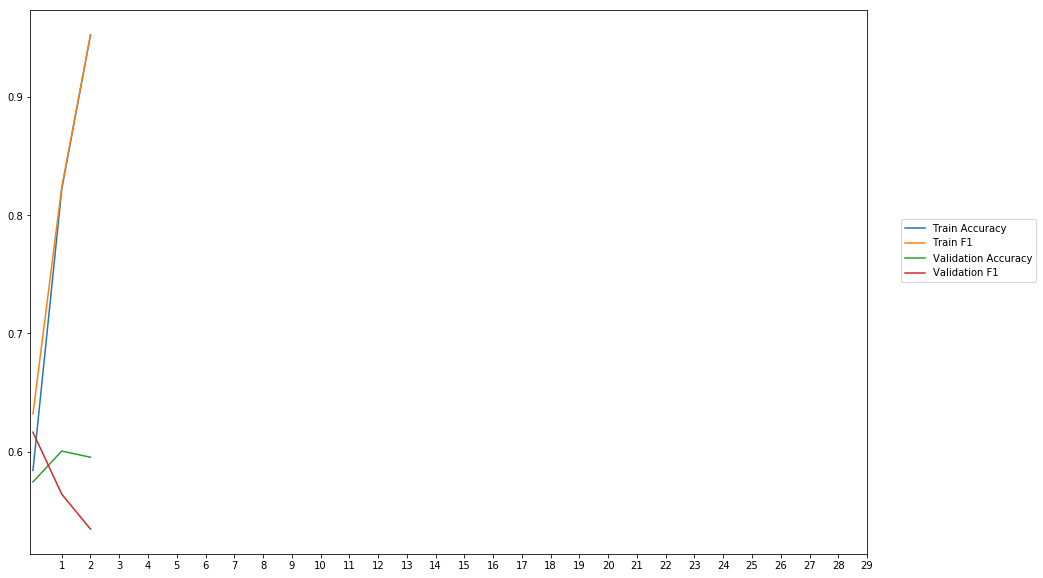

Average Accuracy: 59.01%
Average Precision: 60.18%
Average Recall: 55.67%
Average F1: 57.17%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6777 - acc: 0.5746 - precision: 0.5596 - recall: 0.6878 - f1_score: 0.6171 - val_loss: 0.6802 - val_acc: 0.5979 - val_precision: 0.6011 - val_recall: 0.5759 - val_f1_score: 0.5882
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4823 - acc: 0.8082 - precision: 0.7939 - recall: 0.8308 - f1_score: 0.8119 - val_loss: 0.7013 - val_acc: 0.6005 - val_precision: 0.6462 - val_recall: 0.4398 - val_f1_score: 0.5234
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1756 - acc: 0.9533 - precision: 0.9556 - recall: 0.9506 - f1_score: 0.9531 - val_loss: 0.7774 - val_acc: 0.6188 - val_precision: 0.6271 - val_recall: 0.5812 - val_f1_score: 0.6033
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0403 - a

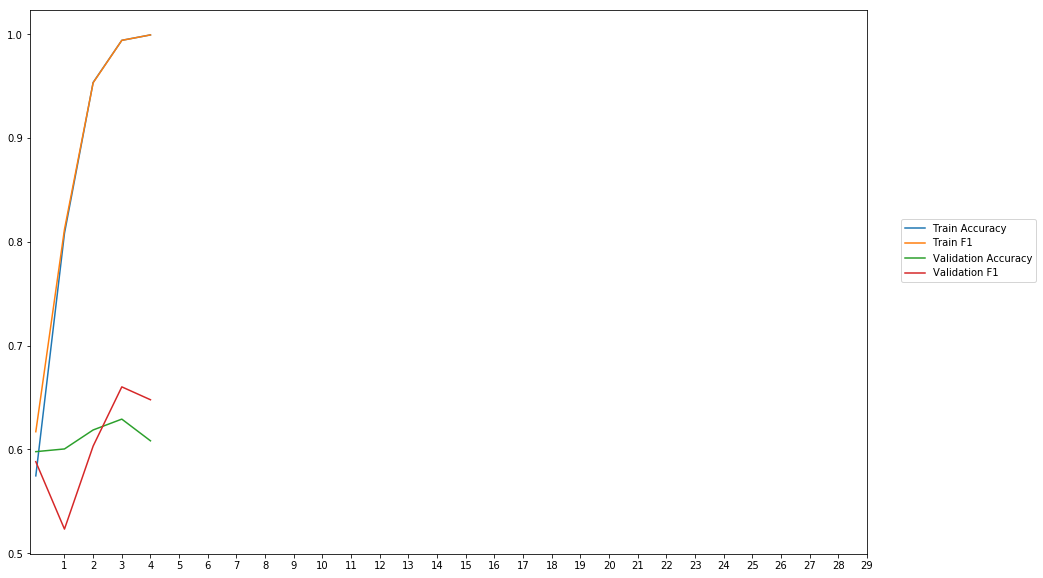

Average Accuracy: 61.10%
Average Precision: 61.39%
Average Recall: 60.84%
Average F1: 60.46%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6770 - acc: 0.5732 - precision: 0.5614 - recall: 0.6564 - f1_score: 0.6052 - val_loss: 0.6491 - val_acc: 0.6606 - val_precision: 0.6368 - val_recall: 0.7435 - val_f1_score: 0.6860
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4798 - acc: 0.8116 - precision: 0.8047 - recall: 0.8215 - f1_score: 0.8130 - val_loss: 0.6374 - val_acc: 0.6162 - val_precision: 0.6209 - val_recall: 0.5916 - val_f1_score: 0.6059

-----Fold 9--------


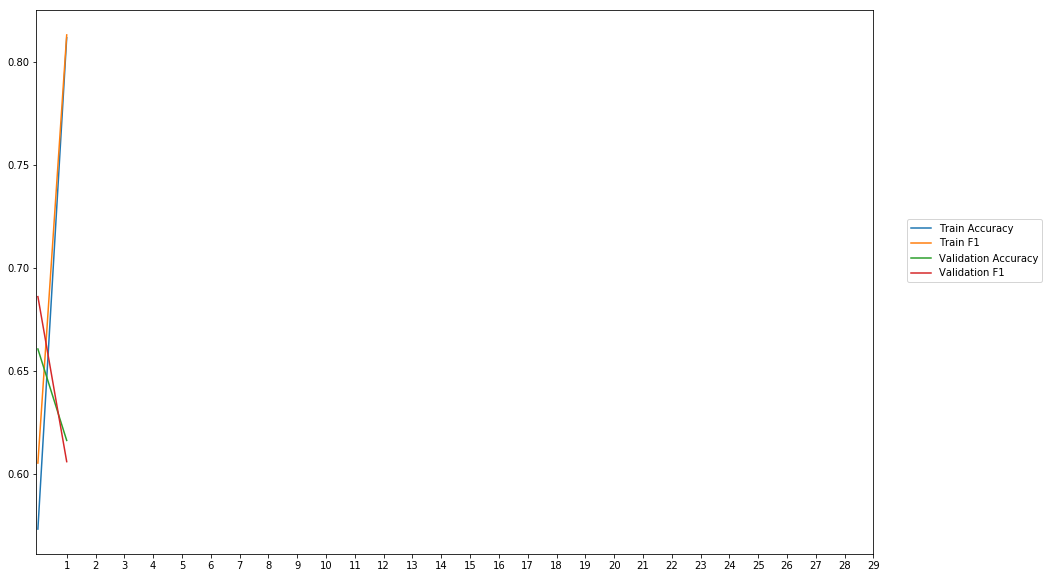

Average Accuracy: 63.84%
Average Precision: 62.88%
Average Recall: 66.75%
Average F1: 64.59%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6766 - acc: 0.5694 - precision: 0.5566 - recall: 0.6686 - f1_score: 0.6075 - val_loss: 0.6610 - val_acc: 0.5979 - val_precision: 0.6095 - val_recall: 0.5393 - val_f1_score: 0.5722
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4702 - acc: 0.8102 - precision: 0.8027 - recall: 0.8209 - f1_score: 0.8117 - val_loss: 0.6861 - val_acc: 0.5979 - val_precision: 0.6276 - val_recall: 0.4764 - val_f1_score: 0.5417

-----Fold 10--------


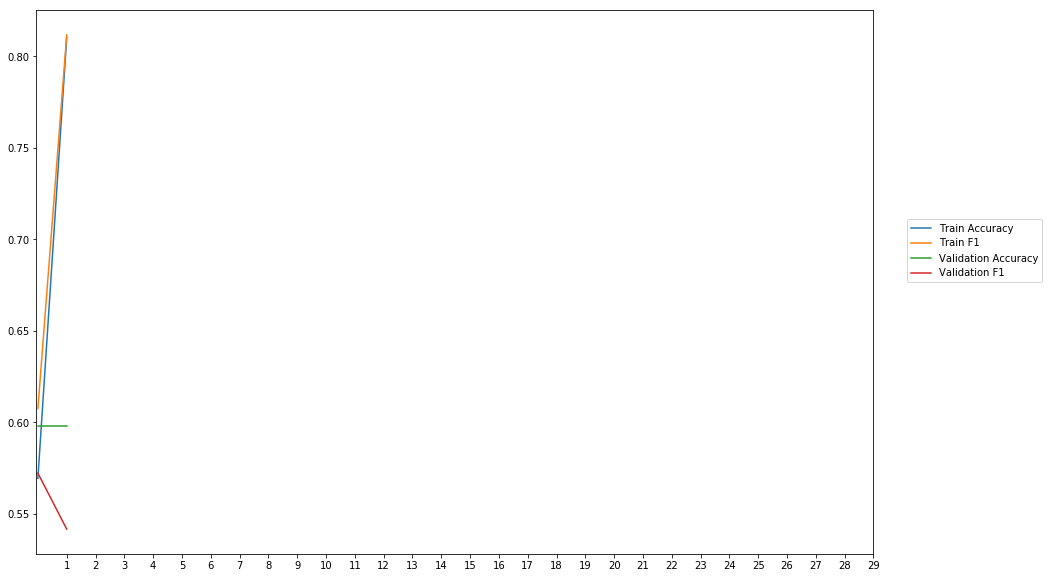

Average Accuracy: 59.79%
Average Precision: 61.85%
Average Recall: 50.79%
Average F1: 55.69%

-------Overallresults-------


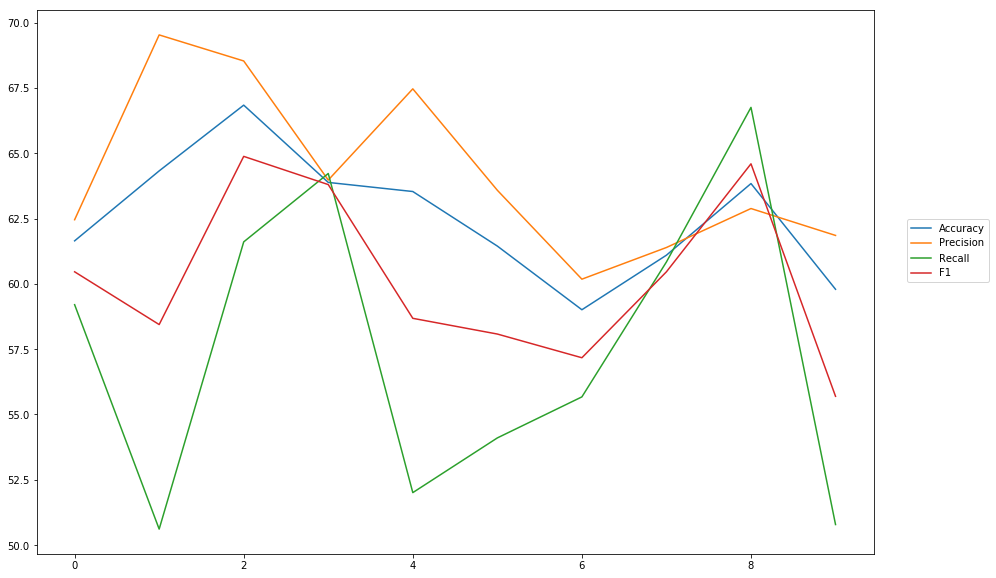

Accuracy: Mean = 62.54% (+/- 2.24%), Max = 66.84%, Min =  59.01%
Precision: Mean = 64.18% (+/- 3.04%), Max = 69.53%, Min =  60.18%
Recall: Mean = 57.58% (+/- 5.47%), Max = 66.75%, Min =  50.61%
F1: Mean = 60.23% (+/- 3.06%), Max = 64.88%, Min =  55.69%


In [14]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_acc_1', 'val_acc', 1)

Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6779 - acc: 0.5755 - precision: 0.5630 - recall: 0.6626 - f1_score: 0.6088 - val_loss: 0.6504 - val_acc: 0.6078 - val_precision: 0.5962 - val_recall: 0.6615 - val_f1_score: 0.6272
Epoch 2/30
3449/3449 [==============================] - 3s 1000us/step - loss: 0.4694 - acc: 0.8141 - precision: 0.8066 - recall: 0.8249 - f1_score: 0.8156 - val_loss: 0.6502 - val_acc: 0.6286 - val_precision: 0.6541 - val_recall: 0.5417 - val_f1_score: 0.5926
Epoch 3/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.1649 - acc: 0.9562 - precision: 0.9563 - recall: 0.9558 - f1_score: 0.9561 - val_loss: 0.7675 - val_acc: 0.6000 - val_precision: 0.6118 - val_recall: 0.5417 - val_f1_score: 0.5746
Epoch 4/30
3449/3449 [==============================] - 3s 1000us/step - loss: 0.0425 - acc: 0.9901 - precision: 0.9884 - recall: 0.9919 - f1_score: 0.9901 - val_loss: 0.9249 -

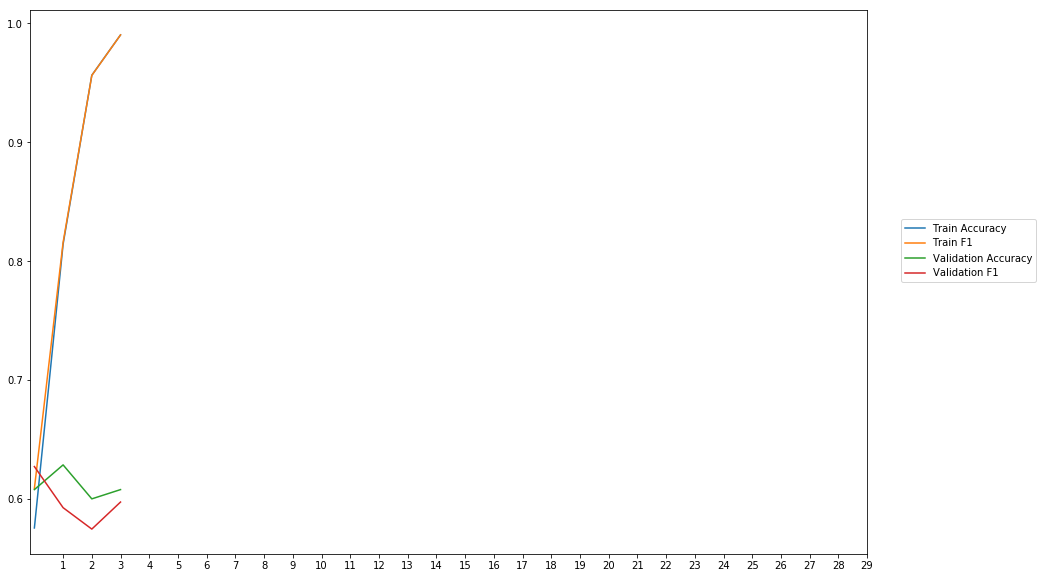

Average Accuracy: 61.10%
Average Precision: 61.85%
Average Recall: 58.20%
Average F1: 59.79%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6819 - acc: 0.5641 - precision: 0.5581 - recall: 0.6035 - f1_score: 0.5799 - val_loss: 0.6356 - val_acc: 0.6510 - val_precision: 0.6727 - val_recall: 0.5812 - val_f1_score: 0.6236
Epoch 2/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.4802 - acc: 0.8157 - precision: 0.8087 - recall: 0.8256 - f1_score: 0.8170 - val_loss: 0.6438 - val_acc: 0.6458 - val_precision: 0.7099 - val_recall: 0.4869 - val_f1_score: 0.5776
Epoch 3/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.1759 - acc: 0.9519 - precision: 0.9486 - recall: 0.9552 - f1_score: 0.9519 - val_loss: 0.8095 - val_acc: 0.6276 - val_precision: 0.6935 - val_recall: 0.4503 - val_f1_score: 0.5460

-----Fold 2--------


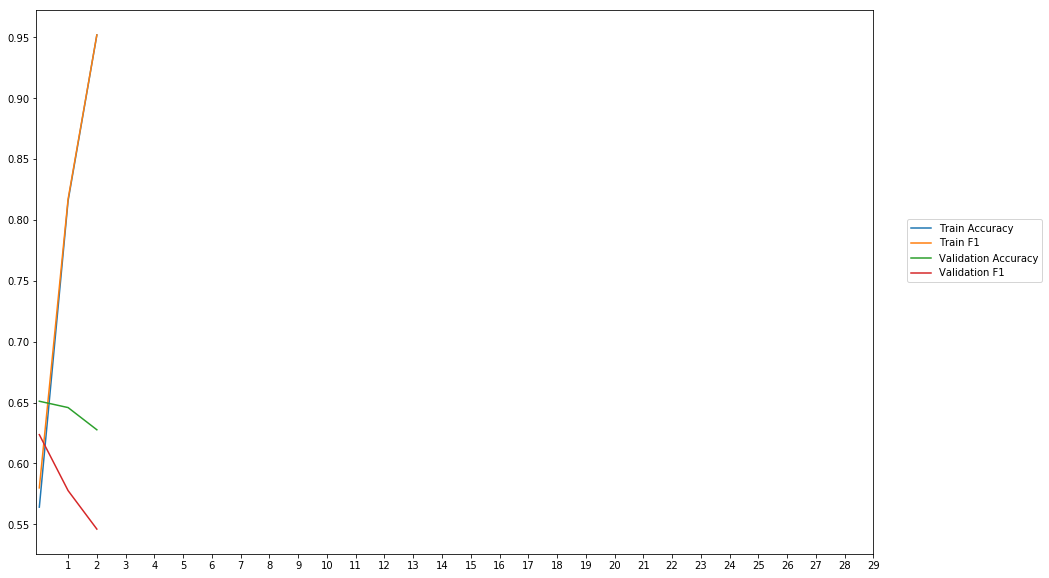

Average Accuracy: 64.15%
Average Precision: 69.21%
Average Recall: 50.61%
Average F1: 58.24%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6794 - acc: 0.5728 - precision: 0.5595 - recall: 0.6727 - f1_score: 0.6109 - val_loss: 0.6438 - val_acc: 0.6562 - val_precision: 0.6686 - val_recall: 0.6126 - val_f1_score: 0.6393
Epoch 2/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.4736 - acc: 0.8183 - precision: 0.8135 - recall: 0.8244 - f1_score: 0.8189 - val_loss: 0.6170 - val_acc: 0.6849 - val_precision: 0.6989 - val_recall: 0.6440 - val_f1_score: 0.6703
Epoch 3/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.1721 - acc: 0.9530 - precision: 0.9513 - recall: 0.9547 - f1_score: 0.9530 - val_loss: 0.7074 - val_acc: 0.6641 - val_precision: 0.6802 - val_recall: 0.6126 - val_f1_score: 0.6446
Epoch 4/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.0442 - a

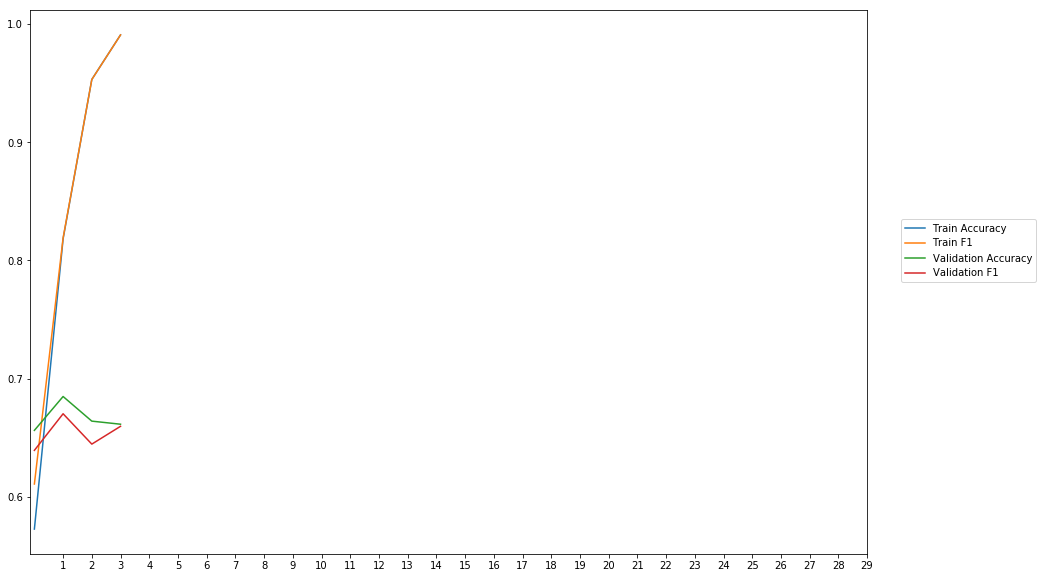

Average Accuracy: 66.67%
Average Precision: 67.68%
Average Recall: 63.22%
Average F1: 65.35%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6800 - acc: 0.5775 - precision: 0.5626 - recall: 0.6843 - f1_score: 0.6175 - val_loss: 0.6441 - val_acc: 0.6371 - val_precision: 0.6130 - val_recall: 0.7382 - val_f1_score: 0.6698
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4866 - acc: 0.8073 - precision: 0.7975 - recall: 0.8221 - f1_score: 0.8096 - val_loss: 0.6315 - val_acc: 0.6449 - val_precision: 0.6627 - val_recall: 0.5864 - val_f1_score: 0.6222 0.5464 - acc: 0.7821 - precision: 0.7646 
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1732 - acc: 0.9539 - precision: 0.9540 - recall: 0.9535 - f1_score: 0.9538 - val_loss: 0.7620 - val_acc: 0.6319 - val_precision: 0.6359 - val_recall: 0.6126 - val_f1_score: 0.6240
Epoch 4/30
3451/3451 [======================

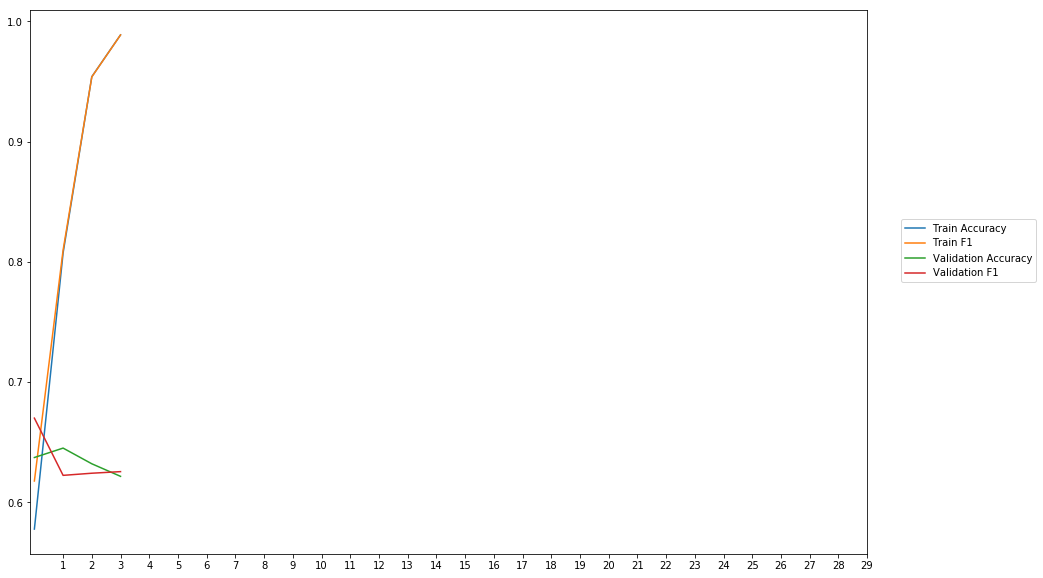

Average Accuracy: 63.38%
Average Precision: 63.22%
Average Recall: 64.27%
Average F1: 63.53%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6839 - acc: 0.5619 - precision: 0.5501 - recall: 0.6640 - f1_score: 0.6017 - val_loss: 0.6476 - val_acc: 0.6397 - val_precision: 0.6464 - val_recall: 0.6126 - val_f1_score: 0.6290
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4806 - acc: 0.8111 - precision: 0.8055 - recall: 0.8186 - f1_score: 0.8120 - val_loss: 0.6676 - val_acc: 0.6423 - val_precision: 0.6901 - val_recall: 0.5131 - val_f1_score: 0.5886
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1723 - acc: 0.9525 - precision: 0.9550 - recall: 0.9494 - f1_score: 0.9522 - val_loss: 0.8570 - val_acc: 0.6188 - val_precision: 0.6667 - val_recall: 0.4712 - val_f1_score: 0.5521
Epoch 4/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.0447 - a

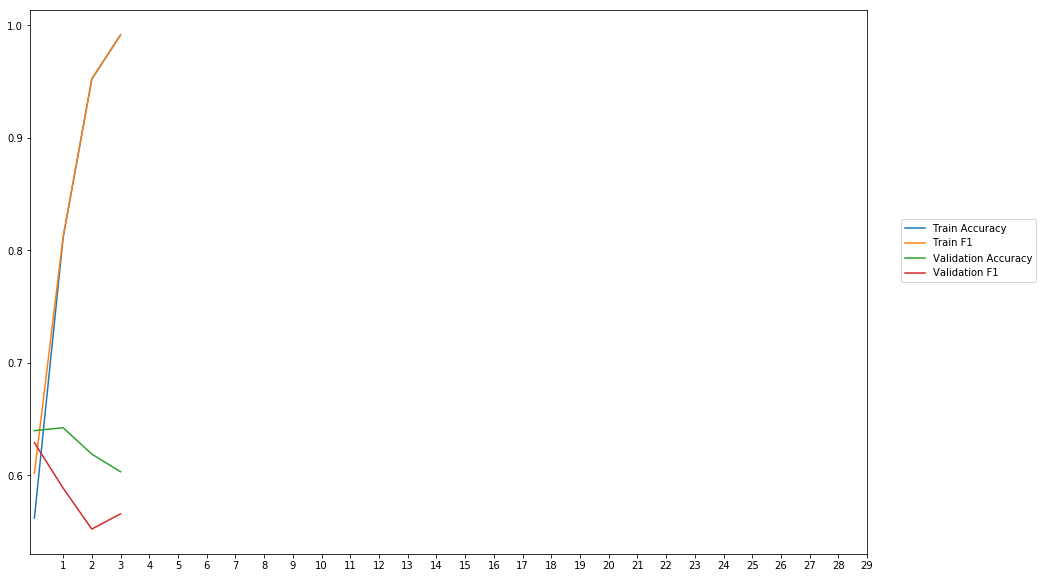

Average Accuracy: 62.60%
Average Precision: 65.65%
Average Recall: 52.88%
Average F1: 58.39%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6764 - acc: 0.5749 - precision: 0.5582 - recall: 0.7058 - f1_score: 0.6234 - val_loss: 0.6660 - val_acc: 0.6240 - val_precision: 0.6158 - val_recall: 0.6545 - val_f1_score: 0.6345
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4735 - acc: 0.8134 - precision: 0.8019 - recall: 0.8308 - f1_score: 0.8161 - val_loss: 0.6852 - val_acc: 0.6214 - val_precision: 0.6575 - val_recall: 0.5026 - val_f1_score: 0.5697
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1728 - acc: 0.9531 - precision: 0.9519 - recall: 0.9541 - f1_score: 0.9530 - val_loss: 0.8115 - val_acc: 0.6057 - val_precision: 0.6408 - val_recall: 0.4764 - val_f1_score: 0.5465

-----Fold 6--------


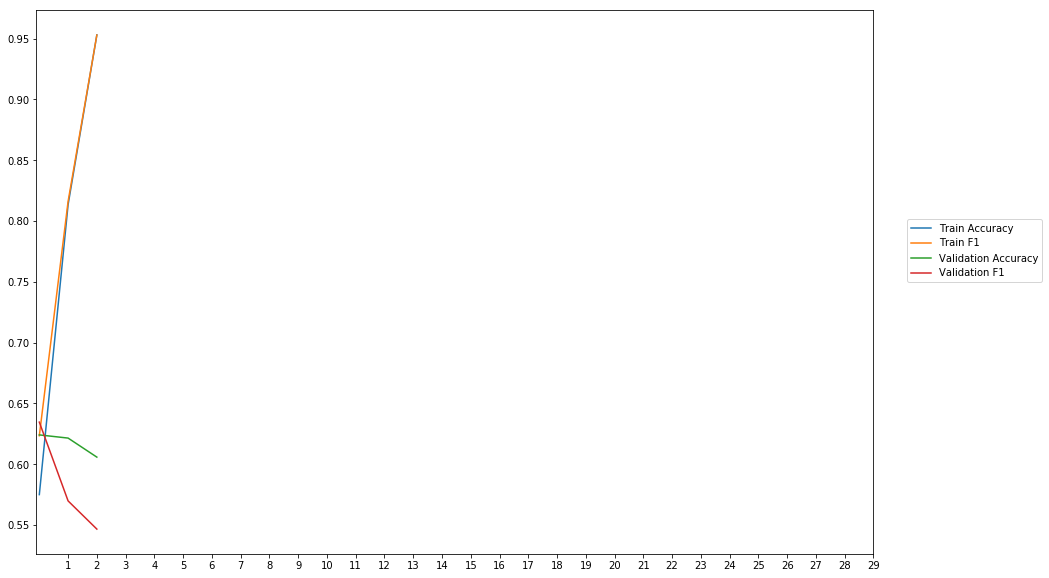

Average Accuracy: 61.71%
Average Precision: 63.80%
Average Recall: 54.45%
Average F1: 58.36%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6745 - acc: 0.5842 - precision: 0.5652 - recall: 0.7186 - f1_score: 0.6327 - val_loss: 0.6830 - val_acc: 0.5770 - val_precision: 0.5662 - val_recall: 0.6492 - val_f1_score: 0.6049
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4649 - acc: 0.8209 - precision: 0.8127 - recall: 0.8326 - f1_score: 0.8225 - val_loss: 0.7281 - val_acc: 0.6084 - val_precision: 0.6242 - val_recall: 0.5393 - val_f1_score: 0.5787
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1698 - acc: 0.9531 - precision: 0.9534 - recall: 0.9523 - f1_score: 0.9529 - val_loss: 0.9018 - val_acc: 0.5953 - val_precision: 0.6250 - val_recall: 0.4712 - val_f1_score: 0.5373
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0451 - a

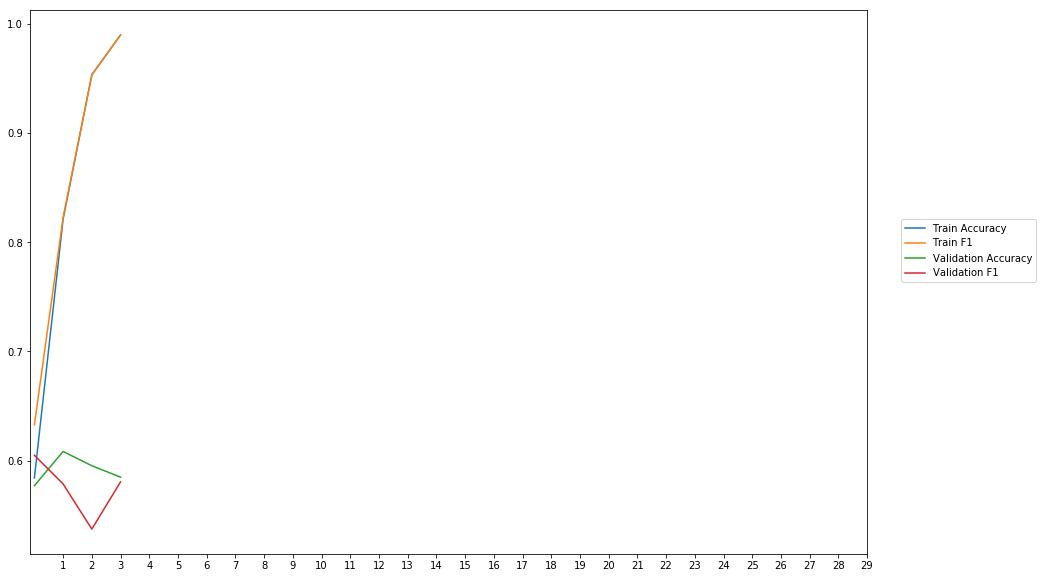

Average Accuracy: 59.14%
Average Precision: 60.01%
Average Recall: 55.89%
Average F1: 57.53%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6778 - acc: 0.5755 - precision: 0.5602 - recall: 0.6895 - f1_score: 0.6182 - val_loss: 0.6799 - val_acc: 0.6057 - val_precision: 0.6099 - val_recall: 0.5812 - val_f1_score: 0.5952
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4826 - acc: 0.8082 - precision: 0.7932 - recall: 0.8320 - f1_score: 0.8121 - val_loss: 0.6995 - val_acc: 0.6031 - val_precision: 0.6512 - val_recall: 0.4398 - val_f1_score: 0.5250
Epoch 3/30
3451/3451 [==============================] - ETA: 0s - loss: 0.1769 - acc: 0.9522 - precision: 0.9545 - recall: 0.9500 - f1_score: 0.952 - 3s 1ms/step - loss: 0.1762 - acc: 0.9528 - precision: 0.9545 - recall: 0.9506 - f1_score: 0.9525 - val_loss: 0.7754 - val_acc: 0.6162 - val_precision: 0.6250 - val_recall: 0.5759 - val_f1_score:

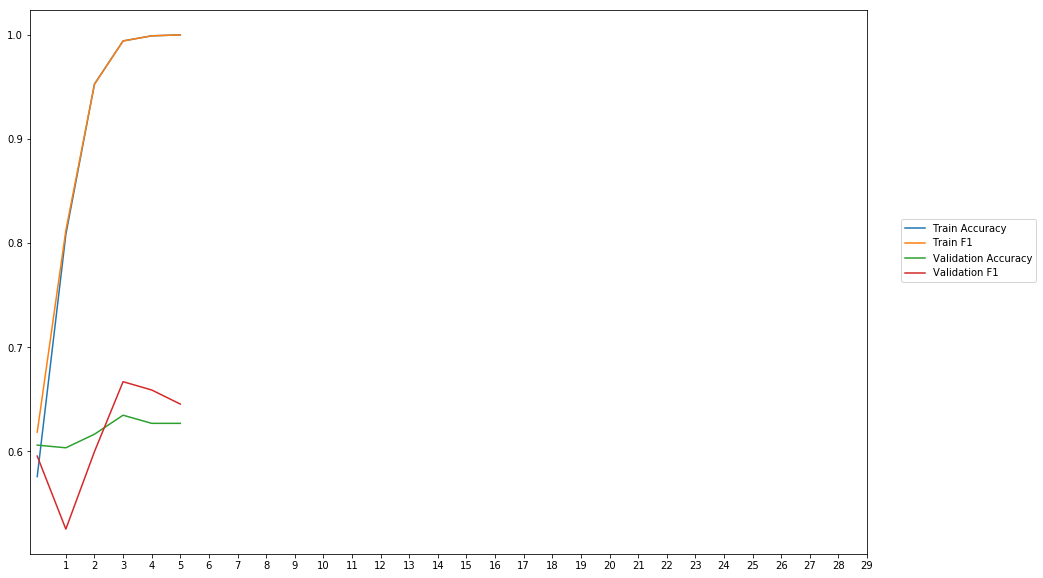

Average Accuracy: 61.88%
Average Precision: 61.93%
Average Recall: 62.22%
Average F1: 61.50%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6770 - acc: 0.5758 - precision: 0.5638 - recall: 0.6576 - f1_score: 0.6071 - val_loss: 0.6489 - val_acc: 0.6632 - val_precision: 0.6360 - val_recall: 0.7592 - val_f1_score: 0.6921
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4796 - acc: 0.8093 - precision: 0.8007 - recall: 0.8221 - f1_score: 0.8112 - val_loss: 0.6370 - val_acc: 0.6240 - val_precision: 0.6284 - val_recall: 0.6021 - val_f1_score: 0.6150
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1761 - acc: 0.9533 - precision: 0.9519 - recall: 0.9547 - f1_score: 0.9533 - val_loss: 0.7424 - val_acc: 0.6240 - val_precision: 0.6313 - val_recall: 0.5916 - val_f1_score: 0.6108

-----Fold 9--------


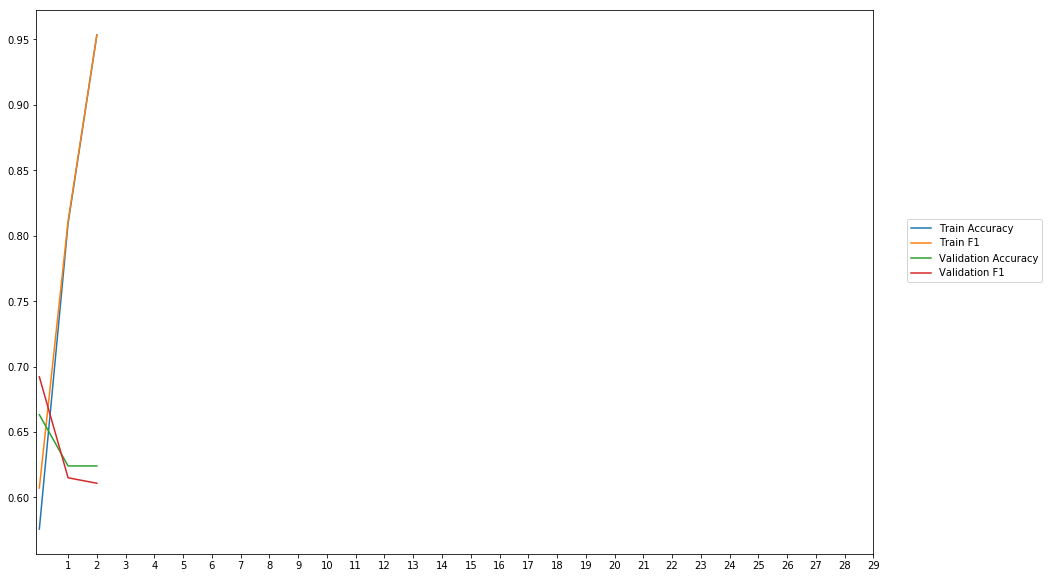

Average Accuracy: 63.71%
Average Precision: 63.19%
Average Recall: 65.10%
Average F1: 63.93%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6759 - acc: 0.5720 - precision: 0.5584 - recall: 0.6756 - f1_score: 0.6114 - val_loss: 0.6610 - val_acc: 0.5953 - val_precision: 0.6071 - val_recall: 0.5340 - val_f1_score: 0.5682
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4694 - acc: 0.8111 - precision: 0.8044 - recall: 0.8203 - f1_score: 0.8123 - val_loss: 0.6876 - val_acc: 0.5849 - val_precision: 0.6127 - val_recall: 0.4555 - val_f1_score: 0.5225
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1692 - acc: 0.9574 - precision: 0.9602 - recall: 0.9541 - f1_score: 0.9571 - val_loss: 0.8196 - val_acc: 0.5822 - val_precision: 0.5987 - val_recall: 0.4921 - val_f1_score: 0.5402

-----Fold 10--------


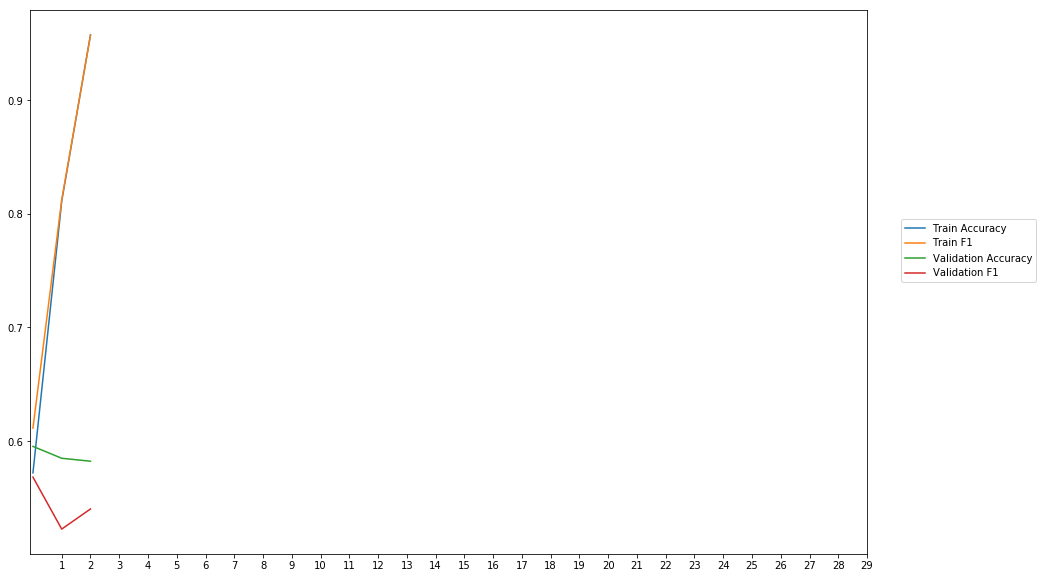

Average Accuracy: 58.75%
Average Precision: 60.62%
Average Recall: 49.39%
Average F1: 54.37%

-------Overallresults-------


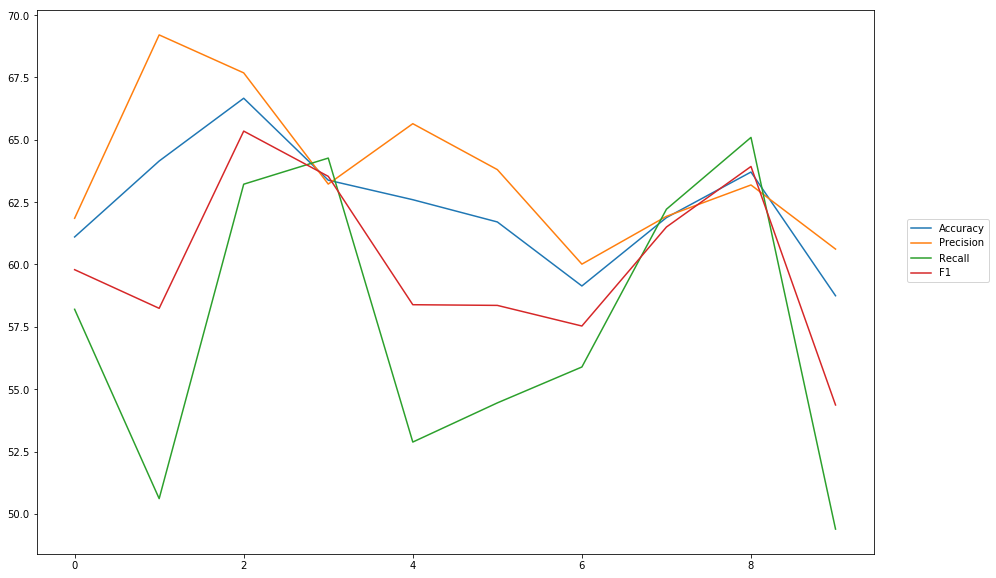

Accuracy: Mean = 62.31% (+/- 2.24%), Max = 66.67%, Min =  58.75%
Precision: Mean = 63.72% (+/- 2.83%), Max = 69.21%, Min =  60.01%
Recall: Mean = 57.62% (+/- 5.53%), Max = 65.10%, Min =  49.39%
F1: Mean = 60.10% (+/- 3.24%), Max = 65.35%, Min =  54.37%


In [15]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_acc_2', 'val_acc', 2)

Train on 3449 samples, validate on 385 samples
Epoch 1/30
3449/3449 [==============================] - 4s 1ms/step - loss: 0.6778 - acc: 0.5793 - precision: 0.5662 - recall: 0.6667 - f1_score: 0.6123 - val_loss: 0.6507 - val_acc: 0.6130 - val_precision: 0.5982 - val_recall: 0.6823 - val_f1_score: 0.6375
Epoch 2/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.4705 - acc: 0.8141 - precision: 0.8066 - recall: 0.8249 - f1_score: 0.8156 - val_loss: 0.6500 - val_acc: 0.6312 - val_precision: 0.6582 - val_recall: 0.5417 - val_f1_score: 0.5943
Epoch 3/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.1645 - acc: 0.9562 - precision: 0.9558 - recall: 0.9564 - f1_score: 0.9561 - val_loss: 0.7698 - val_acc: 0.5922 - val_precision: 0.6036 - val_recall: 0.5312 - val_f1_score: 0.5651
Epoch 4/30
3449/3449 [==============================] - 3s 1ms/step - loss: 0.0422 - acc: 0.9904 - precision: 0.9884 - recall: 0.9924 - f1_score: 0.9904 - val_loss: 0.9278 - val_a

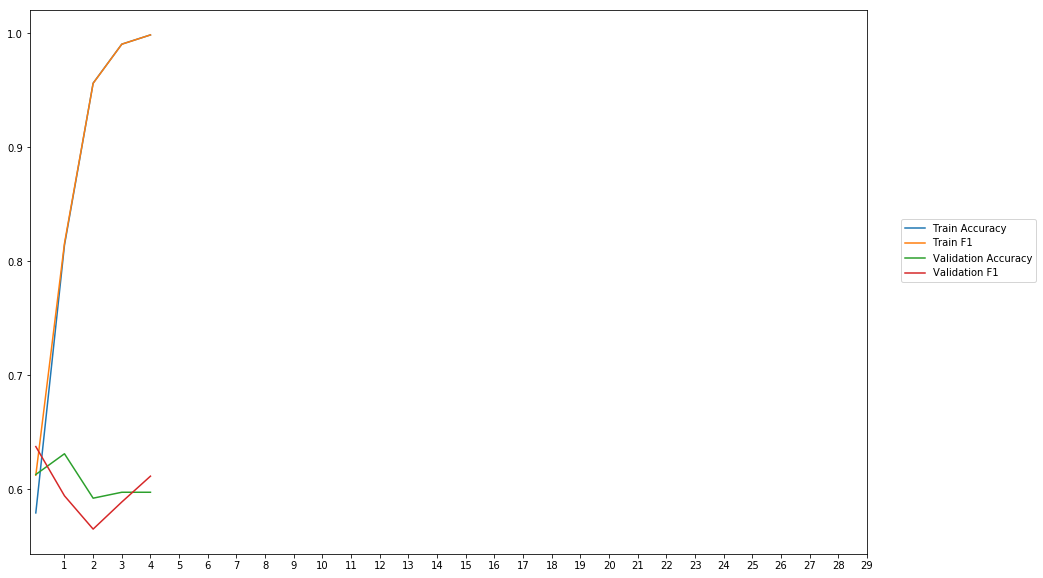

Average Accuracy: 60.62%
Average Precision: 60.99%
Average Recall: 59.37%
Average F1: 59.94%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6827 - acc: 0.5571 - precision: 0.5518 - recall: 0.5942 - f1_score: 0.5722 - val_loss: 0.6370 - val_acc: 0.6510 - val_precision: 0.6939 - val_recall: 0.5340 - val_f1_score: 0.6036
Epoch 2/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.4779 - acc: 0.8165 - precision: 0.8107 - recall: 0.8244 - f1_score: 0.8175 - val_loss: 0.6490 - val_acc: 0.6406 - val_precision: 0.7054 - val_recall: 0.4764 - val_f1_score: 0.5687
Epoch 3/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.1762 - acc: 0.9530 - precision: 0.9503 - recall: 0.9558 - f1_score: 0.9530 - val_loss: 0.8208 - val_acc: 0.6198 - val_precision: 0.6891 - val_recall: 0.4293 - val_f1_score: 0.5290
Epoch 4/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.0478 - a

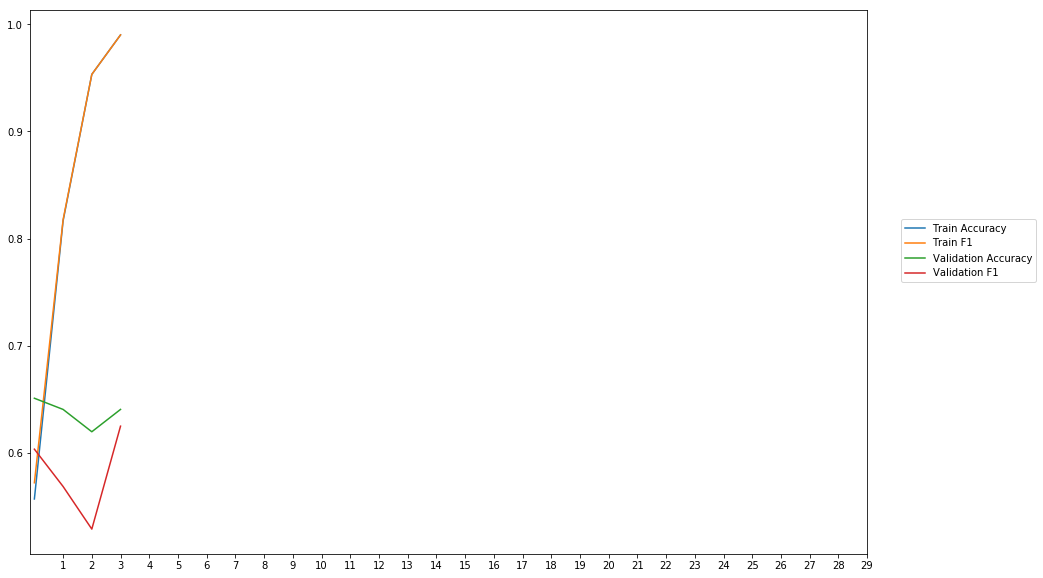

Average Accuracy: 63.80%
Average Precision: 68.45%
Average Recall: 51.05%
Average F1: 58.16%
Train on 3450 samples, validate on 384 samples
Epoch 1/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.6793 - acc: 0.5733 - precision: 0.5610 - recall: 0.6634 - f1_score: 0.6079 - val_loss: 0.6445 - val_acc: 0.6458 - val_precision: 0.6608 - val_recall: 0.5916 - val_f1_score: 0.6243
Epoch 2/30
3450/3450 [==============================] - 4s 1ms/step - loss: 0.4739 - acc: 0.8171 - precision: 0.8124 - recall: 0.8233 - f1_score: 0.8178 - val_loss: 0.6216 - val_acc: 0.6849 - val_precision: 0.7108 - val_recall: 0.6178 - val_f1_score: 0.6611
Epoch 3/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.1748 - acc: 0.9519 - precision: 0.9502 - recall: 0.9535 - f1_score: 0.9518 - val_loss: 0.7071 - val_acc: 0.6693 - val_precision: 0.6882 - val_recall: 0.6126 - val_f1_score: 0.6482
Epoch 4/30
3450/3450 [==============================] - 3s 1ms/step - loss: 0.0450 - a

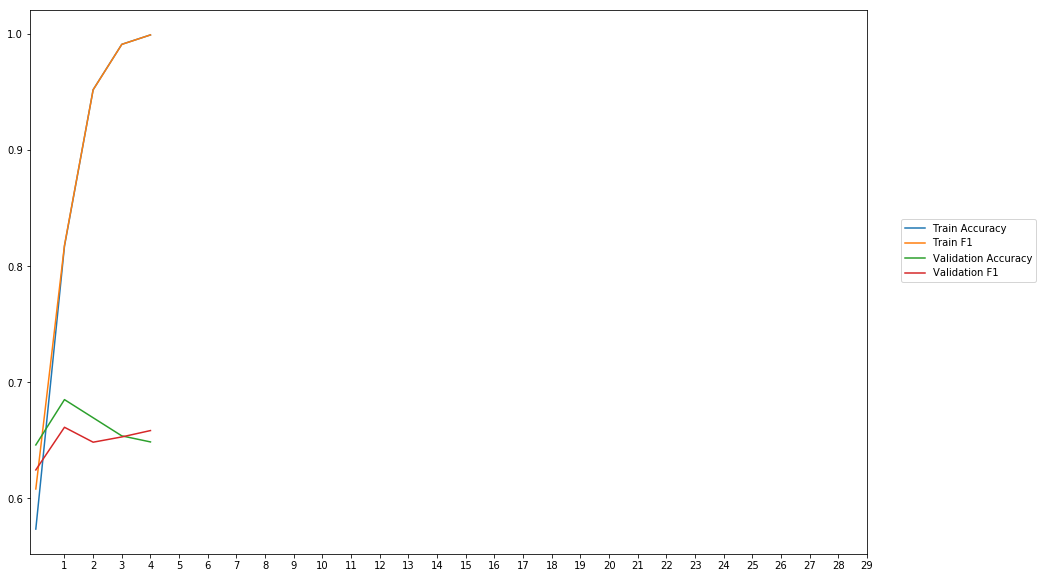

Average Accuracy: 66.04%
Average Precision: 66.96%
Average Recall: 63.14%
Average F1: 64.89%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6802 - acc: 0.5735 - precision: 0.5600 - recall: 0.6727 - f1_score: 0.6112 - val_loss: 0.6443 - val_acc: 0.6371 - val_precision: 0.6150 - val_recall: 0.7277 - val_f1_score: 0.6667
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4849 - acc: 0.8085 - precision: 0.7990 - recall: 0.8227 - f1_score: 0.8107 - val_loss: 0.6340 - val_acc: 0.6449 - val_precision: 0.6730 - val_recall: 0.5602 - val_f1_score: 0.6114
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1717 - acc: 0.9542 - precision: 0.9546 - recall: 0.9535 - f1_score: 0.9540 - val_loss: 0.7637 - val_acc: 0.6319 - val_precision: 0.6344 - val_recall: 0.6178 - val_f1_score: 0.6260
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0435 - a

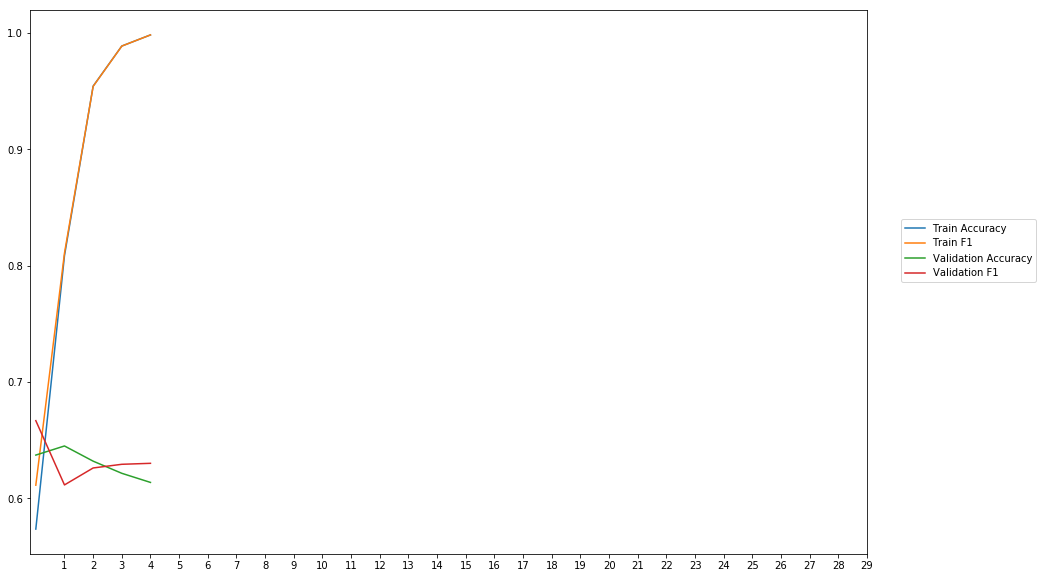

Average Accuracy: 62.98%
Average Precision: 62.81%
Average Recall: 64.19%
Average F1: 63.26%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6837 - acc: 0.5619 - precision: 0.5500 - recall: 0.6645 - f1_score: 0.6019 - val_loss: 0.6472 - val_acc: 0.6371 - val_precision: 0.6398 - val_recall: 0.6230 - val_f1_score: 0.6313
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4803 - acc: 0.8137 - precision: 0.8072 - recall: 0.8227 - f1_score: 0.8149 - val_loss: 0.6642 - val_acc: 0.6449 - val_precision: 0.6897 - val_recall: 0.5236 - val_f1_score: 0.5952
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1723 - acc: 0.9528 - precision: 0.9555 - recall: 0.9494 - f1_score: 0.9525 - val_loss: 0.8529 - val_acc: 0.6266 - val_precision: 0.6765 - val_recall: 0.4817 - val_f1_score: 0.5627
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0446 - a

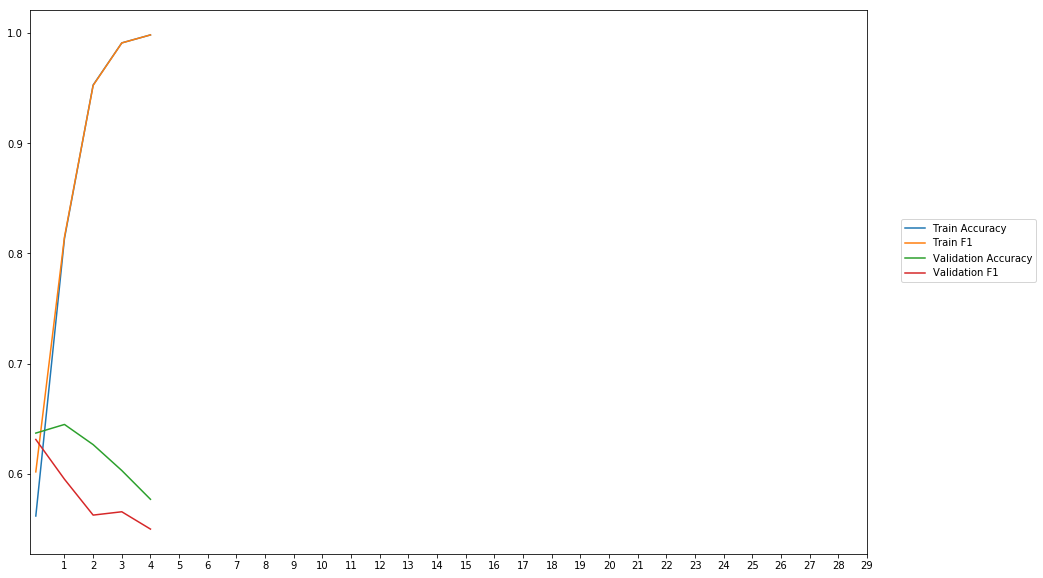

Average Accuracy: 61.78%
Average Precision: 64.29%
Average Recall: 53.30%
Average F1: 58.10%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6764 - acc: 0.5769 - precision: 0.5597 - recall: 0.7081 - f1_score: 0.6253 - val_loss: 0.6659 - val_acc: 0.6005 - val_precision: 0.5888 - val_recall: 0.6597 - val_f1_score: 0.6222
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4747 - acc: 0.8096 - precision: 0.7978 - recall: 0.8279 - f1_score: 0.8126 - val_loss: 0.6833 - val_acc: 0.6240 - val_precision: 0.6599 - val_recall: 0.5079 - val_f1_score: 0.5740
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1732 - acc: 0.9516 - precision: 0.9501 - recall: 0.9529 - f1_score: 0.9515 - val_loss: 0.8122 - val_acc: 0.6084 - val_precision: 0.6454 - val_recall: 0.4764 - val_f1_score: 0.5482
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0454 - a

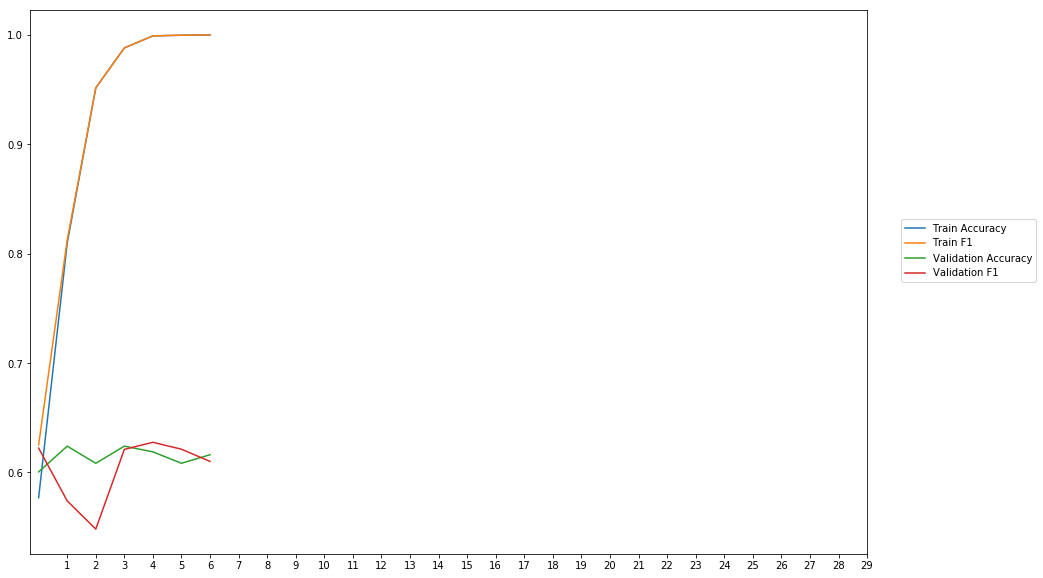

Average Accuracy: 61.43%
Average Precision: 62.12%
Average Recall: 59.31%
Average F1: 60.35%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6744 - acc: 0.5853 - precision: 0.5660 - recall: 0.7203 - f1_score: 0.6339 - val_loss: 0.6827 - val_acc: 0.5692 - val_precision: 0.5575 - val_recall: 0.6597 - val_f1_score: 0.6043
Epoch 2/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.4654 - acc: 0.8192 - precision: 0.8100 - recall: 0.8326 - f1_score: 0.8211 - val_loss: 0.7298 - val_acc: 0.6110 - val_precision: 0.6280 - val_recall: 0.5393 - val_f1_score: 0.5803
Epoch 3/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.1706 - acc: 0.9507 - precision: 0.9522 - recall: 0.9488 - f1_score: 0.9505 - val_loss: 0.8995 - val_acc: 0.5953 - val_precision: 0.6268 - val_recall: 0.4660 - val_f1_score: 0.5345
Epoch 4/30
3451/3451 [==============================] - 3s 1ms/step - loss: 0.0451 - a

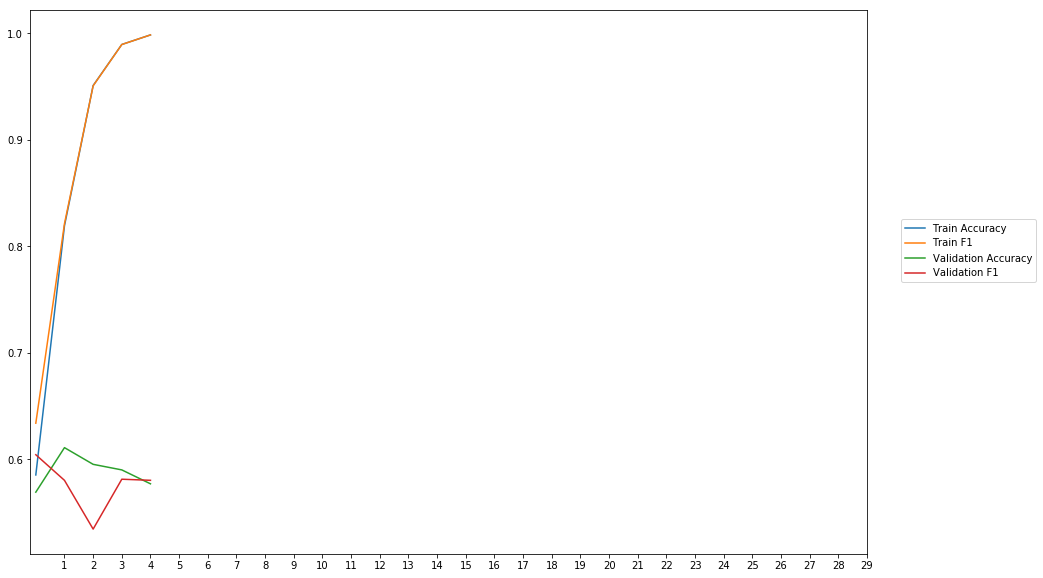

Average Accuracy: 58.85%
Average Precision: 59.58%
Average Recall: 56.44%
Average F1: 57.62%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6778 - acc: 0.5726 - precision: 0.5581 - recall: 0.6843 - f1_score: 0.6148 - val_loss: 0.6802 - val_acc: 0.5979 - val_precision: 0.6011 - val_recall: 0.5759 - val_f1_score: 0.5882
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4815 - acc: 0.8079 - precision: 0.7944 - recall: 0.8291 - f1_score: 0.8114 - val_loss: 0.7090 - val_acc: 0.5901 - val_precision: 0.6441 - val_recall: 0.3979 - val_f1_score: 0.4919
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1756 - acc: 0.9528 - precision: 0.9534 - recall: 0.9517 - f1_score: 0.9526 - val_loss: 0.7781 - val_acc: 0.6188 - val_precision: 0.6286 - val_recall: 0.5759 - val_f1_score: 0.6011
Epoch 4/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.0408 - a

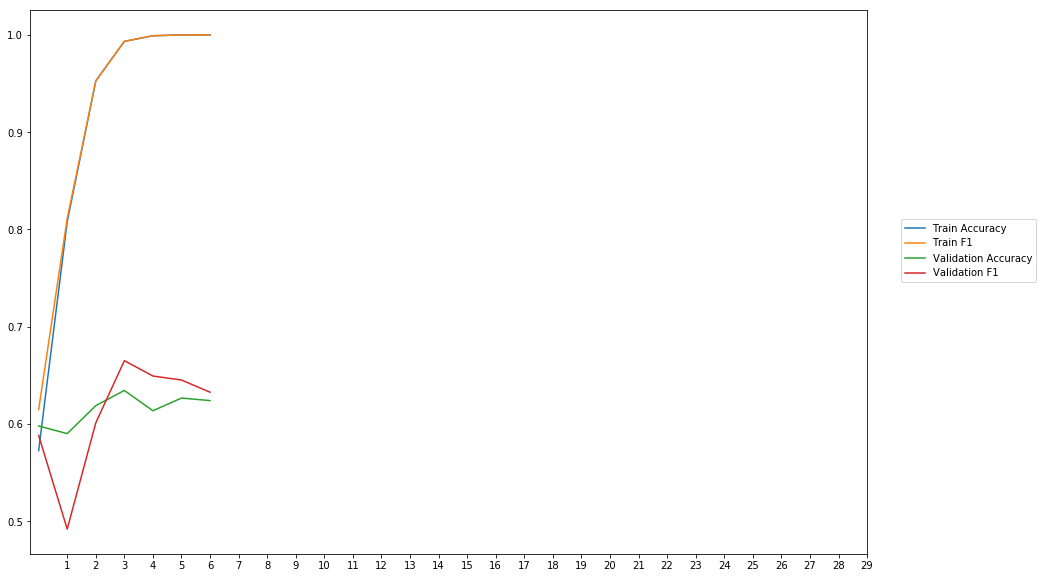

Average Accuracy: 61.51%
Average Precision: 61.56%
Average Recall: 61.78%
Average F1: 61.05%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6770 - acc: 0.5769 - precision: 0.5649 - recall: 0.6581 - f1_score: 0.6079 - val_loss: 0.6493 - val_acc: 0.6606 - val_precision: 0.6393 - val_recall: 0.7330 - val_f1_score: 0.6829
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4802 - acc: 0.8111 - precision: 0.8044 - recall: 0.8203 - f1_score: 0.8123 - val_loss: 0.6368 - val_acc: 0.6110 - val_precision: 0.6167 - val_recall: 0.5812 - val_f1_score: 0.5984
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1759 - acc: 0.9539 - precision: 0.9525 - recall: 0.9552 - f1_score: 0.9538 - val_loss: 0.7420 - val_acc: 0.6214 - val_precision: 0.6264 - val_recall: 0.5969 - val_f1_score: 0.6113
Epoch 4/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.0438 - a

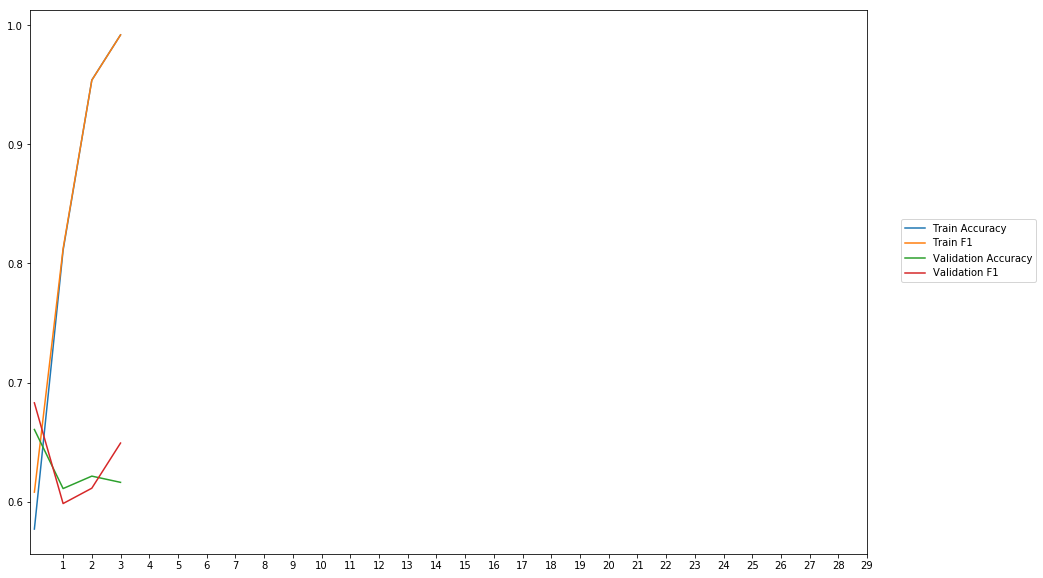

Average Accuracy: 62.73%
Average Precision: 61.97%
Average Recall: 65.58%
Average F1: 63.54%
Train on 3451 samples, validate on 383 samples
Epoch 1/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6759 - acc: 0.5726 - precision: 0.5583 - recall: 0.6820 - f1_score: 0.6140 - val_loss: 0.6604 - val_acc: 0.5979 - val_precision: 0.6000 - val_recall: 0.5812 - val_f1_score: 0.5904
Epoch 2/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.4715 - acc: 0.8116 - precision: 0.8033 - recall: 0.8238 - f1_score: 0.8134 - val_loss: 0.6861 - val_acc: 0.5927 - val_precision: 0.6241 - val_recall: 0.4607 - val_f1_score: 0.5301
Epoch 3/30
3451/3451 [==============================] - 4s 1ms/step - loss: 0.1707 - acc: 0.9551 - precision: 0.9568 - recall: 0.9529 - f1_score: 0.9548 - val_loss: 0.8223 - val_acc: 0.5770 - val_precision: 0.5948 - val_recall: 0.4764 - val_f1_score: 0.5291
Epoch 4/30
3451/3451 [==============================] - ETA: 0s - loss: 0.0438 - acc: 

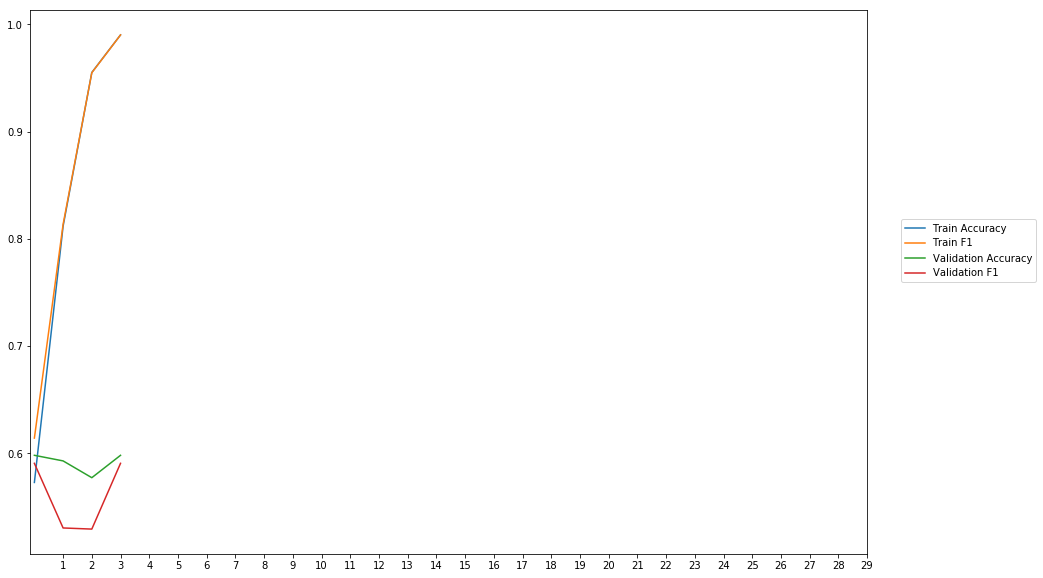

Average Accuracy: 59.14%
Average Precision: 60.47%
Average Recall: 52.49%
Average F1: 56.00%

-------Overallresults-------


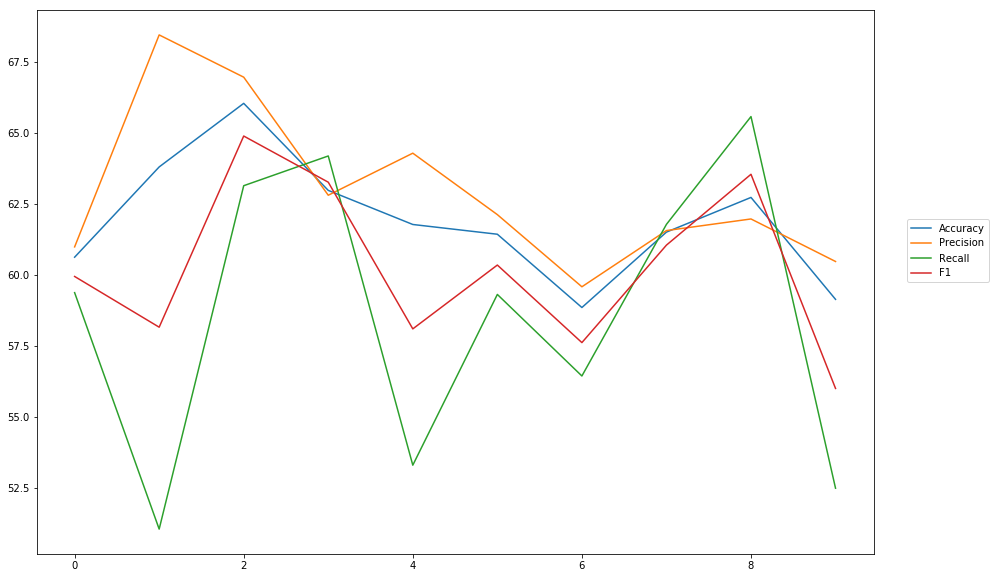

Accuracy: Mean = 61.89% (+/- 2.04%), Max = 66.04%, Min =  58.85%
Precision: Mean = 62.92% (+/- 2.70%), Max = 68.45%, Min =  59.58%
Recall: Mean = 58.66% (+/- 4.89%), Max = 65.58%, Min =  51.05%
F1: Mean = 60.29% (+/- 2.76%), Max = 64.89%, Min =  56.00%


In [16]:
cross_val_with_earlystopping(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'val_acc_3', 'val_acc', 3)

## Test the best model with heldout testdata

Train on 3067 samples, validate on 767 samples
Epoch 1/30
3067/3067 [==============================] - 5s 2ms/step - loss: 0.6745 - acc: 0.5830 - precision: 0.5751 - recall: 0.6509 - f1_score: 0.6107 - val_loss: 0.6642 - val_acc: 0.5867 - val_precision: 0.5621 - val_recall: 0.6486 - val_f1_score: 0.6023
Epoch 2/30
3067/3067 [==============================] - 5s 2ms/step - loss: 0.4808 - acc: 0.8001 - precision: 0.7918 - recall: 0.8170 - f1_score: 0.8042 - val_loss: 0.6858 - val_acc: 0.5984 - val_precision: 0.5695 - val_recall: 0.6865 - val_f1_score: 0.6225
Epoch 3/30
3067/3067 [==============================] - 5s 2ms/step - loss: 0.2879 - acc: 0.9058 - precision: 0.9065 - recall: 0.9059 - f1_score: 0.9062 - val_loss: 0.7504 - val_acc: 0.5997 - val_precision: 0.5724 - val_recall: 0.6730 - val_f1_score: 0.6186
Epoch 4/30
3067/3067 [==============================] - 5s 2ms/step - loss: 0.1326 - acc: 0.9720 - precision: 0.9721 - recall: 0.9721 - f1_score: 0.9721 - val_loss: 0.8637 - val_a

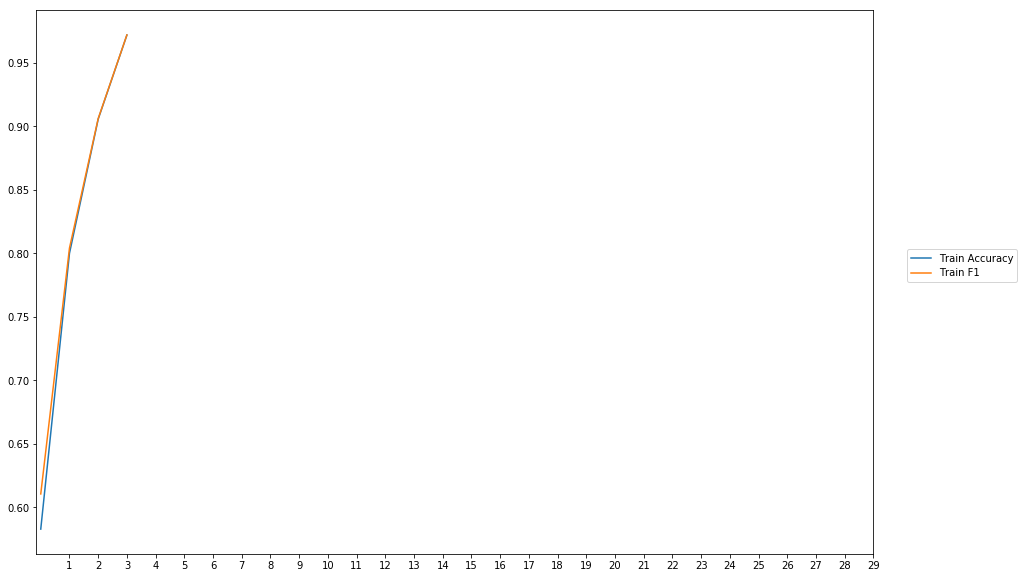


-----Test Scores----
Loss: 0.6875830475164919
Accuracy: 68.36734693877551
Precision: 59.81308409351618
Recall: 61.73633438529379
F1: 60.75948865291061


In [9]:
train_evaluate_final_model_with_es(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_EarlyStopping', 'val_acc', 1)